In [1]:
import os
import VGG_help
from VGG_help import prepare_dataset, test_on_data, plot_train_history, plot_confusion_matrix
# from VGG_help import vgg_model, resnet_model, swin_transformer_model, cv_train_model, cv_train_vgg_model
from VGG_help import vgg_model, resnet_model, cv_train_and_evaluate_model, train_and_evaluate_model, cv_train_model, cv_train_vgg_model, imbalanced_cv_train_and_evaluate_model


# from tensorflow.keras.models import load_model

2024-09-11 21:41:51.561875: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-11 21:41:53.006910: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-11 21:41:53.006967: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-11 21:41:53.008893: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-11 21:41:53.606048: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-11 21:41:53.607150: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
# !'/users/PCS0229/imankhazrak/miniconda3/envs/ddpm_pytorch/bin/python' -m pip install tensorflow_addons
# !'/users/PCS0229/imankhazrak/miniconda3/envs/ddpm_pytorch/bin/python' -m pip install tensorflow==2.12


In [3]:
VGG_help.sns.set_theme()
path_dir = VGG_help.os.getcwd()
VGG_help.np.random.seed(123)
VGG_help.tf.random.set_seed(123)


# Train on Selected Data

In [4]:
dataset_dir_org = f'{path_dir}/Balanced_Data/Selected_Images/Original_selected_images/selected_images'
dataset_dir_ddpm = f'{path_dir}/Balanced_Data/Selected_Images/Mixed/DDPM_Mixed'
dataset_dir_pggans150 = f'{path_dir}/Balanced_Data/Selected_Images/Mixed/PGGANS150_Mixed'
dataset_dir_pggans160 = f'{path_dir}/Balanced_Data/Selected_Images/Mixed/PGGANS160_Mixed'
test_dataset_dir = f'{path_dir}/Balanced_Data/Selected_Images/Test_selected_data/Test'


class_labels = sorted(os.listdir(dataset_dir_org))
print('class_labels: ', class_labels)
num_classes = 2
input_shape=(128, 128, 3)

cv=1
epochs=10
batch_size=32
n = 5 # number of different runs

class_labels:  ['NORMAL', 'PNEUMONIA']


## VGG16

### CV=1

#### Train on Original Dataset

Class labels:  ['NORMAL', 'PNEUMONIA']


2024-09-10 11:30:44.703941: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-09-10 11:30:44.704002: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: o0764.ten.osc.edu
2024-09-10 11:30:44.704016: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: o0764.ten.osc.edu
2024-09-10 11:30:44.704178: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 535.104.5
2024-09-10 11:30:44.704220: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 535.104.5
2024-09-10 11:30:44.704233: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 535.104.5


Epoch 1/10
10/10 [==============================] - 4s 337ms/step - loss: 1.7422 - accuracy: 0.4594 - val_loss: 0.6820 - val_accuracy: 0.6125
Epoch 2/10
10/10 [==============================] - 3s 302ms/step - loss: 0.7592 - accuracy: 0.5688 - val_loss: 0.6915 - val_accuracy: 0.5000
Epoch 3/10
10/10 [==============================] - 3s 300ms/step - loss: 0.7242 - accuracy: 0.5125 - val_loss: 0.6754 - val_accuracy: 0.5250
Epoch 4/10
10/10 [==============================] - 3s 300ms/step - loss: 0.6809 - accuracy: 0.5531 - val_loss: 0.6722 - val_accuracy: 0.7250
Epoch 5/10
10/10 [==============================] - 3s 299ms/step - loss: 0.6711 - accuracy: 0.6094 - val_loss: 0.6649 - val_accuracy: 0.7125
Epoch 6/10
10/10 [==============================] - 3s 300ms/step - loss: 0.6585 - accuracy: 0.6344 - val_loss: 0.6563 - val_accuracy: 0.7000
Epoch 7/10
10/10 [==============================] - 3s 303ms/step - loss: 0.6482 - accuracy: 0.6719 - val_loss: 0.6456 - val_accuracy: 0.7625
Epoch 

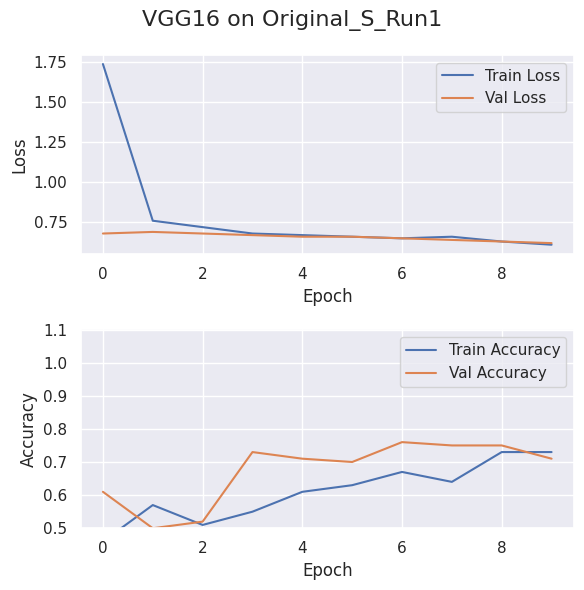

101/101 [==============================] - 23s 223ms/step
{'Test Loss': 0.5939, 'Test Accuracy': 0.822, 'F1 Score': 0.82, 'Sensitivity (Recall)': 0.82, 'Precision': 0.85}


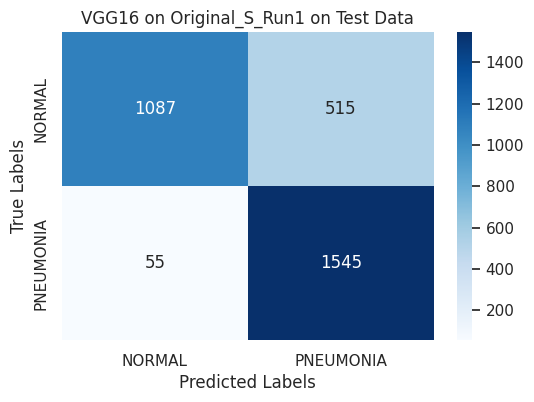

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
10/10 [==============================] - 4s 327ms/step - loss: 2.6136 - accuracy: 0.5281 - val_loss: 1.2358 - val_accuracy: 0.5000
Epoch 2/10
10/10 [==============================] - 3s 303ms/step - loss: 1.1516 - accuracy: 0.5594 - val_loss: 1.1140 - val_accuracy: 0.5000
Epoch 3/10
10/10 [==============================] - 3s 299ms/step - loss: 0.9442 - accuracy: 0.5219 - val_loss: 0.7001 - val_accuracy: 0.5000
Epoch 4/10
10/10 [==============================] - 3s 301ms/step - loss: 0.6960 - accuracy: 0.5813 - val_loss: 0.6536 - val_accuracy: 0.6500
Epoch 5/10
10/10 [==============================] - 3s 296ms/step - loss: 0.6678 - accuracy: 0.5938 - val_loss: 0.6464 - val_accuracy: 0.6750
Epoch 6/10
10/10 [==============================] - 3s 296ms/step - loss: 0.6321 - accuracy: 0.6406 - val_loss: 0.6372 - val_accuracy: 0.6625
Epoch 7/10
10/10 [==============================] - 3s 302ms/step - loss: 0.6264 - accuracy: 0.6687 - val_los

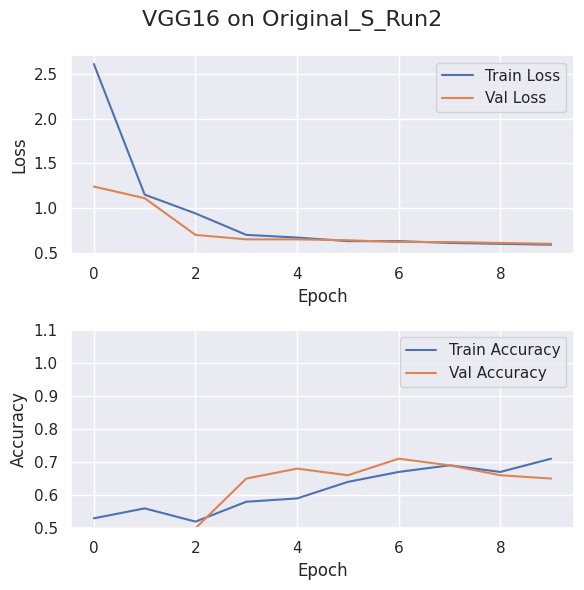

101/101 [==============================] - 23s 222ms/step
{'Test Loss': 0.5706, 'Test Accuracy': 0.8189, 'F1 Score': 0.82, 'Sensitivity (Recall)': 0.82, 'Precision': 0.83}


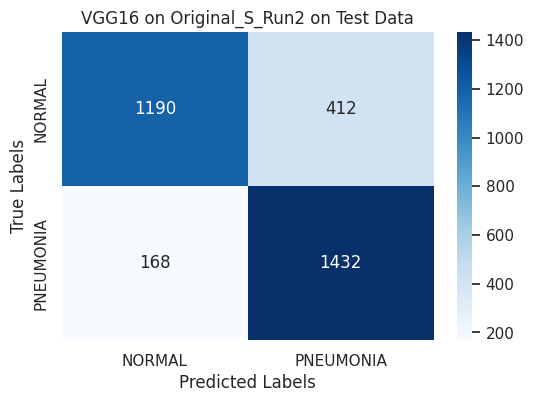

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
10/10 [==============================] - 4s 326ms/step - loss: 1.6836 - accuracy: 0.4344 - val_loss: 0.7347 - val_accuracy: 0.5000
Epoch 2/10
10/10 [==============================] - 3s 301ms/step - loss: 0.7855 - accuracy: 0.4906 - val_loss: 0.7027 - val_accuracy: 0.5000
Epoch 3/10
10/10 [==============================] - 3s 307ms/step - loss: 0.6907 - accuracy: 0.5406 - val_loss: 0.6778 - val_accuracy: 0.5000
Epoch 4/10
10/10 [==============================] - 3s 299ms/step - loss: 0.7030 - accuracy: 0.5188 - val_loss: 0.6708 - val_accuracy: 0.8000
Epoch 5/10
10/10 [==============================] - 3s 301ms/step - loss: 0.6725 - accuracy: 0.6156 - val_loss: 0.6648 - val_accuracy: 0.7875
Epoch 6/10
10/10 [==============================] - 3s 301ms/step - loss: 0.6470 - accuracy: 0.6781 - val_loss: 0.6499 - val_accuracy: 0.6750
Epoch 7/10
10/10 [==============================] - 3s 299ms/step - loss: 0.6591 - accuracy: 0.5969 - val_los

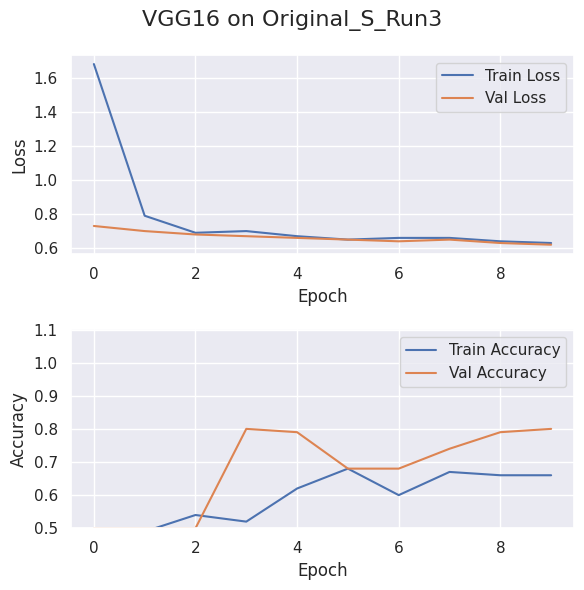

101/101 [==============================] - 23s 223ms/step
{'Test Loss': 0.6037, 'Test Accuracy': 0.9147, 'F1 Score': 0.91, 'Sensitivity (Recall)': 0.91, 'Precision': 0.92}


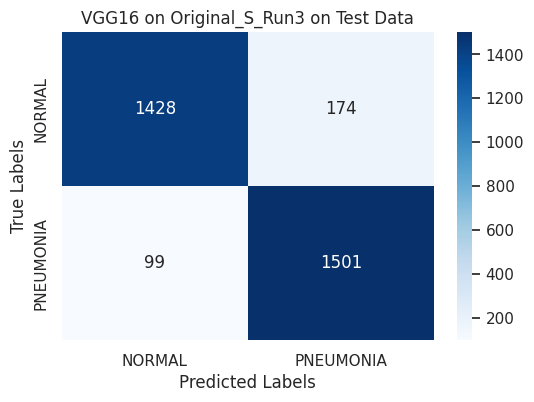

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
10/10 [==============================] - 4s 332ms/step - loss: 1.4046 - accuracy: 0.4906 - val_loss: 0.7072 - val_accuracy: 0.5000
Epoch 2/10
10/10 [==============================] - 3s 303ms/step - loss: 0.7481 - accuracy: 0.5469 - val_loss: 0.7115 - val_accuracy: 0.5000
Epoch 3/10
10/10 [==============================] - 3s 299ms/step - loss: 0.7353 - accuracy: 0.5219 - val_loss: 0.6733 - val_accuracy: 0.5125
Epoch 4/10
10/10 [==============================] - 3s 310ms/step - loss: 0.6505 - accuracy: 0.5844 - val_loss: 0.6366 - val_accuracy: 0.7125
Epoch 5/10
10/10 [==============================] - 3s 300ms/step - loss: 0.6407 - accuracy: 0.6938 - val_loss: 0.6221 - val_accuracy: 0.7500
Epoch 6/10
10/10 [==============================] - 3s 302ms/step - loss: 0.5957 - accuracy: 0.7156 - val_loss: 0.6086 - val_accuracy: 0.7500
Epoch 7/10
10/10 [==============================] - 3s 305ms/step - loss: 0.6205 - accuracy: 0.6969 - val_los

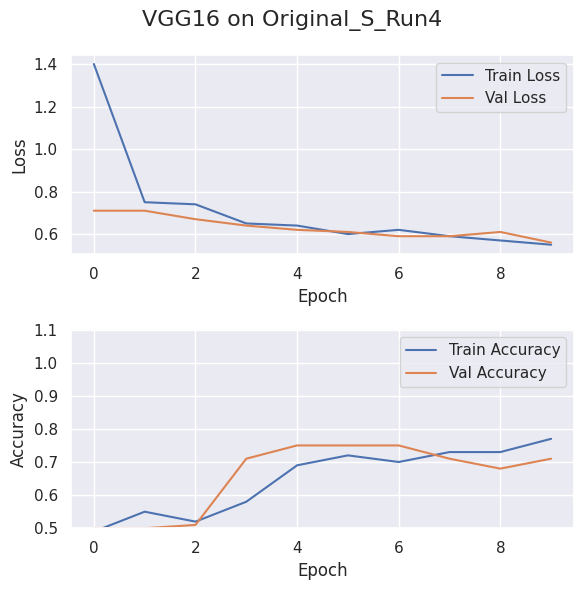

101/101 [==============================] - 23s 223ms/step
{'Test Loss': 0.5165, 'Test Accuracy': 0.8476, 'F1 Score': 0.85, 'Sensitivity (Recall)': 0.85, 'Precision': 0.85}


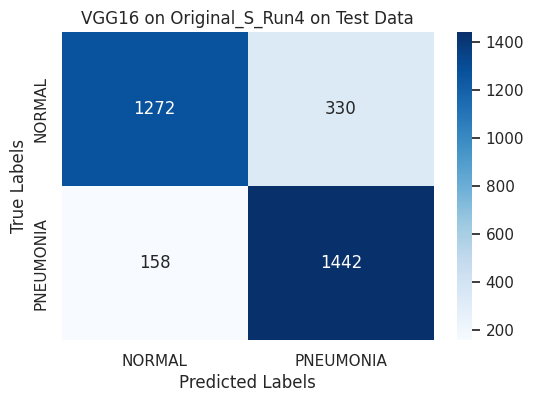

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
10/10 [==============================] - 4s 324ms/step - loss: 1.8779 - accuracy: 0.4750 - val_loss: 0.7218 - val_accuracy: 0.5000
Epoch 2/10
10/10 [==============================] - 3s 298ms/step - loss: 0.8535 - accuracy: 0.5000 - val_loss: 0.7852 - val_accuracy: 0.5000
Epoch 3/10
10/10 [==============================] - 3s 301ms/step - loss: 0.7713 - accuracy: 0.5156 - val_loss: 0.6898 - val_accuracy: 0.5000
Epoch 4/10
10/10 [==============================] - 3s 305ms/step - loss: 0.6926 - accuracy: 0.5469 - val_loss: 0.6804 - val_accuracy: 0.5375
Epoch 5/10
10/10 [==============================] - 3s 303ms/step - loss: 0.6785 - accuracy: 0.5969 - val_loss: 0.6742 - val_accuracy: 0.6500
Epoch 6/10
10/10 [==============================] - 3s 301ms/step - loss: 0.6756 - accuracy: 0.6000 - val_loss: 0.6706 - val_accuracy: 0.7125
Epoch 7/10
10/10 [==============================] - 3s 301ms/step - loss: 0.6640 - accuracy: 0.6687 - val_los

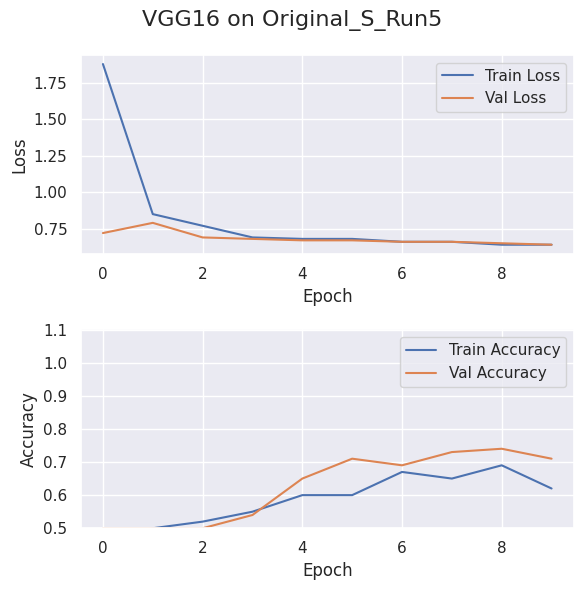

101/101 [==============================] - 22s 220ms/step
{'Test Loss': 0.618, 'Test Accuracy': 0.8235, 'F1 Score': 0.82, 'Sensitivity (Recall)': 0.82, 'Precision': 0.85}


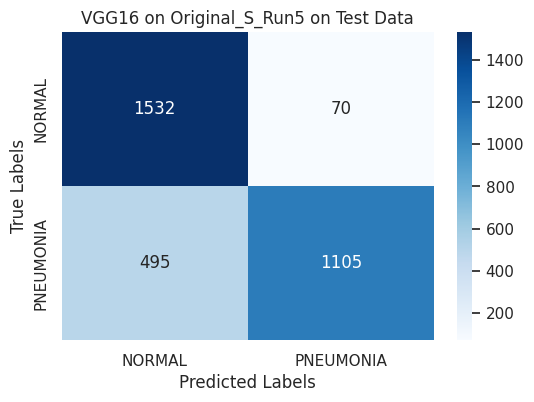

In [5]:
   
title = "VGG16 on Original_S"
file_name = "Trained_Models/training_history_plot_original_S.png"

for i in range(0, n):
    trained_model, test_metrics, confusion_matrix = cv_train_and_evaluate_model(
        dataset_dir_org, 
        test_dataset_dir, 
        class_labels,  
        vgg_model,
        weights=None,
        input_shape=input_shape, 
        title=f"{title}_Run{i+1}", 
        file_name=file_name,  # Now treated as a keyword argument
        cv=cv, 
        epochs=epochs, 
        batch_size=batch_size
    )

#### Train on Mixed DDPM Dataset

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
110/110 [==============================] - 33s 293ms/step - loss: 0.6788 - accuracy: 0.6318 - val_loss: 0.5269 - val_accuracy: 0.8068
Epoch 2/10
110/110 [==============================] - 32s 290ms/step - loss: 0.5239 - accuracy: 0.7392 - val_loss: 0.4408 - val_accuracy: 0.8398
Epoch 3/10
110/110 [==============================] - 32s 291ms/step - loss: 0.4978 - accuracy: 0.7597 - val_loss: 0.5230 - val_accuracy: 0.7170
Epoch 4/10
110/110 [==============================] - 32s 292ms/step - loss: 0.4479 - accuracy: 0.7949 - val_loss: 0.3908 - val_accuracy: 0.8648
Epoch 5/10
110/110 [==============================] - 32s 290ms/step - loss: 0.4218 - accuracy: 0.8179 - val_loss: 0.3782 - val_accuracy: 0.8705
Epoch 6/10
110/110 [==============================] - 32s 291ms/step - loss: 0.4007 - accuracy: 0.8216 - val_loss: 0.3691 - val_accuracy: 0.8602
Epoch 7/10
110/110 [==============================] - 32s 292ms/step - loss: 0.3998 - accur

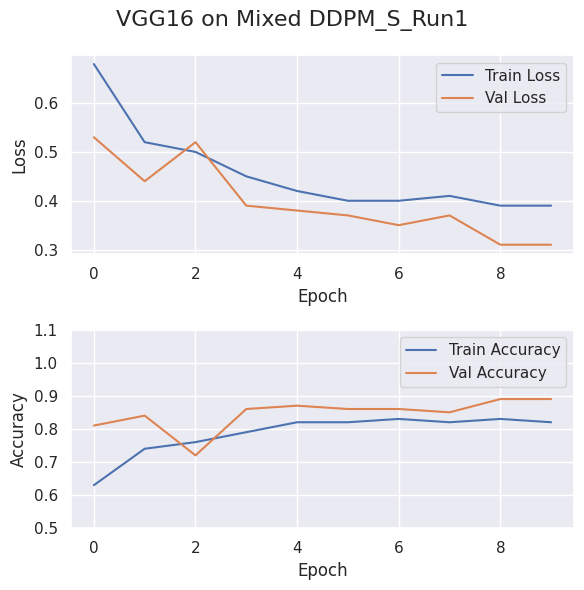

101/101 [==============================] - 23s 223ms/step
{'Test Loss': 0.2236, 'Test Accuracy': 0.9394, 'F1 Score': 0.94, 'Sensitivity (Recall)': 0.94, 'Precision': 0.94}


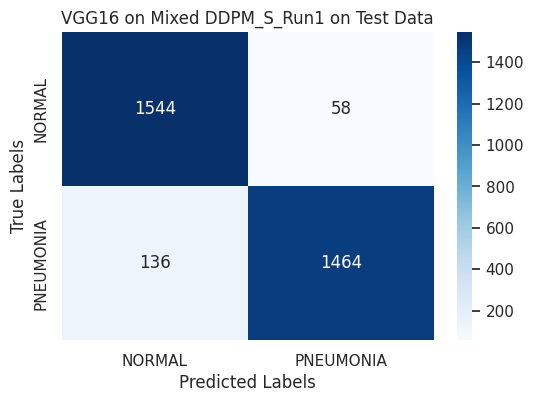

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
110/110 [==============================] - 33s 291ms/step - loss: 0.6601 - accuracy: 0.6693 - val_loss: 0.4873 - val_accuracy: 0.7830
Epoch 2/10
110/110 [==============================] - 32s 289ms/step - loss: 0.4702 - accuracy: 0.7818 - val_loss: 0.3923 - val_accuracy: 0.8523
Epoch 3/10
110/110 [==============================] - 32s 291ms/step - loss: 0.4466 - accuracy: 0.7915 - val_loss: 0.5091 - val_accuracy: 0.7250
Epoch 4/10
110/110 [==============================] - 32s 291ms/step - loss: 0.4116 - accuracy: 0.8116 - val_loss: 0.3383 - val_accuracy: 0.8682
Epoch 5/10
110/110 [==============================] - 32s 290ms/step - loss: 0.3798 - accuracy: 0.8273 - val_loss: 0.4026 - val_accuracy: 0.8193
Epoch 6/10
110/110 [==============================] - 32s 289ms/step - loss: 0.3734 - accuracy: 0.8389 - val_loss: 0.3073 - val_accuracy: 0.8670
Epoch 7/10
110/110 [==============================] - 32s 291ms/step - loss: 0.3505 - accur

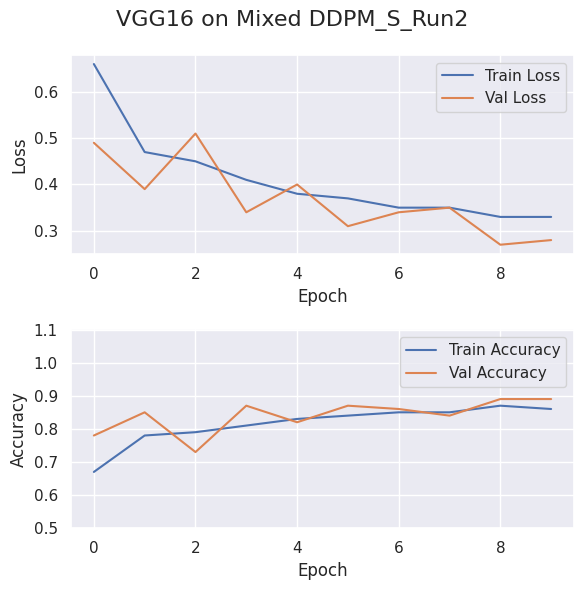

101/101 [==============================] - 23s 225ms/step
{'Test Loss': 0.192, 'Test Accuracy': 0.9335, 'F1 Score': 0.93, 'Sensitivity (Recall)': 0.93, 'Precision': 0.94}


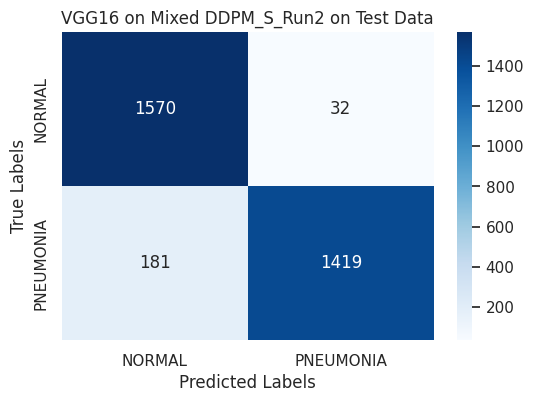

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
110/110 [==============================] - 33s 292ms/step - loss: 0.7067 - accuracy: 0.6202 - val_loss: 0.5468 - val_accuracy: 0.8057
Epoch 2/10
110/110 [==============================] - 32s 291ms/step - loss: 0.5356 - accuracy: 0.7389 - val_loss: 0.4531 - val_accuracy: 0.8443
Epoch 3/10
110/110 [==============================] - 32s 291ms/step - loss: 0.5040 - accuracy: 0.7526 - val_loss: 0.4654 - val_accuracy: 0.7864
Epoch 4/10
110/110 [==============================] - 32s 292ms/step - loss: 0.4423 - accuracy: 0.7977 - val_loss: 0.3754 - val_accuracy: 0.8489
Epoch 5/10
110/110 [==============================] - 32s 292ms/step - loss: 0.4265 - accuracy: 0.8097 - val_loss: 0.3791 - val_accuracy: 0.8398
Epoch 6/10
110/110 [==============================] - 32s 292ms/step - loss: 0.4001 - accuracy: 0.8241 - val_loss: 0.3363 - val_accuracy: 0.8705
Epoch 7/10
110/110 [==============================] - 32s 292ms/step - loss: 0.3964 - accur

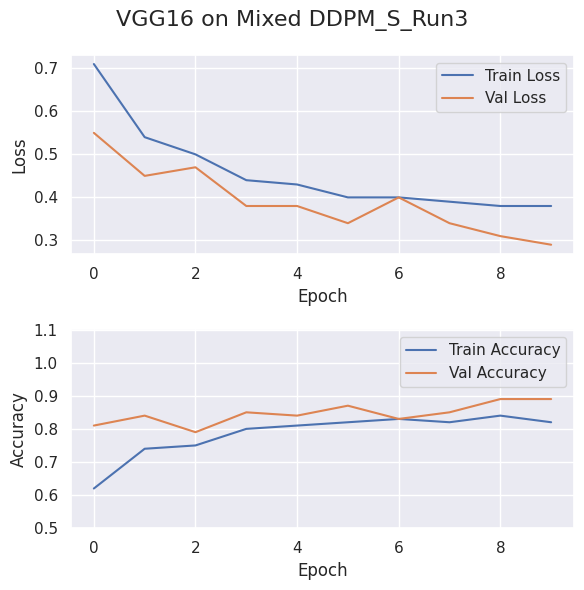

101/101 [==============================] - 23s 223ms/step
{'Test Loss': 0.2144, 'Test Accuracy': 0.9338, 'F1 Score': 0.93, 'Sensitivity (Recall)': 0.93, 'Precision': 0.94}


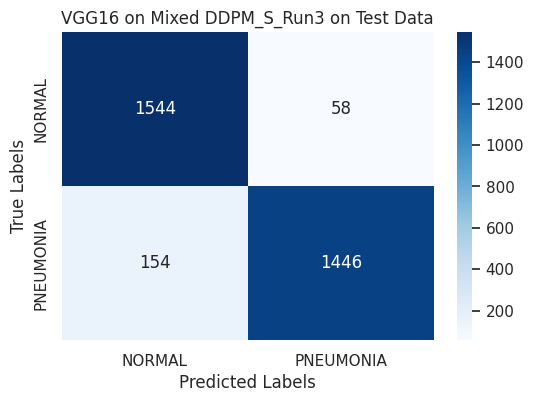

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
110/110 [==============================] - 33s 291ms/step - loss: 0.7293 - accuracy: 0.6273 - val_loss: 0.5337 - val_accuracy: 0.8034
Epoch 2/10
110/110 [==============================] - 32s 289ms/step - loss: 0.5171 - accuracy: 0.7466 - val_loss: 0.4365 - val_accuracy: 0.8545
Epoch 3/10
110/110 [==============================] - 32s 289ms/step - loss: 0.4921 - accuracy: 0.7665 - val_loss: 0.4628 - val_accuracy: 0.7852
Epoch 4/10
110/110 [==============================] - 32s 290ms/step - loss: 0.4424 - accuracy: 0.8014 - val_loss: 0.3647 - val_accuracy: 0.8636
Epoch 5/10
110/110 [==============================] - 32s 291ms/step - loss: 0.4197 - accuracy: 0.8065 - val_loss: 0.3710 - val_accuracy: 0.8614
Epoch 6/10
110/110 [==============================] - 32s 290ms/step - loss: 0.4159 - accuracy: 0.8159 - val_loss: 0.3353 - val_accuracy: 0.8614
Epoch 7/10
110/110 [==============================] - 32s 291ms/step - loss: 0.4144 - accur

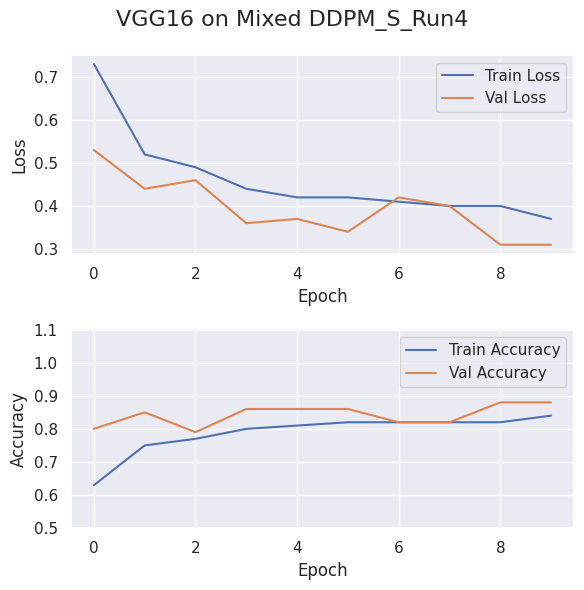

101/101 [==============================] - 23s 222ms/step
{'Test Loss': 0.2279, 'Test Accuracy': 0.9319, 'F1 Score': 0.93, 'Sensitivity (Recall)': 0.93, 'Precision': 0.93}


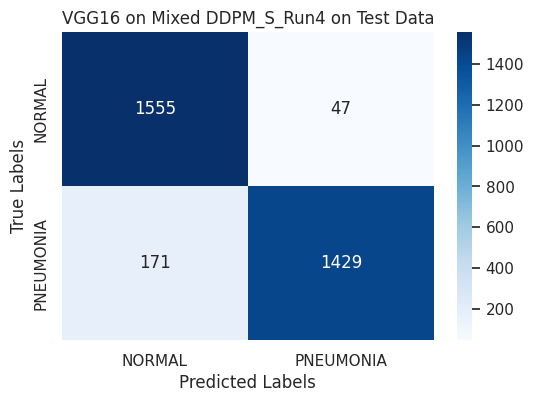

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
110/110 [==============================] - 33s 291ms/step - loss: 0.7549 - accuracy: 0.6020 - val_loss: 0.5980 - val_accuracy: 0.7614
Epoch 2/10
110/110 [==============================] - 32s 290ms/step - loss: 0.5816 - accuracy: 0.6969 - val_loss: 0.5258 - val_accuracy: 0.7739
Epoch 3/10
110/110 [==============================] - 32s 289ms/step - loss: 0.5167 - accuracy: 0.7545 - val_loss: 0.4723 - val_accuracy: 0.7886
Epoch 4/10
110/110 [==============================] - 32s 290ms/step - loss: 0.4546 - accuracy: 0.7969 - val_loss: 0.3989 - val_accuracy: 0.8455
Epoch 5/10
110/110 [==============================] - 32s 289ms/step - loss: 0.4177 - accuracy: 0.8185 - val_loss: 0.3715 - val_accuracy: 0.8568
Epoch 6/10
110/110 [==============================] - 32s 289ms/step - loss: 0.4133 - accuracy: 0.8190 - val_loss: 0.3612 - val_accuracy: 0.8682
Epoch 7/10
110/110 [==============================] - 32s 289ms/step - loss: 0.4080 - accur

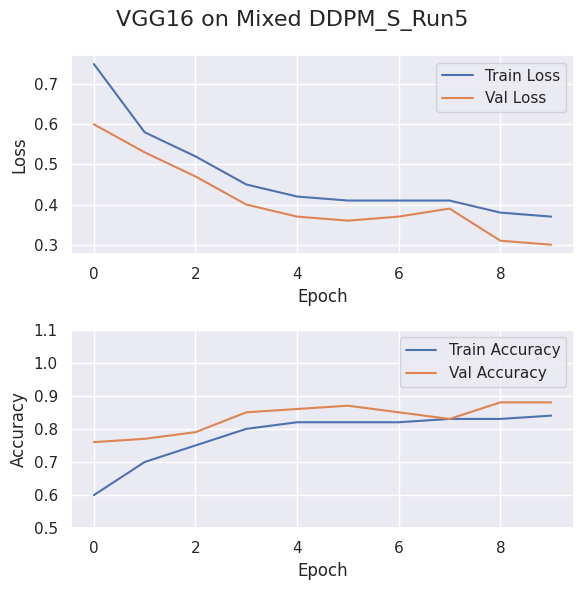

101/101 [==============================] - 23s 221ms/step
{'Test Loss': 0.1963, 'Test Accuracy': 0.9391, 'F1 Score': 0.94, 'Sensitivity (Recall)': 0.94, 'Precision': 0.94}


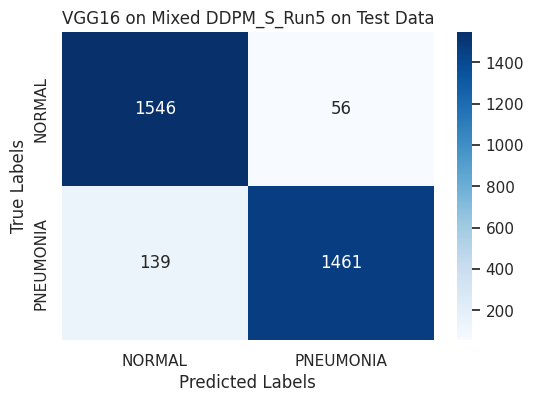

In [6]:
title = "VGG16 on Mixed DDPM_S" 
file_name = "Trained_Models/training_history_plot_Mixed_DDPM_S.png"

for i in range(0, n):
    trained_model, test_metrics, confusion_matrix = cv_train_and_evaluate_model(
        dataset_dir_ddpm, 
        test_dataset_dir, 
        class_labels,  
        vgg_model,
        weights=None,
        input_shape=input_shape, 
        title=f"{title}_Run{i+1}", 
        file_name=file_name,  
        cv=cv, 
        epochs=epochs, 
        batch_size=batch_size
    )

#### Train on Mixed PGGANs150k Dataset

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
65/65 [==============================] - 20s 291ms/step - loss: 0.5599 - accuracy: 0.8141 - val_loss: 0.4326 - val_accuracy: 0.8421
Epoch 2/10
65/65 [==============================] - 19s 287ms/step - loss: 0.4082 - accuracy: 0.8409 - val_loss: 0.3705 - val_accuracy: 0.8421
Epoch 3/10
65/65 [==============================] - 19s 286ms/step - loss: 0.3781 - accuracy: 0.8472 - val_loss: 0.3286 - val_accuracy: 0.8421
Epoch 4/10
65/65 [==============================] - 19s 289ms/step - loss: 0.3212 - accuracy: 0.8604 - val_loss: 0.3030 - val_accuracy: 0.8441
Epoch 5/10
65/65 [==============================] - 19s 287ms/step - loss: 0.3173 - accuracy: 0.8712 - val_loss: 0.2483 - val_accuracy: 0.8869
Epoch 6/10
65/65 [==============================] - 19s 289ms/step - loss: 0.2735 - accuracy: 0.8946 - val_loss: 0.3157 - val_accuracy: 0.8460
Epoch 7/10
65/65 [==============================] - 19s 288ms/step - loss: 0.2482 - accuracy: 0.8980 - 

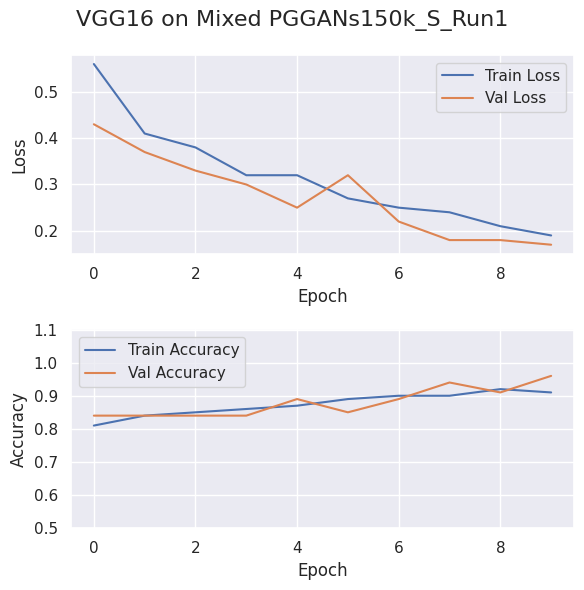

101/101 [==============================] - 23s 224ms/step
{'Test Loss': 1.4314, 'Test Accuracy': 0.554, 'F1 Score': 0.45, 'Sensitivity (Recall)': 0.55, 'Precision': 0.75}


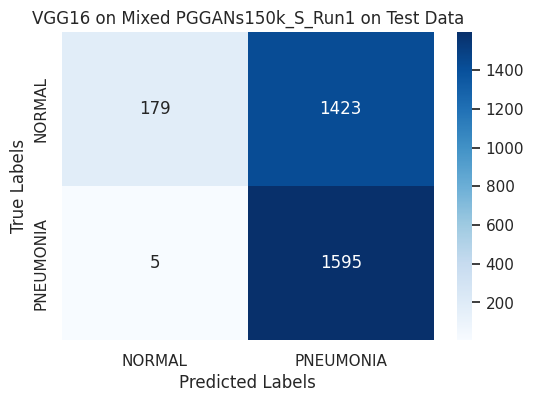

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
65/65 [==============================] - 19s 289ms/step - loss: 0.5062 - accuracy: 0.8287 - val_loss: 0.3937 - val_accuracy: 0.8421
Epoch 2/10
65/65 [==============================] - 18s 285ms/step - loss: 0.3890 - accuracy: 0.8424 - val_loss: 0.3372 - val_accuracy: 0.8421
Epoch 3/10
65/65 [==============================] - 18s 285ms/step - loss: 0.3490 - accuracy: 0.8555 - val_loss: 0.2787 - val_accuracy: 0.8616
Epoch 4/10
65/65 [==============================] - 18s 285ms/step - loss: 0.2811 - accuracy: 0.8770 - val_loss: 0.2451 - val_accuracy: 0.8577
Epoch 5/10
65/65 [==============================] - 18s 285ms/step - loss: 0.2600 - accuracy: 0.8863 - val_loss: 0.2262 - val_accuracy: 0.9162
Epoch 6/10
65/65 [==============================] - 19s 287ms/step - loss: 0.2257 - accuracy: 0.9058 - val_loss: 0.2483 - val_accuracy: 0.8519
Epoch 7/10
65/65 [==============================] - 19s 286ms/step - loss: 0.1992 - accuracy: 0.9161 - 

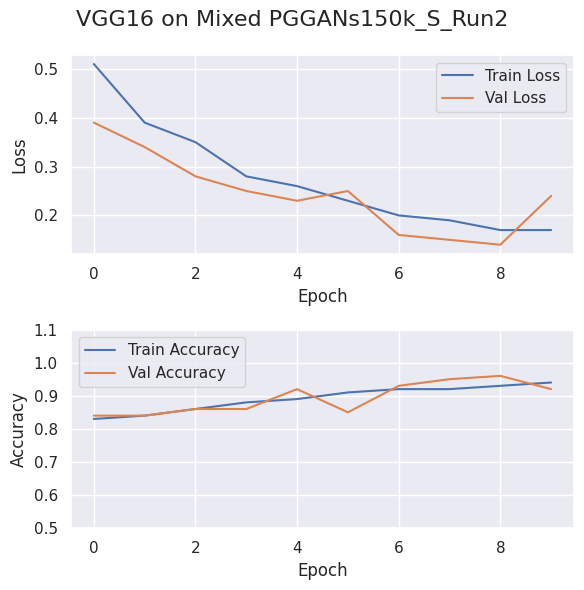

101/101 [==============================] - 23s 224ms/step
{'Test Loss': 1.2159, 'Test Accuracy': 0.6318, 'F1 Score': 0.59, 'Sensitivity (Recall)': 0.63, 'Precision': 0.73}


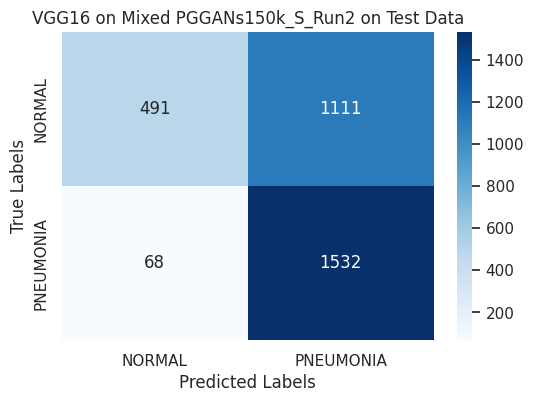

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
65/65 [==============================] - 20s 292ms/step - loss: 0.5054 - accuracy: 0.8189 - val_loss: 0.3320 - val_accuracy: 0.8460
Epoch 2/10
65/65 [==============================] - 19s 288ms/step - loss: 0.3276 - accuracy: 0.8599 - val_loss: 0.2602 - val_accuracy: 0.9201
Epoch 3/10
65/65 [==============================] - 19s 289ms/step - loss: 0.2740 - accuracy: 0.8809 - val_loss: 0.2099 - val_accuracy: 0.9318
Epoch 4/10
65/65 [==============================] - 19s 292ms/step - loss: 0.2237 - accuracy: 0.9156 - val_loss: 0.2420 - val_accuracy: 0.8577
Epoch 5/10
65/65 [==============================] - 19s 288ms/step - loss: 0.2049 - accuracy: 0.9190 - val_loss: 0.1597 - val_accuracy: 0.9493
Epoch 6/10
65/65 [==============================] - 19s 290ms/step - loss: 0.1781 - accuracy: 0.9287 - val_loss: 0.2795 - val_accuracy: 0.8558
Epoch 7/10
65/65 [==============================] - 19s 287ms/step - loss: 0.1715 - accuracy: 0.9370 - 

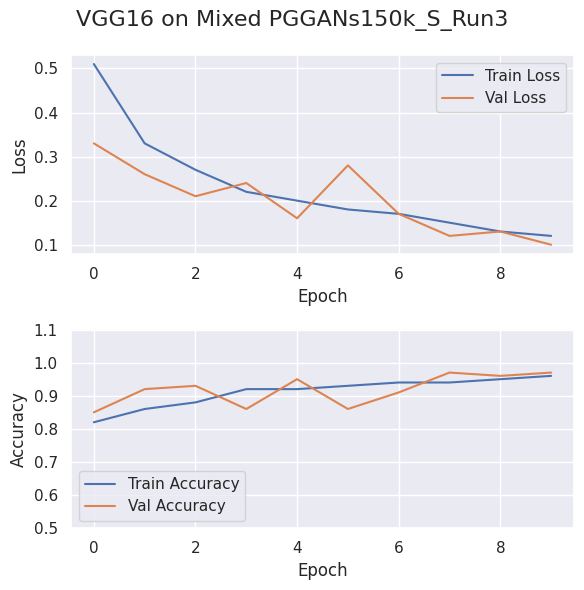

101/101 [==============================] - 23s 222ms/step
{'Test Loss': 4.2084, 'Test Accuracy': 0.5144, 'F1 Score': 0.37, 'Sensitivity (Recall)': 0.51, 'Precision': 0.73}


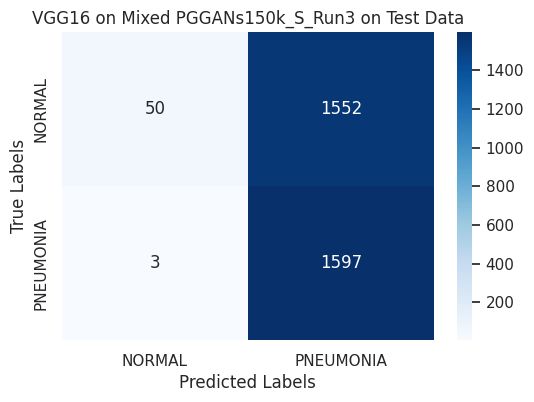

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
65/65 [==============================] - 19s 289ms/step - loss: 0.5717 - accuracy: 0.8072 - val_loss: 0.3972 - val_accuracy: 0.8421
Epoch 2/10
65/65 [==============================] - 18s 285ms/step - loss: 0.3903 - accuracy: 0.8433 - val_loss: 0.3280 - val_accuracy: 0.8421
Epoch 3/10
65/65 [==============================] - 18s 285ms/step - loss: 0.3473 - accuracy: 0.8565 - val_loss: 0.2718 - val_accuracy: 0.8811
Epoch 4/10
65/65 [==============================] - 18s 285ms/step - loss: 0.2770 - accuracy: 0.8858 - val_loss: 0.2684 - val_accuracy: 0.8460
Epoch 5/10
65/65 [==============================] - 19s 286ms/step - loss: 0.2722 - accuracy: 0.8868 - val_loss: 0.2238 - val_accuracy: 0.9220
Epoch 6/10
65/65 [==============================] - 19s 287ms/step - loss: 0.2223 - accuracy: 0.9151 - val_loss: 0.2963 - val_accuracy: 0.8460
Epoch 7/10
65/65 [==============================] - 19s 286ms/step - loss: 0.1852 - accuracy: 0.9366 - 

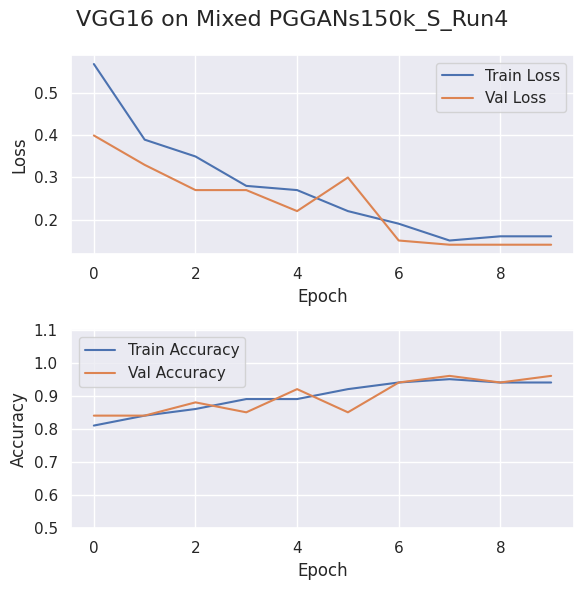

101/101 [==============================] - 23s 222ms/step
{'Test Loss': 1.6938, 'Test Accuracy': 0.5828, 'F1 Score': 0.5, 'Sensitivity (Recall)': 0.58, 'Precision': 0.75}


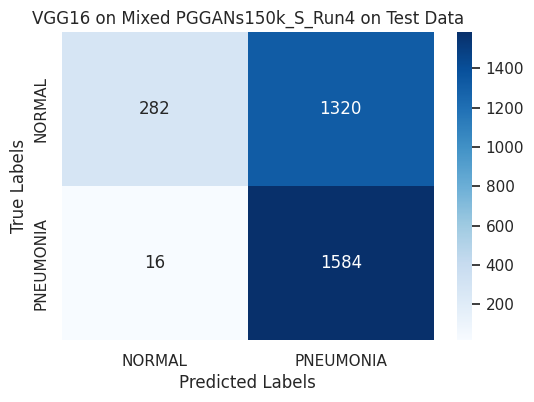

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
65/65 [==============================] - 19s 288ms/step - loss: 0.5880 - accuracy: 0.8111 - val_loss: 0.3583 - val_accuracy: 0.8421
Epoch 2/10
65/65 [==============================] - 19s 286ms/step - loss: 0.3583 - accuracy: 0.8555 - val_loss: 0.2869 - val_accuracy: 0.8499
Epoch 3/10
65/65 [==============================] - 19s 288ms/step - loss: 0.3435 - accuracy: 0.8594 - val_loss: 0.2576 - val_accuracy: 0.9123
Epoch 4/10
65/65 [==============================] - 19s 287ms/step - loss: 0.2714 - accuracy: 0.8824 - val_loss: 0.2463 - val_accuracy: 0.8519
Epoch 5/10
65/65 [==============================] - 19s 289ms/step - loss: 0.2612 - accuracy: 0.8941 - val_loss: 0.2115 - val_accuracy: 0.9474
Epoch 6/10
65/65 [==============================] - 19s 288ms/step - loss: 0.2304 - accuracy: 0.9073 - val_loss: 0.3048 - val_accuracy: 0.8421
Epoch 7/10
65/65 [==============================] - 19s 288ms/step - loss: 0.2050 - accuracy: 0.9175 - 

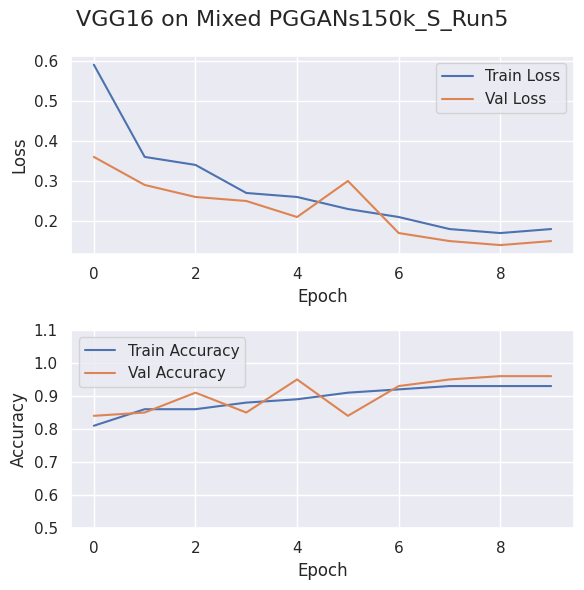

101/101 [==============================] - 23s 223ms/step
{'Test Loss': 2.8576, 'Test Accuracy': 0.5197, 'F1 Score': 0.38, 'Sensitivity (Recall)': 0.52, 'Precision': 0.73}


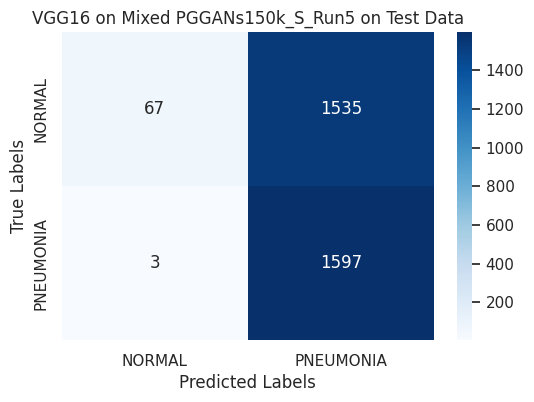

In [7]:
title = "VGG16 on Mixed PGGANs150k_S" 
file_name = "Trained_Models/training_history_plot_Mixed_PGGANs150k_S.png"
# model = vgg_model(input_shape=(128, 128, 3))
cv=1

for i in range(0, n):
    trained_model, test_metrics, confusion_matrix = cv_train_and_evaluate_model(
        dataset_dir_pggans150, 
        test_dataset_dir, 
        class_labels,  
        vgg_model,
        weights=None,
        input_shape=input_shape,
        title=f"{title}_Run{i+1}", 
        file_name=file_name,  
        cv=cv, 
        epochs=epochs, 
        batch_size=batch_size
    )

#### Train on Mixed PGGANs160k Dataset

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
110/110 [==============================] - 33s 290ms/step - loss: 0.7291 - accuracy: 0.6142 - val_loss: 0.5786 - val_accuracy: 0.7330
Epoch 2/10
110/110 [==============================] - 32s 289ms/step - loss: 0.6048 - accuracy: 0.6778 - val_loss: 0.5613 - val_accuracy: 0.7568
Epoch 3/10
110/110 [==============================] - 32s 290ms/step - loss: 0.5491 - accuracy: 0.7276 - val_loss: 0.5381 - val_accuracy: 0.7284
Epoch 4/10
110/110 [==============================] - 32s 289ms/step - loss: 0.5335 - accuracy: 0.7543 - val_loss: 0.5425 - val_accuracy: 0.7477
Epoch 5/10
110/110 [==============================] - 32s 289ms/step - loss: 0.4971 - accuracy: 0.7713 - val_loss: 0.4915 - val_accuracy: 0.7625
Epoch 6/10
110/110 [==============================] - 32s 289ms/step - loss: 0.4921 - accuracy: 0.7733 - val_loss: 0.4582 - val_accuracy: 0.8000
Epoch 7/10
110/110 [==============================] - 32s 289ms/step - loss: 0.4589 - accur

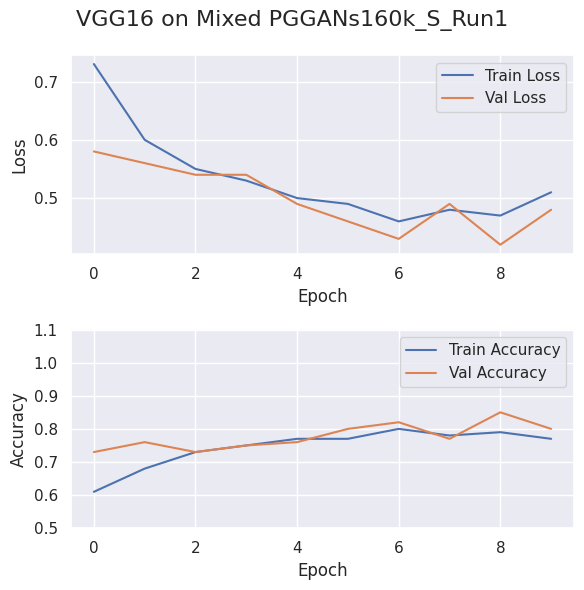

101/101 [==============================] - 23s 224ms/step
{'Test Loss': 0.4308, 'Test Accuracy': 0.871, 'F1 Score': 0.87, 'Sensitivity (Recall)': 0.87, 'Precision': 0.87}


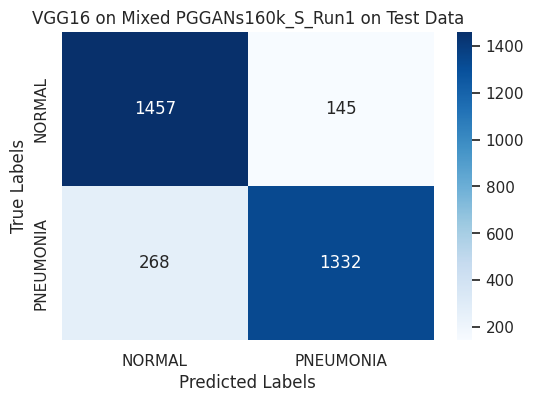

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
110/110 [==============================] - 33s 292ms/step - loss: 0.8109 - accuracy: 0.5784 - val_loss: 0.6266 - val_accuracy: 0.7716
Epoch 2/10
110/110 [==============================] - 32s 288ms/step - loss: 0.6149 - accuracy: 0.6631 - val_loss: 0.5739 - val_accuracy: 0.7864
Epoch 3/10
110/110 [==============================] - 32s 289ms/step - loss: 0.5768 - accuracy: 0.6994 - val_loss: 0.5660 - val_accuracy: 0.7193
Epoch 4/10
110/110 [==============================] - 32s 291ms/step - loss: 0.5801 - accuracy: 0.6844 - val_loss: 0.5646 - val_accuracy: 0.8057
Epoch 5/10
110/110 [==============================] - 32s 289ms/step - loss: 0.5753 - accuracy: 0.6472 - val_loss: 0.5343 - val_accuracy: 0.7898
Epoch 6/10
110/110 [==============================] - 32s 290ms/step - loss: 0.5457 - accuracy: 0.6969 - val_loss: 0.4724 - val_accuracy: 0.8023
Epoch 7/10
110/110 [==============================] - 32s 289ms/step - loss: 0.5177 - accur

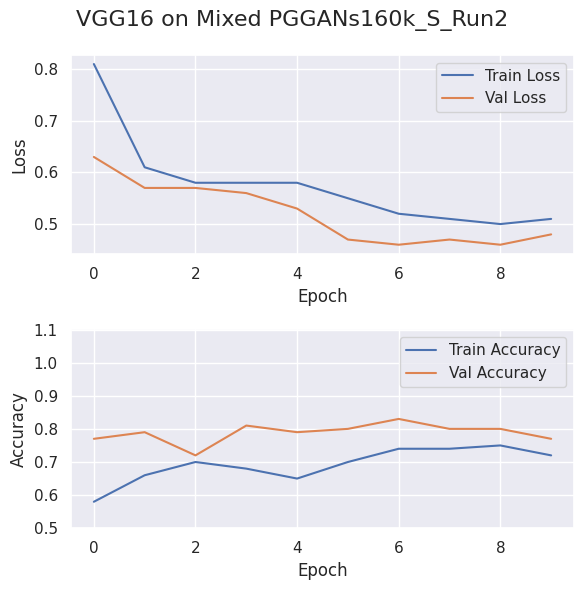

101/101 [==============================] - 23s 223ms/step
{'Test Loss': 0.4254, 'Test Accuracy': 0.8382, 'F1 Score': 0.83, 'Sensitivity (Recall)': 0.84, 'Precision': 0.87}


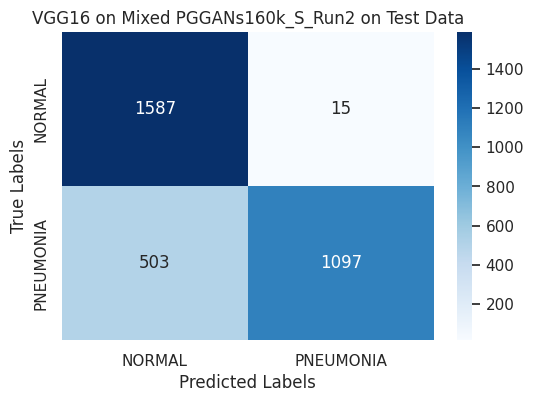

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
110/110 [==============================] - 33s 292ms/step - loss: 0.7071 - accuracy: 0.6264 - val_loss: 0.5634 - val_accuracy: 0.7386
Epoch 2/10
110/110 [==============================] - 32s 291ms/step - loss: 0.5879 - accuracy: 0.6889 - val_loss: 0.5232 - val_accuracy: 0.7648
Epoch 3/10
110/110 [==============================] - 32s 290ms/step - loss: 0.5144 - accuracy: 0.7582 - val_loss: 0.5545 - val_accuracy: 0.7011
Epoch 4/10
110/110 [==============================] - 32s 290ms/step - loss: 0.4771 - accuracy: 0.7795 - val_loss: 0.4535 - val_accuracy: 0.8227
Epoch 5/10
110/110 [==============================] - 32s 290ms/step - loss: 0.4403 - accuracy: 0.8082 - val_loss: 0.5230 - val_accuracy: 0.7307
Epoch 6/10
110/110 [==============================] - 32s 290ms/step - loss: 0.4385 - accuracy: 0.8156 - val_loss: 0.4123 - val_accuracy: 0.8170
Epoch 7/10
110/110 [==============================] - 32s 290ms/step - loss: 0.4197 - accur

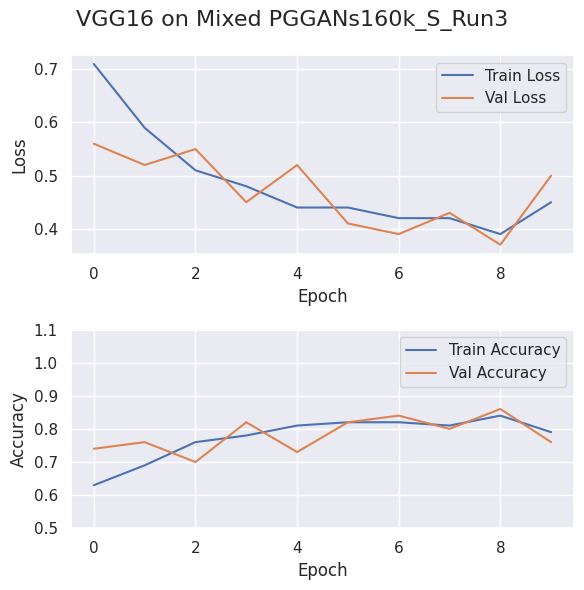

101/101 [==============================] - 23s 223ms/step
{'Test Loss': 0.4398, 'Test Accuracy': 0.837, 'F1 Score': 0.83, 'Sensitivity (Recall)': 0.84, 'Precision': 0.87}


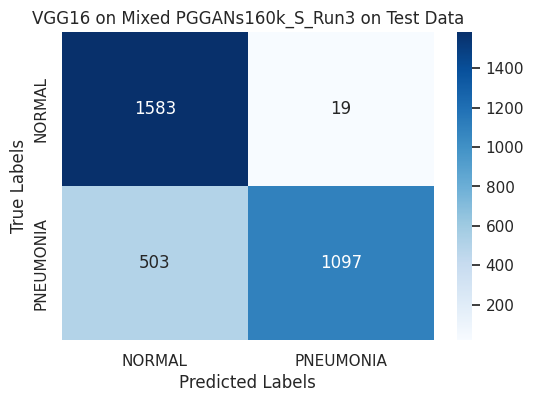

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
110/110 [==============================] - 33s 295ms/step - loss: 0.7497 - accuracy: 0.5835 - val_loss: 0.6129 - val_accuracy: 0.7227
Epoch 2/10
110/110 [==============================] - 32s 294ms/step - loss: 0.5960 - accuracy: 0.6935 - val_loss: 0.5505 - val_accuracy: 0.7523
Epoch 3/10
110/110 [==============================] - 32s 294ms/step - loss: 0.5502 - accuracy: 0.7332 - val_loss: 0.5808 - val_accuracy: 0.6830
Epoch 4/10
110/110 [==============================] - 32s 296ms/step - loss: 0.5232 - accuracy: 0.7543 - val_loss: 0.5179 - val_accuracy: 0.7511
Epoch 5/10
110/110 [==============================] - 32s 294ms/step - loss: 0.4967 - accuracy: 0.7730 - val_loss: 0.4972 - val_accuracy: 0.7750
Epoch 6/10
110/110 [==============================] - 32s 295ms/step - loss: 0.4566 - accuracy: 0.7977 - val_loss: 0.4147 - val_accuracy: 0.8409
Epoch 7/10
110/110 [==============================] - 33s 296ms/step - loss: 0.4664 - accur

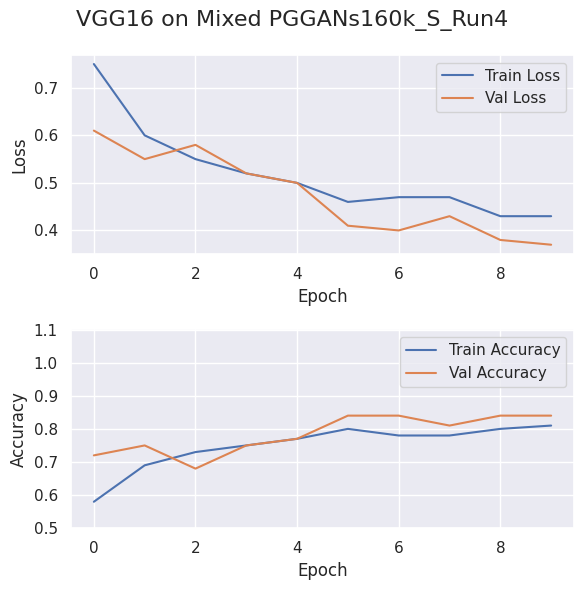

101/101 [==============================] - 23s 224ms/step
{'Test Loss': 0.2826, 'Test Accuracy': 0.9119, 'F1 Score': 0.91, 'Sensitivity (Recall)': 0.91, 'Precision': 0.91}


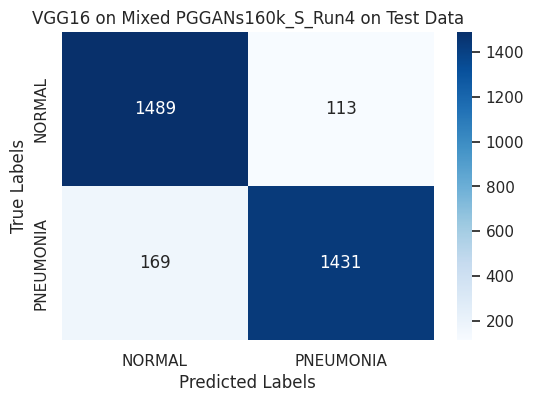

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
110/110 [==============================] - 33s 295ms/step - loss: 0.7269 - accuracy: 0.6233 - val_loss: 0.5748 - val_accuracy: 0.7636
Epoch 2/10
110/110 [==============================] - 32s 294ms/step - loss: 0.5414 - accuracy: 0.7369 - val_loss: 0.4754 - val_accuracy: 0.8068
Epoch 3/10
110/110 [==============================] - 32s 294ms/step - loss: 0.4846 - accuracy: 0.7713 - val_loss: 0.4995 - val_accuracy: 0.7500
Epoch 4/10
110/110 [==============================] - 32s 294ms/step - loss: 0.4642 - accuracy: 0.7901 - val_loss: 0.4113 - val_accuracy: 0.8398
Epoch 5/10
110/110 [==============================] - 32s 294ms/step - loss: 0.4327 - accuracy: 0.8068 - val_loss: 0.4391 - val_accuracy: 0.7932
Epoch 6/10
110/110 [==============================] - 32s 294ms/step - loss: 0.4209 - accuracy: 0.8153 - val_loss: 0.4157 - val_accuracy: 0.8409
Epoch 7/10
110/110 [==============================] - 32s 294ms/step - loss: 0.4161 - accur

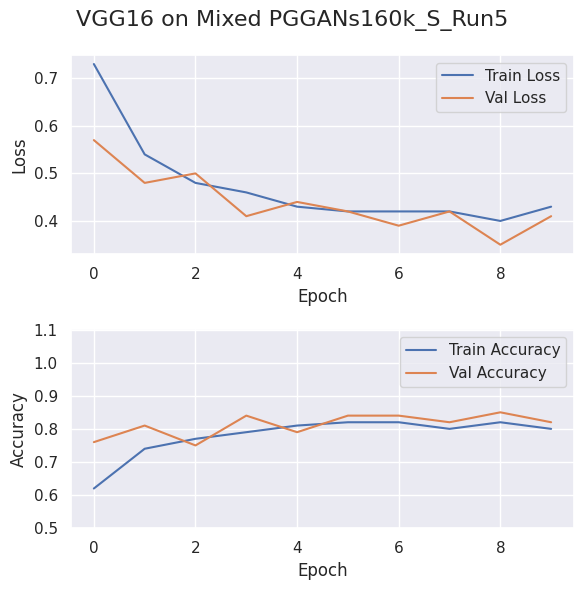

101/101 [==============================] - 23s 224ms/step
{'Test Loss': 0.3229, 'Test Accuracy': 0.8857, 'F1 Score': 0.88, 'Sensitivity (Recall)': 0.89, 'Precision': 0.9}


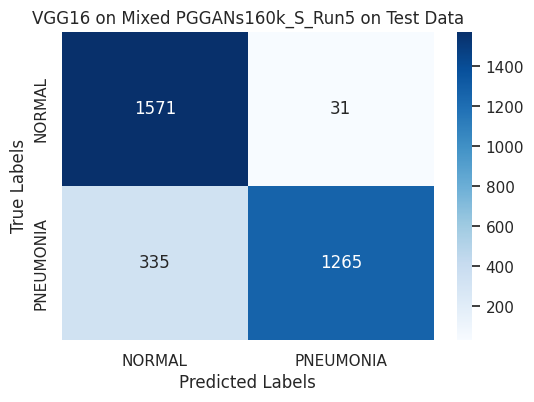

In [8]:
title = "VGG16 on Mixed PGGANs160k_S" 
file_name = "Trained_Models/training_history_plot_Mixed_PGGANs160k_S.png"
# model = vgg_model(input_shape=(128, 128, 3))
cv=1

for i in range(0, n):
    trained_model, test_metrics, confusion_matrix = cv_train_and_evaluate_model(
        dataset_dir_pggans160, 
        test_dataset_dir, 
        class_labels,  
        vgg_model,
        weights=None,
        input_shape=input_shape, 
        title=f"{title}_Run{i+1}", 
        file_name=file_name,  
        cv=cv, 
        epochs=epochs, 
        batch_size=batch_size
    )


## Resnet50

### cv=1

#### Train on Original Dataset


Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
10/10 [==============================] - 6s 314ms/step - loss: 122.7702 - accuracy: 0.4906 - val_loss: 7.7699 - val_accuracy: 0.5875
Epoch 2/10
10/10 [==============================] - 2s 209ms/step - loss: 45.2793 - accuracy: 0.5750 - val_loss: 5.6983 - val_accuracy: 0.6500
Epoch 3/10
10/10 [==============================] - 2s 209ms/step - loss: 26.8344 - accuracy: 0.5875 - val_loss: 7.2871 - val_accuracy: 0.6375
Epoch 4/10
10/10 [==============================] - 2s 211ms/step - loss: 13.8347 - accuracy: 0.6250 - val_loss: 6.2835 - val_accuracy: 0.6375
Epoch 5/10
10/10 [==============================] - 2s 208ms/step - loss: 3.6691 - accuracy: 0.7344 - val_loss: 1.7439 - val_accuracy: 0.7000
Epoch 6/10
10/10 [==============================] - 2s 208ms/step - loss: 1.5062 - accuracy: 0.7094 - val_loss: 0.9293 - val_accuracy: 0.7625
Epoch 7/10
10/10 [==============================] - 2s 211ms/step - loss: 1.0224 - accuracy: 0.7812 - va

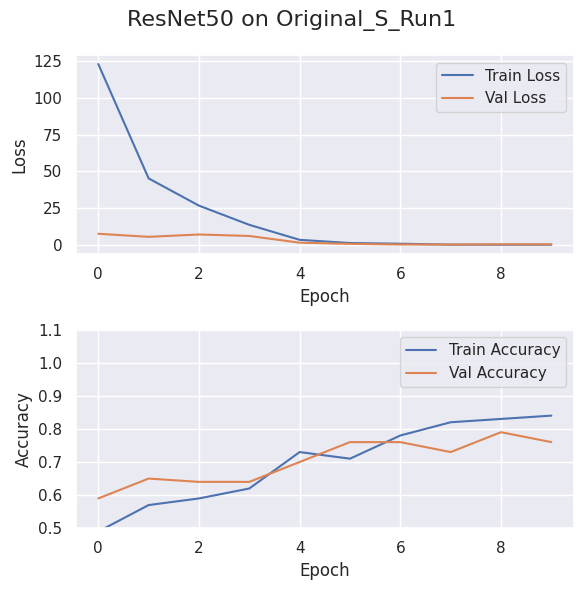

101/101 [==============================] - 14s 130ms/step
{'Test Loss': 0.3068, 'Test Accuracy': 0.8645, 'F1 Score': 0.86, 'Sensitivity (Recall)': 0.86, 'Precision': 0.88}


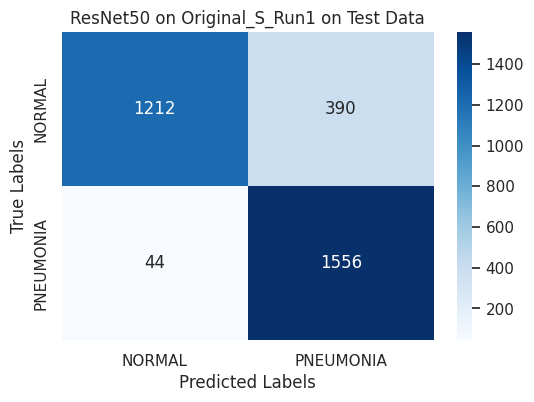

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
10/10 [==============================] - 6s 380ms/step - loss: 143.3039 - accuracy: 0.4719 - val_loss: 24.3750 - val_accuracy: 0.5000
Epoch 2/10
10/10 [==============================] - 2s 207ms/step - loss: 15.0643 - accuracy: 0.5938 - val_loss: 8.2582 - val_accuracy: 0.5000
Epoch 3/10
10/10 [==============================] - 2s 215ms/step - loss: 8.4782 - accuracy: 0.5813 - val_loss: 1.1944 - val_accuracy: 0.6875
Epoch 4/10
10/10 [==============================] - 2s 210ms/step - loss: 1.1536 - accuracy: 0.7031 - val_loss: 0.5692 - val_accuracy: 0.6750
Epoch 5/10
10/10 [==============================] - 2s 212ms/step - loss: 0.5712 - accuracy: 0.6531 - val_loss: 0.6640 - val_accuracy: 0.6250
Epoch 6/10
10/10 [==============================] - 2s 209ms/step - loss: 0.7757 - accuracy: 0.6031 - val_loss: 0.5974 - val_accuracy: 0.7750
Epoch 7/10
10/10 [==============================] - 2s 209ms/step - loss: 0.5986 - accuracy: 0.5938 - val

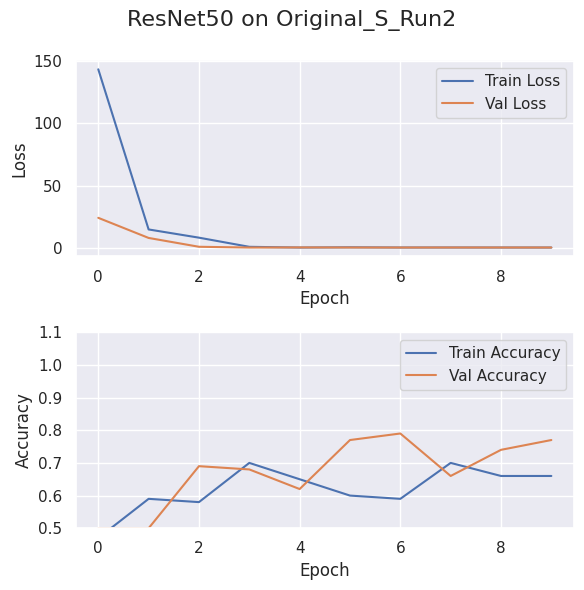

101/101 [==============================] - 14s 130ms/step
{'Test Loss': 0.5383, 'Test Accuracy': 0.8926, 'F1 Score': 0.89, 'Sensitivity (Recall)': 0.89, 'Precision': 0.9}


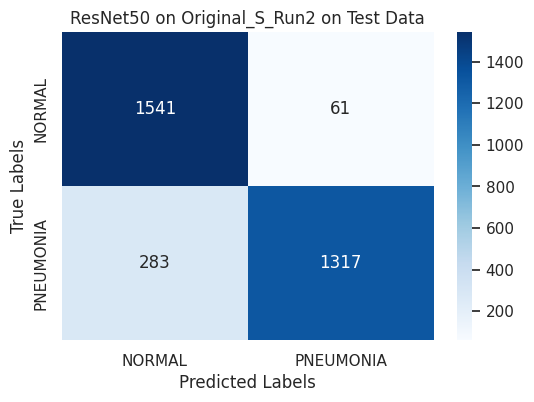

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
10/10 [==============================] - 5s 306ms/step - loss: 146.1905 - accuracy: 0.4406 - val_loss: 38.0860 - val_accuracy: 0.5000
Epoch 2/10
10/10 [==============================] - 2s 210ms/step - loss: 39.4379 - accuracy: 0.5031 - val_loss: 2.2735 - val_accuracy: 0.6875
Epoch 3/10
10/10 [==============================] - 2s 207ms/step - loss: 13.1600 - accuracy: 0.6062 - val_loss: 2.4706 - val_accuracy: 0.6500
Epoch 4/10
10/10 [==============================] - 2s 205ms/step - loss: 2.6717 - accuracy: 0.6500 - val_loss: 0.7021 - val_accuracy: 0.7125
Epoch 5/10
10/10 [==============================] - 2s 207ms/step - loss: 0.6565 - accuracy: 0.6438 - val_loss: 0.6018 - val_accuracy: 0.6750
Epoch 6/10
10/10 [==============================] - 2s 210ms/step - loss: 0.8021 - accuracy: 0.6594 - val_loss: 0.6282 - val_accuracy: 0.6000
Epoch 7/10
10/10 [==============================] - 2s 209ms/step - loss: 0.5754 - accuracy: 0.6781 - va

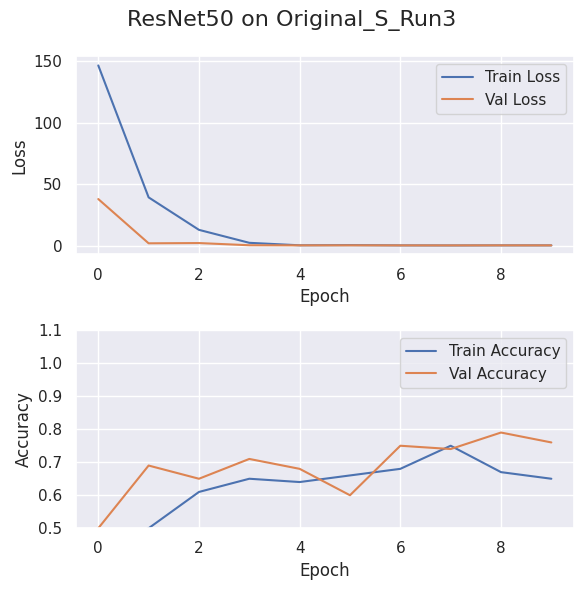

101/101 [==============================] - 14s 128ms/step
{'Test Loss': 0.4962, 'Test Accuracy': 0.8826, 'F1 Score': 0.88, 'Sensitivity (Recall)': 0.88, 'Precision': 0.89}


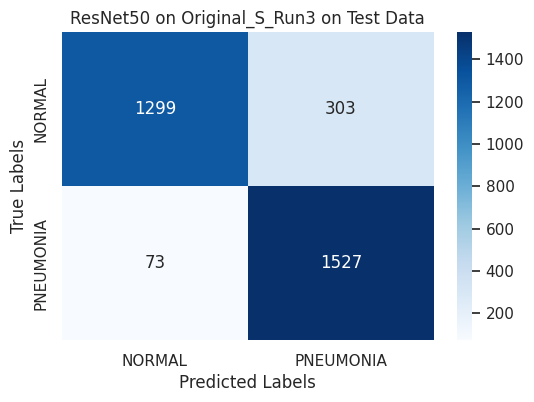

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
10/10 [==============================] - 6s 314ms/step - loss: 73.2476 - accuracy: 0.5250 - val_loss: 38.7593 - val_accuracy: 0.5000
Epoch 2/10
10/10 [==============================] - 2s 205ms/step - loss: 22.7767 - accuracy: 0.5437 - val_loss: 7.4959 - val_accuracy: 0.5000
Epoch 3/10
10/10 [==============================] - 2s 209ms/step - loss: 7.3776 - accuracy: 0.5813 - val_loss: 1.3422 - val_accuracy: 0.7000
Epoch 4/10
10/10 [==============================] - 2s 205ms/step - loss: 1.7805 - accuracy: 0.6531 - val_loss: 0.7124 - val_accuracy: 0.6750
Epoch 5/10
10/10 [==============================] - 2s 212ms/step - loss: 0.6908 - accuracy: 0.7625 - val_loss: 0.5773 - val_accuracy: 0.7125
Epoch 6/10
10/10 [==============================] - 2s 204ms/step - loss: 0.4804 - accuracy: 0.7719 - val_loss: 0.5337 - val_accuracy: 0.7500
Epoch 7/10
10/10 [==============================] - 2s 209ms/step - loss: 0.4552 - accuracy: 0.7781 - val_

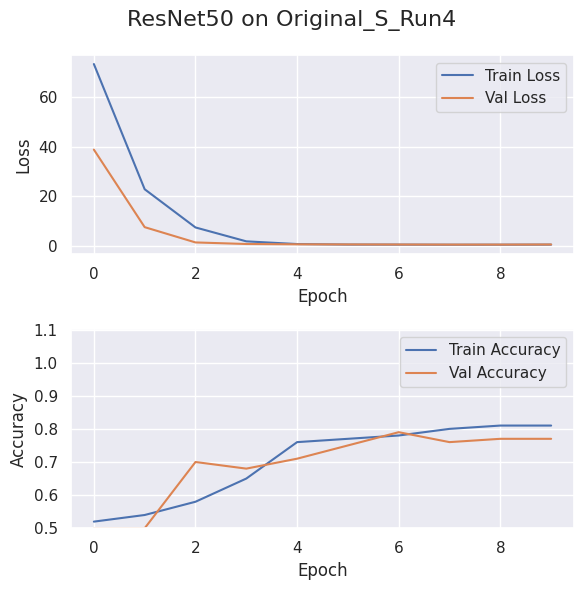

101/101 [==============================] - 14s 127ms/step
{'Test Loss': 0.3786, 'Test Accuracy': 0.8395, 'F1 Score': 0.84, 'Sensitivity (Recall)': 0.84, 'Precision': 0.88}


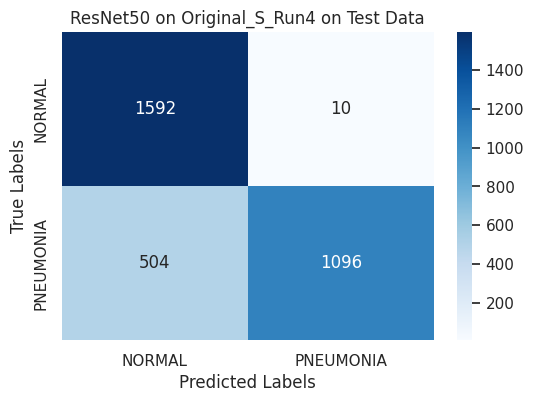

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
10/10 [==============================] - 6s 317ms/step - loss: 123.4511 - accuracy: 0.5156 - val_loss: 73.5215 - val_accuracy: 0.5000
Epoch 2/10
10/10 [==============================] - 2s 207ms/step - loss: 33.5230 - accuracy: 0.5344 - val_loss: 3.6997 - val_accuracy: 0.7250
Epoch 3/10
10/10 [==============================] - 2s 209ms/step - loss: 14.4245 - accuracy: 0.6094 - val_loss: 4.8126 - val_accuracy: 0.6750
Epoch 4/10
10/10 [==============================] - 2s 217ms/step - loss: 5.2926 - accuracy: 0.6812 - val_loss: 1.7375 - val_accuracy: 0.7500
Epoch 5/10
10/10 [==============================] - 2s 210ms/step - loss: 1.3031 - accuracy: 0.7594 - val_loss: 0.8123 - val_accuracy: 0.7375
Epoch 6/10
10/10 [==============================] - 2s 209ms/step - loss: 0.5449 - accuracy: 0.7656 - val_loss: 0.5532 - val_accuracy: 0.7375
Epoch 7/10
10/10 [==============================] - 2s 213ms/step - loss: 0.5280 - accuracy: 0.7937 - va

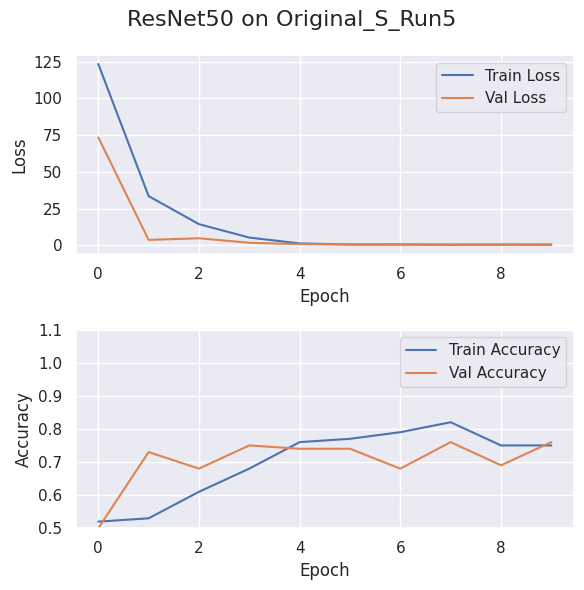

101/101 [==============================] - 14s 129ms/step
{'Test Loss': 0.3543, 'Test Accuracy': 0.8835, 'F1 Score': 0.88, 'Sensitivity (Recall)': 0.88, 'Precision': 0.89}


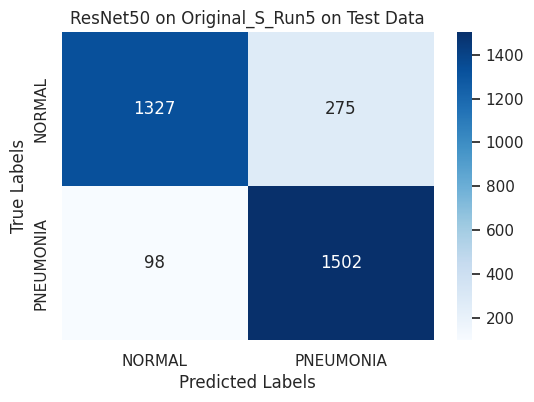

In [9]:
title = "ResNet50 on Original_S"
file_name = "Trained_Models/ResNet50_training_history_plot_original_S.png"

for i in range(0, n):
    trained_model, test_metrics, confusion_matrix = cv_train_and_evaluate_model(
        dataset_dir_org, 
        test_dataset_dir, 
        class_labels,  
        resnet_model,
        weights=None,
        input_shape=input_shape, 
        title=f"{title}_Run{i+1}", 
        file_name=file_name,  # Now treated as a keyword argument
        cv=cv, 
        epochs=epochs, 
        batch_size=batch_size
    )

#### Train on Mixed DDPM Dataset


Class labels:  ['NORMAL', 'PNEUMONIA']


2024-09-11 11:01:24.952870: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Epoch 1/10
110/110 [==============================] - 41s 325ms/step - loss: 36.3093 - accuracy: 0.5227 - val_loss: 0.6932 - val_accuracy: 0.4989
Epoch 2/10
110/110 [==============================] - 35s 319ms/step - loss: 0.8063 - accuracy: 0.4969 - val_loss: 0.6932 - val_accuracy: 0.5011
Epoch 3/10
110/110 [==============================] - 34s 311ms/step - loss: 0.8152 - accuracy: 0.4972 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/10
110/110 [==============================] - 35s 320ms/step - loss: 1.0286 - accuracy: 0.4977 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/10
110/110 [==============================] - 35s 319ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/10
110/110 [==============================] - 35s 318ms/step - loss: 0.6933 - accuracy: 0.4875 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/10
110/110 [==============================] - 35s 320ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_a

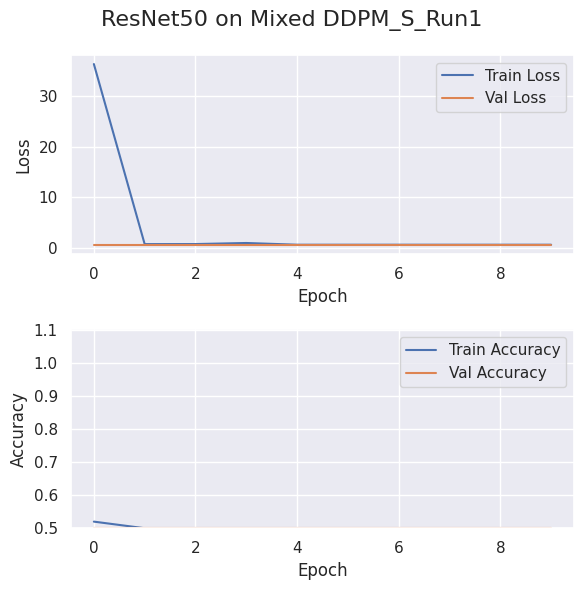

101/101 [==============================] - 25s 229ms/step
{'Test Loss': 0.6931, 'Test Accuracy': 0.5006, 'F1 Score': 0.33, 'Sensitivity (Recall)': 0.5, 'Precision': 0.75}


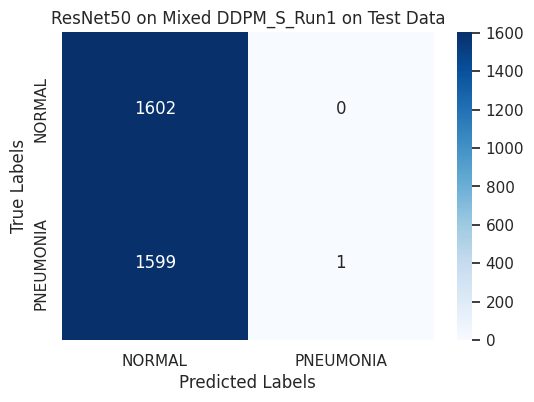

Class labels:  ['NORMAL', 'PNEUMONIA']


In [ ]:
title = "ResNet50 on Mixed DDPM_S" 
file_name = "Trained_Models/ResNet50_training_history_plot_Mixed_DDPM_S.png"

for i in range(0, n):
    trained_model, test_metrics, confusion_matrix = cv_train_and_evaluate_model(
        dataset_dir_ddpm, 
        test_dataset_dir, 
        class_labels,  
        resnet_model,
        weights=None,
        input_shape=input_shape,
        title=f"{title}_Run{i+1}", 
        file_name=file_name,  # Now treated as a keyword argument
        cv=cv, 
        epochs=epochs, 
        batch_size=batch_size
    )
    
# for i in range(0, n):
#     trained_model, test_metrics, confusion_matrix = imbalanced_cv_train_and_evaluate_model(
#         dataset_dir_ddpm, 
#         test_dataset_dir, 
#         test_dataset_dir,
#         test_dataset_dir,
#         class_labels,  
#         resnet_model,
#         weights=None,
#         input_shape=input_shape,
#         title=f"{title}_Run{i+1}", 
#         file_name=file_name,  # Now treated as a keyword argument
#         cv=cv, 
#         epochs=epochs, 
#         batch_size=batch_size
#     )

#### Train on Mixed PGGANs150k Dataset

In [ ]:
title = "ResNet50 on Mixed PGGANs150k_S" 
file_name = "Trained_Models/ResNet50_training_history_plot_Mixed_PGGANs150k_S.png"
  
for i in range(0, n):
    trained_model, test_metrics, confusion_matrix = cv_train_and_evaluate_model(
        dataset_dir_pggans150, 
        test_dataset_dir, 
        class_labels,  
        resnet_model,
        weights=None,
        input_shape=input_shape,
        title=f"{title}_Run{i+1}", 
        file_name=file_name,  # Now treated as a keyword argument
        cv=cv, 
        epochs=epochs, 
        batch_size=batch_size
    )

#### Train on Mixed PGGANs160k Dataset

In [ ]:

title = "ResNet50 on Mixed PGGANs160k_S" 
file_name = "Trained_Models/ResNet50_training_history_plot_Mixed_PGGANs160k_S.png"
  
for i in range(0, n):
    trained_model, test_metrics, confusion_matrix = cv_train_and_evaluate_model(
        dataset_dir_pggans160, 
        test_dataset_dir, 
        class_labels,  
        resnet_model,
        weights=None,
        input_shape=input_shape,
        title=f"{title}_Run{i+1}", 
        file_name=file_name,  # Now treated as a keyword argument
        cv=cv, 
        epochs=epochs, 
        batch_size=batch_size
    )


# Train On Random Images

In [5]:
dataset_dir_org_rand = f'{path_dir}/Balanced_Data/Random_Images/Original_Random'
dataset_dir_ddpm_rand = f'{path_dir}/Balanced_Data/Random_Images/Mixed/DDPM_Mixed'
dataset_dir_pggans150_rand = f'{path_dir}/Balanced_Data/Random_Images/Mixed/PGGANS150_Mixed'
dataset_dir_pggans160_rand = f'{path_dir}/Balanced_Data/Random_Images/Mixed/PGGANS160_Mixed'
test_dataset_dir_rand = f'{path_dir}/Balanced_Data/Random_Images/Test_random'


class_labels = sorted(os.listdir(dataset_dir_org_rand))
print('class_labels: ', class_labels)
num_classes = 2
input_shape=(128, 128, 3)

cv=1
epochs=10
batch_size=32
n = 5 # number of different runs

class_labels:  ['NORMAL', 'PNEUMONIA']


In [10]:
# import os
# import random
# import shutil

# folder_N = f'{path_dir}/Imbalanced_Data/Random_images/imbalanced_test/NORMAL'
# folder_P = f'{path_dir}/Imbalanced_Data/Random_images/imbalanced_test/PNEUMONIA'
# output_folder = f'{path_dir}/Imbalanced_Data/Random_images/Test'
# num_images_N = 300
# num_images_P = 100
# num_datasets = 3

# images_N = os.listdir(folder_N)
# selected_images_N = random.sample(images_N, num_images_N)

# images_P = os.listdir(folder_P)

# for i in range(1, num_datasets + 1):
#     # Draw 100 random images from folder B
#     selected_images_P = random.sample(images_P, num_images_P)
    
#     # Create a subfolder for each dataset
#     dataset_folder = os.path.join(output_folder, f'dataset_{i}')
#     os.makedirs(dataset_folder, exist_ok=True)
    
#     # Create subfolders A and B within the dataset folder
#     dataset_folder_A = os.path.join(dataset_folder, 'NORMAL')
#     dataset_folder_B = os.path.join(dataset_folder, 'PNEUMONIA')
#     os.makedirs(dataset_folder_A, exist_ok=True)
#     os.makedirs(dataset_folder_B, exist_ok=True)
    
#     # Copy all images from folder A to the dataset's folder A
#     for image in images_N:
#         source = os.path.join(folder_N, image)
#         destination = os.path.join(dataset_folder_A, image)
#         shutil.copy(source, destination)
    
#     # Copy selected images from folder B to the dataset's folder B
#     for image in selected_images_P:
#         source = os.path.join(folder_P, image)
#         destination = os.path.join(dataset_folder_B, image)
#         shutil.copy(source, destination)

#     print(f'Dataset {i}: {len(selected_images_N)} images from folder A and {len(selected_images_P)} images from folder B copied to {dataset_folder}')




## VGG16

### cv=1

#### Train on Original Dataset


Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
10/10 [==============================] - 4s 325ms/step - loss: 2.0909 - accuracy: 0.4938 - val_loss: 1.1549 - val_accuracy: 0.5000
Epoch 2/10
10/10 [==============================] - 3s 297ms/step - loss: 0.8786 - accuracy: 0.5844 - val_loss: 0.9243 - val_accuracy: 0.5000
Epoch 3/10
10/10 [==============================] - 3s 300ms/step - loss: 0.9034 - accuracy: 0.5312 - val_loss: 0.6579 - val_accuracy: 0.5125
Epoch 4/10
10/10 [==============================] - 3s 298ms/step - loss: 0.6807 - accuracy: 0.5813 - val_loss: 0.6331 - val_accuracy: 0.7375
Epoch 5/10
10/10 [==============================] - 3s 297ms/step - loss: 0.6391 - accuracy: 0.6406 - val_loss: 0.6170 - val_accuracy: 0.5375
Epoch 6/10
10/10 [==============================] - 3s 296ms/step - loss: 0.6282 - accuracy: 0.6531 - val_loss: 0.6011 - val_accuracy: 0.9125
Epoch 7/10
10/10 [==============================] - 3s 296ms/step - loss: 0.6114 - accuracy: 0.6906 - val_los

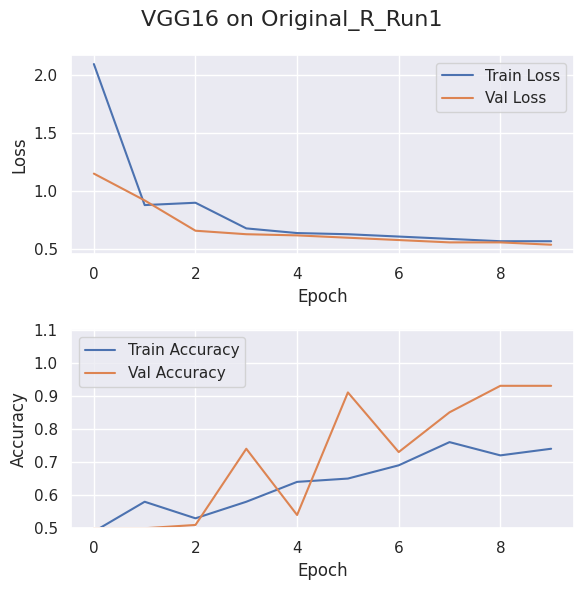

100/100 [==============================] - 22s 221ms/step
{'Test Loss': 0.5612, 'Test Accuracy': 0.8624, 'F1 Score': 0.86, 'Sensitivity (Recall)': 0.86, 'Precision': 0.86}


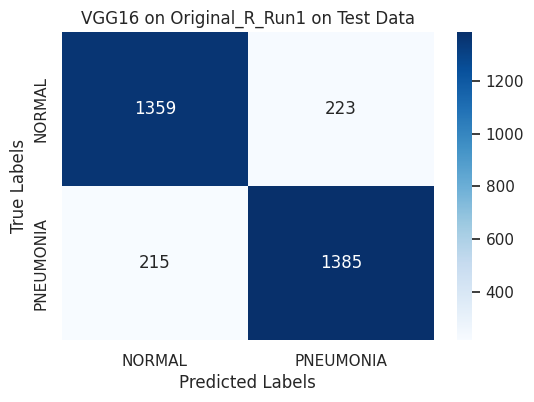

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
10/10 [==============================] - 4s 328ms/step - loss: 2.2142 - accuracy: 0.4625 - val_loss: 0.6783 - val_accuracy: 0.5000
Epoch 2/10
10/10 [==============================] - 3s 299ms/step - loss: 0.8734 - accuracy: 0.4844 - val_loss: 0.6724 - val_accuracy: 0.7625
Epoch 3/10
10/10 [==============================] - 3s 304ms/step - loss: 0.7128 - accuracy: 0.5437 - val_loss: 0.6675 - val_accuracy: 0.7875
Epoch 4/10
10/10 [==============================] - 3s 298ms/step - loss: 0.6936 - accuracy: 0.5656 - val_loss: 0.6614 - val_accuracy: 0.5125
Epoch 5/10
10/10 [==============================] - 3s 299ms/step - loss: 0.6715 - accuracy: 0.5500 - val_loss: 0.6548 - val_accuracy: 0.6125
Epoch 6/10
10/10 [==============================] - 3s 295ms/step - loss: 0.6550 - accuracy: 0.6406 - val_loss: 0.6408 - val_accuracy: 0.7250
Epoch 7/10
10/10 [==============================] - 3s 299ms/step - loss: 0.6412 - accuracy: 0.6656 - val_los

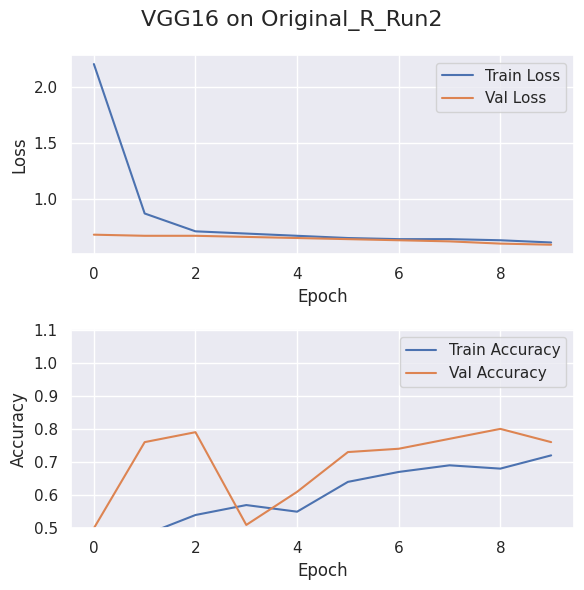

100/100 [==============================] - 22s 220ms/step
{'Test Loss': 0.5805, 'Test Accuracy': 0.7964, 'F1 Score': 0.8, 'Sensitivity (Recall)': 0.8, 'Precision': 0.8}


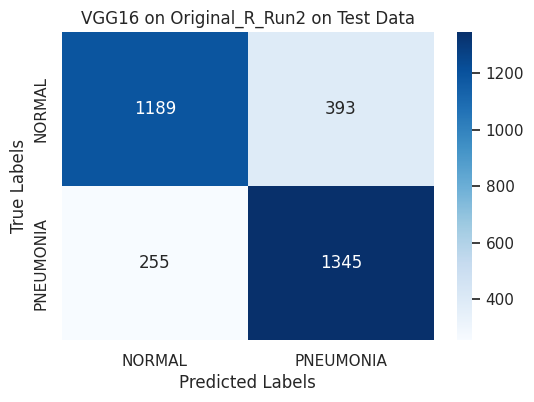

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
10/10 [==============================] - 4s 326ms/step - loss: 1.4587 - accuracy: 0.5406 - val_loss: 0.7392 - val_accuracy: 0.5000
Epoch 2/10
10/10 [==============================] - 3s 297ms/step - loss: 0.8167 - accuracy: 0.5344 - val_loss: 0.7767 - val_accuracy: 0.5000
Epoch 3/10
10/10 [==============================] - 3s 300ms/step - loss: 0.7794 - accuracy: 0.5344 - val_loss: 0.7076 - val_accuracy: 0.5000
Epoch 4/10
10/10 [==============================] - 3s 293ms/step - loss: 0.6703 - accuracy: 0.5938 - val_loss: 0.6394 - val_accuracy: 0.5000
Epoch 5/10
10/10 [==============================] - 3s 296ms/step - loss: 0.6488 - accuracy: 0.6531 - val_loss: 0.6285 - val_accuracy: 0.8750
Epoch 6/10
10/10 [==============================] - 3s 294ms/step - loss: 0.6260 - accuracy: 0.7031 - val_loss: 0.6061 - val_accuracy: 0.6875
Epoch 7/10
10/10 [==============================] - 3s 296ms/step - loss: 0.6142 - accuracy: 0.6938 - val_los

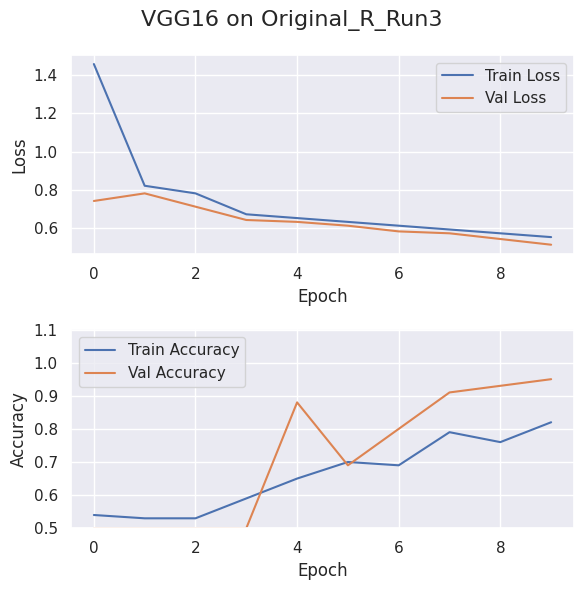

100/100 [==============================] - 22s 220ms/step
{'Test Loss': 0.5401, 'Test Accuracy': 0.8938, 'F1 Score': 0.89, 'Sensitivity (Recall)': 0.89, 'Precision': 0.89}


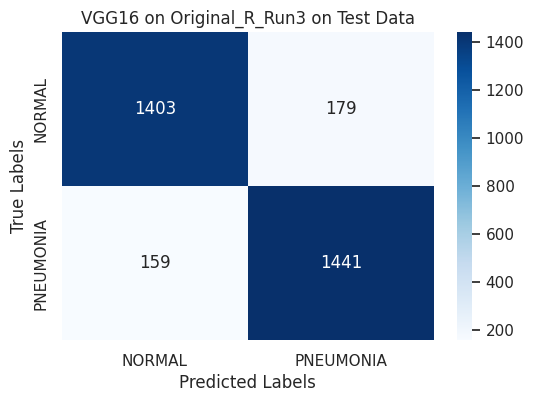

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
10/10 [==============================] - 4s 320ms/step - loss: 1.6062 - accuracy: 0.5063 - val_loss: 0.7032 - val_accuracy: 0.5000
Epoch 2/10
10/10 [==============================] - 3s 298ms/step - loss: 0.8461 - accuracy: 0.4812 - val_loss: 0.6780 - val_accuracy: 0.5000
Epoch 3/10
10/10 [==============================] - 3s 293ms/step - loss: 0.7415 - accuracy: 0.5125 - val_loss: 0.6670 - val_accuracy: 0.5000
Epoch 4/10
10/10 [==============================] - 3s 302ms/step - loss: 0.6815 - accuracy: 0.5500 - val_loss: 0.6793 - val_accuracy: 0.5000
Epoch 5/10
10/10 [==============================] - 3s 295ms/step - loss: 0.6671 - accuracy: 0.6250 - val_loss: 0.6596 - val_accuracy: 0.6000
Epoch 6/10
10/10 [==============================] - 3s 294ms/step - loss: 0.6559 - accuracy: 0.6531 - val_loss: 0.6499 - val_accuracy: 0.6625
Epoch 7/10
10/10 [==============================] - 3s 297ms/step - loss: 0.6470 - accuracy: 0.6375 - val_los

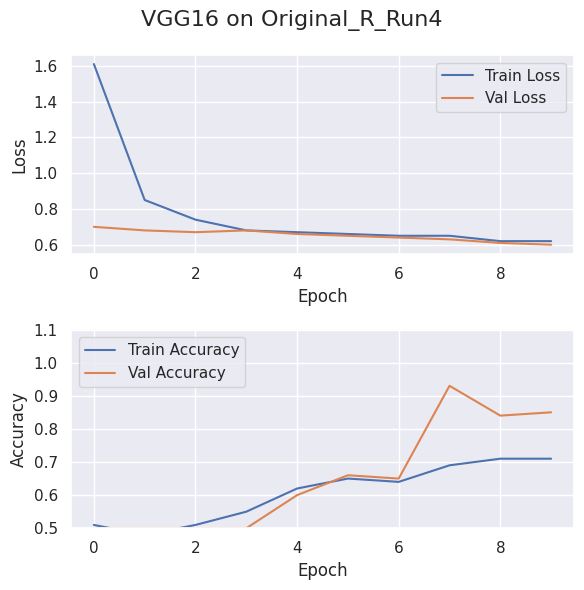

100/100 [==============================] - 22s 222ms/step
{'Test Loss': 0.6057, 'Test Accuracy': 0.8413, 'F1 Score': 0.84, 'Sensitivity (Recall)': 0.84, 'Precision': 0.86}


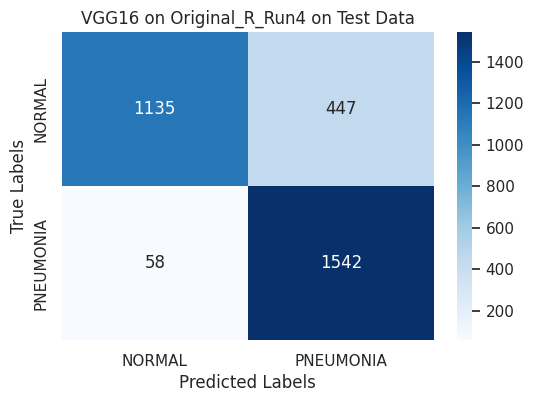

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
10/10 [==============================] - 4s 319ms/step - loss: 1.5460 - accuracy: 0.4812 - val_loss: 0.6790 - val_accuracy: 0.8875
Epoch 2/10
10/10 [==============================] - 3s 297ms/step - loss: 0.8451 - accuracy: 0.5188 - val_loss: 0.7509 - val_accuracy: 0.5000
Epoch 3/10
10/10 [==============================] - 3s 294ms/step - loss: 0.7134 - accuracy: 0.5688 - val_loss: 0.6726 - val_accuracy: 0.5000
Epoch 4/10
10/10 [==============================] - 3s 296ms/step - loss: 0.6715 - accuracy: 0.5813 - val_loss: 0.6448 - val_accuracy: 0.6375
Epoch 5/10
10/10 [==============================] - 3s 299ms/step - loss: 0.6426 - accuracy: 0.6531 - val_loss: 0.6377 - val_accuracy: 0.8250
Epoch 6/10
10/10 [==============================] - 3s 296ms/step - loss: 0.6492 - accuracy: 0.6594 - val_loss: 0.6180 - val_accuracy: 0.7375
Epoch 7/10
10/10 [==============================] - 3s 297ms/step - loss: 0.6114 - accuracy: 0.7000 - val_los

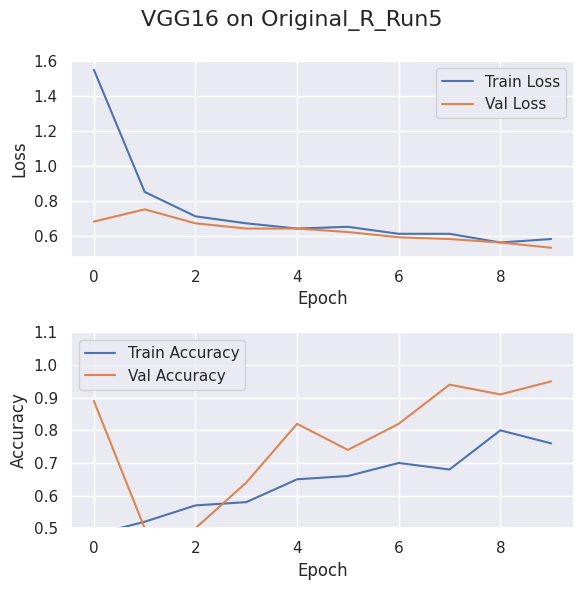

100/100 [==============================] - 22s 221ms/step
{'Test Loss': 0.548, 'Test Accuracy': 0.885, 'F1 Score': 0.88, 'Sensitivity (Recall)': 0.88, 'Precision': 0.89}


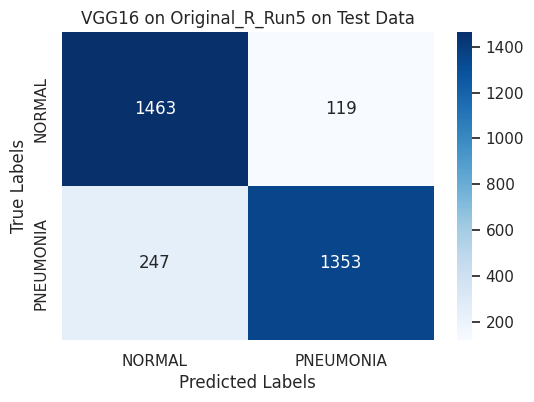

In [11]:
title = "VGG16 on Original_R" 
file_name = "Trained_Models/training_history_plot_original_R.png"

for i in range(0, n):
    trained_model, test_metrics, confusion_matrix = cv_train_and_evaluate_model(
        dataset_dir_org_rand, 
        test_dataset_dir_rand, 
        class_labels,  
        vgg_model, 
        weights=None,
        input_shape=input_shape, 
        title=f"{title}_Run{i+1}", 
        file_name=file_name,  # Now treated as a keyword argument
        cv=cv, 
        epochs=epochs, 
        batch_size=batch_size
    )


#### Train on Mixed DDPM Dataset


Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
108/108 [==============================] - 32s 288ms/step - loss: 0.6709 - accuracy: 0.7105 - val_loss: 0.3236 - val_accuracy: 0.9163
Epoch 2/10
108/108 [==============================] - 31s 287ms/step - loss: 0.3347 - accuracy: 0.8756 - val_loss: 0.2500 - val_accuracy: 0.9221
Epoch 3/10
108/108 [==============================] - 31s 287ms/step - loss: 0.2586 - accuracy: 0.9081 - val_loss: 0.1972 - val_accuracy: 0.9395
Epoch 4/10
108/108 [==============================] - 31s 288ms/step - loss: 0.2227 - accuracy: 0.9209 - val_loss: 0.1621 - val_accuracy: 0.9570
Epoch 5/10
108/108 [==============================] - 31s 288ms/step - loss: 0.1689 - accuracy: 0.9448 - val_loss: 0.1302 - val_accuracy: 0.9674
Epoch 6/10
108/108 [==============================] - 31s 287ms/step - loss: 0.1423 - accuracy: 0.9564 - val_loss: 0.1126 - val_accuracy: 0.9698
Epoch 7/10
108/108 [==============================] - 31s 288ms/step - loss: 0.1709 - accur

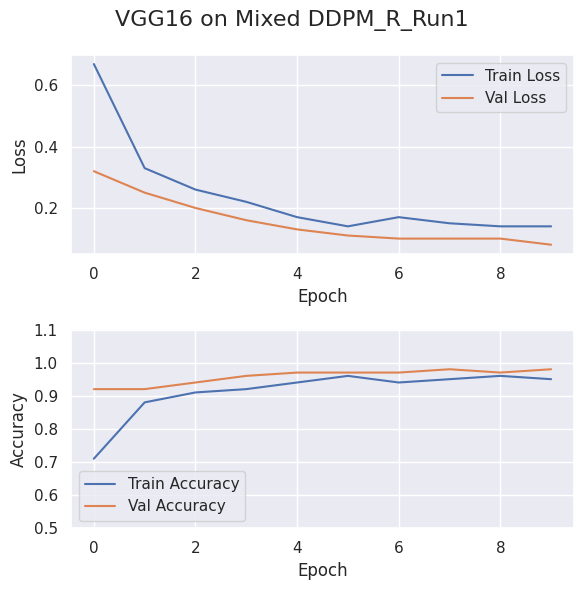

100/100 [==============================] - 22s 222ms/step
{'Test Loss': 0.1984, 'Test Accuracy': 0.9239, 'F1 Score': 0.92, 'Sensitivity (Recall)': 0.92, 'Precision': 0.93}


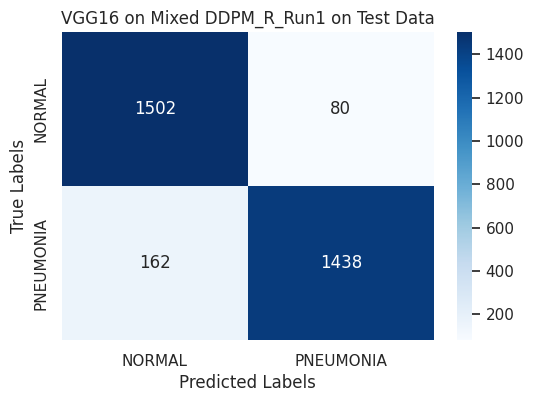

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
108/108 [==============================] - 32s 289ms/step - loss: 0.6052 - accuracy: 0.7172 - val_loss: 0.3478 - val_accuracy: 0.8977
Epoch 2/10
108/108 [==============================] - 31s 287ms/step - loss: 0.3156 - accuracy: 0.8779 - val_loss: 0.2054 - val_accuracy: 0.9488
Epoch 3/10
108/108 [==============================] - 31s 288ms/step - loss: 0.2640 - accuracy: 0.8991 - val_loss: 0.1768 - val_accuracy: 0.9547
Epoch 4/10
108/108 [==============================] - 31s 289ms/step - loss: 0.2138 - accuracy: 0.9241 - val_loss: 0.1364 - val_accuracy: 0.9628
Epoch 5/10
108/108 [==============================] - 31s 289ms/step - loss: 0.1636 - accuracy: 0.9448 - val_loss: 0.1168 - val_accuracy: 0.9674
Epoch 6/10
108/108 [==============================] - 31s 291ms/step - loss: 0.1410 - accuracy: 0.9544 - val_loss: 0.1014 - val_accuracy: 0.9686
Epoch 7/10
108/108 [==============================] - 31s 289ms/step - loss: 0.1502 - accur

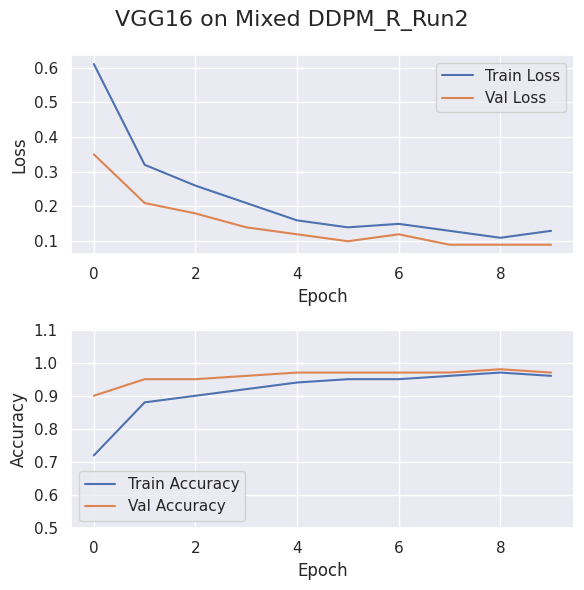

100/100 [==============================] - 23s 224ms/step
{'Test Loss': 0.1981, 'Test Accuracy': 0.9277, 'F1 Score': 0.93, 'Sensitivity (Recall)': 0.93, 'Precision': 0.93}


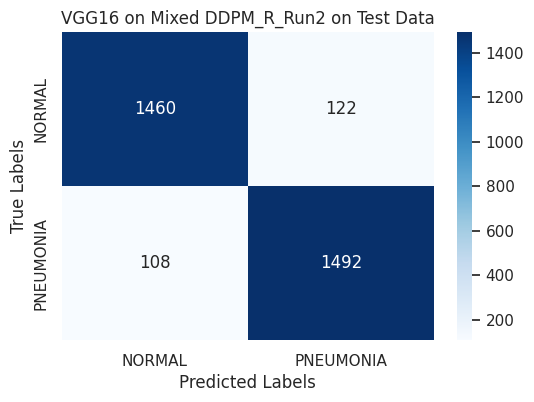

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
108/108 [==============================] - 32s 289ms/step - loss: 0.6762 - accuracy: 0.6561 - val_loss: 0.4737 - val_accuracy: 0.8605
Epoch 2/10
108/108 [==============================] - 31s 289ms/step - loss: 0.4150 - accuracy: 0.8366 - val_loss: 0.3264 - val_accuracy: 0.8849
Epoch 3/10
108/108 [==============================] - 31s 289ms/step - loss: 0.3201 - accuracy: 0.8791 - val_loss: 0.2640 - val_accuracy: 0.9221
Epoch 4/10
108/108 [==============================] - 31s 288ms/step - loss: 0.2692 - accuracy: 0.9017 - val_loss: 0.2026 - val_accuracy: 0.9349
Epoch 5/10
108/108 [==============================] - 31s 287ms/step - loss: 0.2353 - accuracy: 0.9128 - val_loss: 0.1620 - val_accuracy: 0.9593
Epoch 6/10
108/108 [==============================] - 31s 288ms/step - loss: 0.1928 - accuracy: 0.9297 - val_loss: 0.1577 - val_accuracy: 0.9581
Epoch 7/10
108/108 [==============================] - 31s 287ms/step - loss: 0.1881 - accur

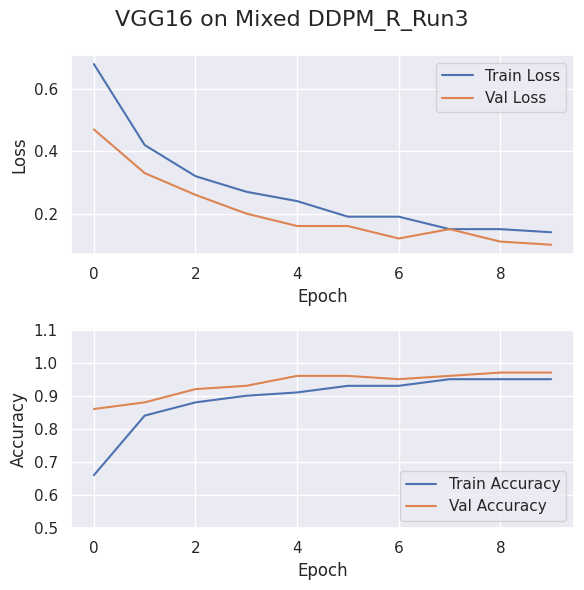

100/100 [==============================] - 22s 222ms/step
{'Test Loss': 0.2128, 'Test Accuracy': 0.9167, 'F1 Score': 0.92, 'Sensitivity (Recall)': 0.92, 'Precision': 0.92}


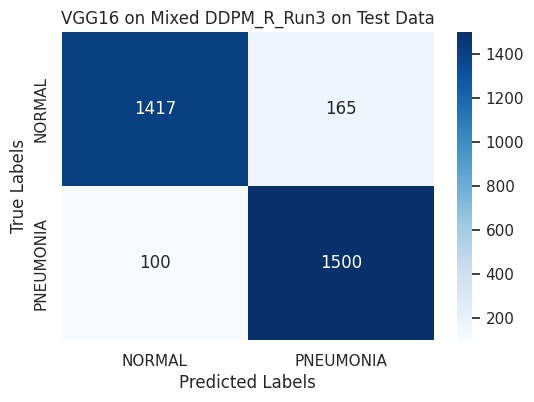

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
108/108 [==============================] - 32s 291ms/step - loss: 0.6081 - accuracy: 0.7081 - val_loss: 0.3511 - val_accuracy: 0.9081
Epoch 2/10
108/108 [==============================] - 31s 289ms/step - loss: 0.3468 - accuracy: 0.8602 - val_loss: 0.2073 - val_accuracy: 0.9430
Epoch 3/10
108/108 [==============================] - 31s 290ms/step - loss: 0.2530 - accuracy: 0.9067 - val_loss: 0.1870 - val_accuracy: 0.9453
Epoch 4/10
108/108 [==============================] - 31s 290ms/step - loss: 0.1996 - accuracy: 0.9311 - val_loss: 0.1356 - val_accuracy: 0.9663
Epoch 5/10
108/108 [==============================] - 31s 290ms/step - loss: 0.1609 - accuracy: 0.9401 - val_loss: 0.1701 - val_accuracy: 0.9453
Epoch 6/10
108/108 [==============================] - 31s 290ms/step - loss: 0.1547 - accuracy: 0.9512 - val_loss: 0.1773 - val_accuracy: 0.9349
Epoch 7/10
108/108 [==============================] - 31s 289ms/step - loss: 0.1378 - accur

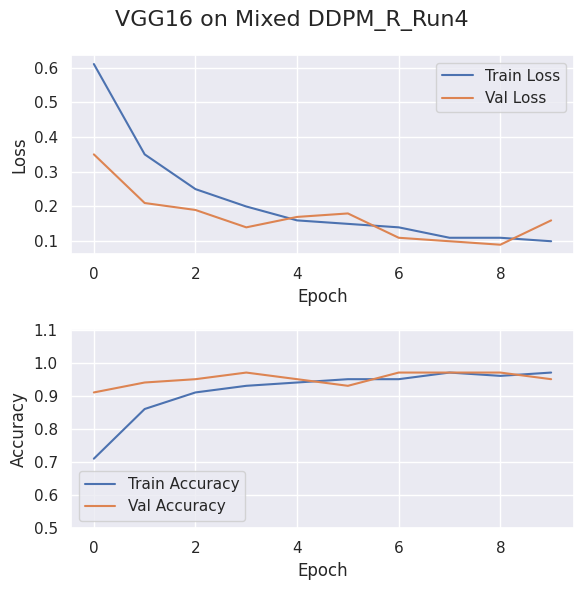

100/100 [==============================] - 23s 224ms/step
{'Test Loss': 0.3134, 'Test Accuracy': 0.885, 'F1 Score': 0.88, 'Sensitivity (Recall)': 0.88, 'Precision': 0.9}


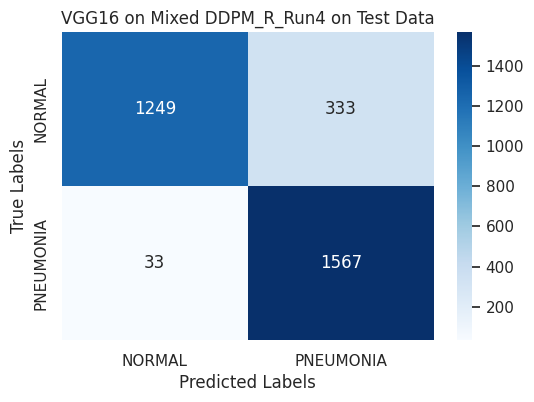

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
108/108 [==============================] - 32s 288ms/step - loss: 0.6966 - accuracy: 0.6858 - val_loss: 0.4016 - val_accuracy: 0.8523
Epoch 2/10
108/108 [==============================] - 31s 290ms/step - loss: 0.3696 - accuracy: 0.8578 - val_loss: 0.2334 - val_accuracy: 0.9407
Epoch 3/10
108/108 [==============================] - 31s 291ms/step - loss: 0.2538 - accuracy: 0.9160 - val_loss: 0.2226 - val_accuracy: 0.9337
Epoch 4/10
108/108 [==============================] - 31s 290ms/step - loss: 0.2018 - accuracy: 0.9326 - val_loss: 0.1270 - val_accuracy: 0.9674
Epoch 5/10
108/108 [==============================] - 31s 290ms/step - loss: 0.1828 - accuracy: 0.9355 - val_loss: 0.1114 - val_accuracy: 0.9709
Epoch 6/10
108/108 [==============================] - 31s 290ms/step - loss: 0.1281 - accuracy: 0.9605 - val_loss: 0.0939 - val_accuracy: 0.9733
Epoch 7/10
108/108 [==============================] - 31s 291ms/step - loss: 0.1322 - accur

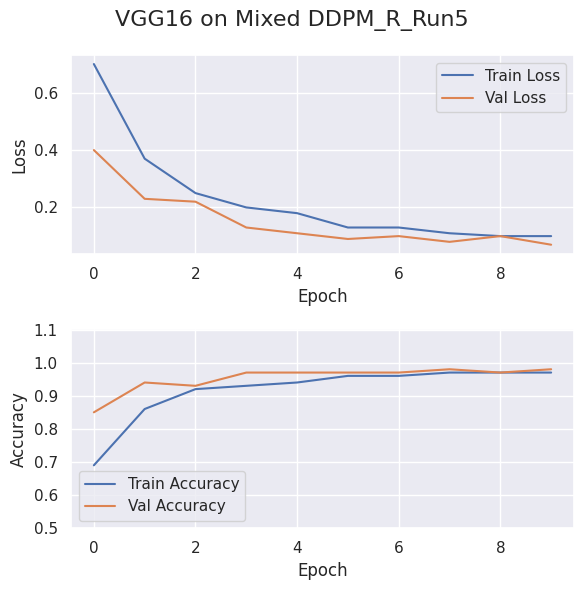

100/100 [==============================] - 22s 221ms/step
{'Test Loss': 0.2093, 'Test Accuracy': 0.9258, 'F1 Score': 0.93, 'Sensitivity (Recall)': 0.93, 'Precision': 0.93}


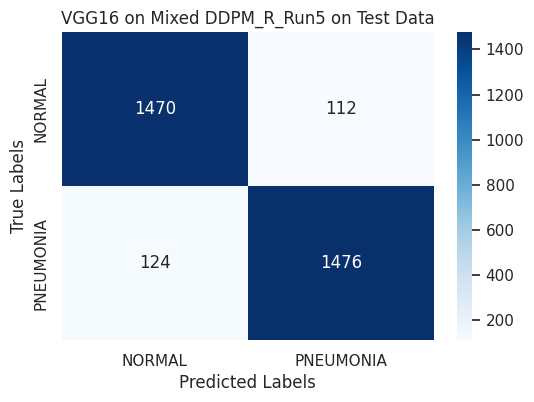

In [12]:
title = "VGG16 on Mixed DDPM_R" 
file_name = "Trained_Models/training_history_plot_Mixed_DDPM_R.png"

for i in range(0, n):
    trained_model, test_metrics, confusion_matrix = cv_train_and_evaluate_model(
        dataset_dir_ddpm_rand, 
        test_dataset_dir_rand, 
        class_labels,  
        vgg_model, 
        weights=None,
        input_shape=input_shape,
        title=f"{title}_Run{i+1}", 
        file_name=file_name,  # Now treated as a keyword argument
        cv=cv, 
        epochs=epochs, 
        batch_size=batch_size
    )

#### Train on Mixed PGGANs150k Dataset

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
110/110 [==============================] - 32s 288ms/step - loss: 0.6462 - accuracy: 0.7071 - val_loss: 0.4279 - val_accuracy: 0.8795
Epoch 2/10
110/110 [==============================] - 32s 288ms/step - loss: 0.4043 - accuracy: 0.8483 - val_loss: 0.3372 - val_accuracy: 0.8545
Epoch 3/10
110/110 [==============================] - 32s 289ms/step - loss: 0.3169 - accuracy: 0.8830 - val_loss: 0.2555 - val_accuracy: 0.9045
Epoch 4/10
110/110 [==============================] - 32s 288ms/step - loss: 0.2573 - accuracy: 0.9099 - val_loss: 0.1992 - val_accuracy: 0.9364
Epoch 5/10
110/110 [==============================] - 32s 289ms/step - loss: 0.2205 - accuracy: 0.9207 - val_loss: 0.1993 - val_accuracy: 0.9250
Epoch 6/10
110/110 [==============================] - 32s 288ms/step - loss: 0.2136 - accuracy: 0.9205 - val_loss: 0.1619 - val_accuracy: 0.9375
Epoch 7/10
110/110 [==============================] - 32s 288ms/step - loss: 0.1816 - accur

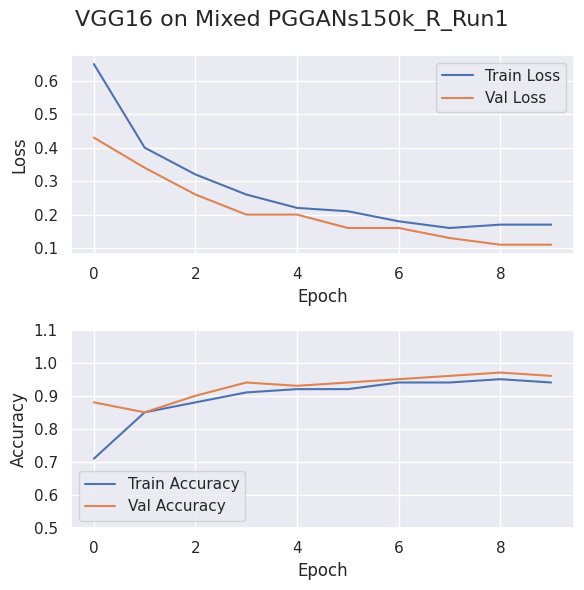

100/100 [==============================] - 22s 222ms/step
{'Test Loss': 0.3289, 'Test Accuracy': 0.8843, 'F1 Score': 0.88, 'Sensitivity (Recall)': 0.88, 'Precision': 0.9}


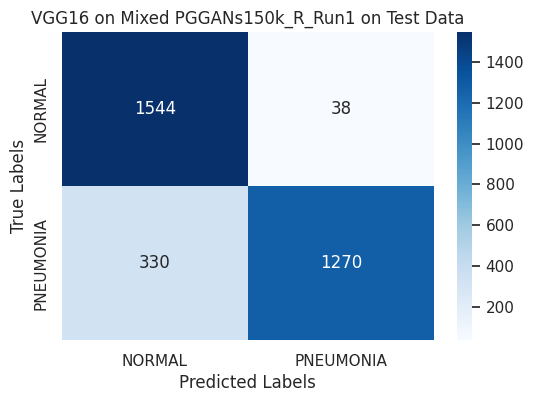

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
110/110 [==============================] - 32s 289ms/step - loss: 0.5624 - accuracy: 0.7403 - val_loss: 0.3533 - val_accuracy: 0.8909
Epoch 2/10
110/110 [==============================] - 32s 290ms/step - loss: 0.3402 - accuracy: 0.8716 - val_loss: 0.2990 - val_accuracy: 0.8761
Epoch 3/10
110/110 [==============================] - 32s 288ms/step - loss: 0.2576 - accuracy: 0.9111 - val_loss: 0.2608 - val_accuracy: 0.8977
Epoch 4/10
110/110 [==============================] - 32s 289ms/step - loss: 0.2132 - accuracy: 0.9259 - val_loss: 0.1464 - val_accuracy: 0.9523
Epoch 5/10
110/110 [==============================] - 32s 288ms/step - loss: 0.1687 - accuracy: 0.9406 - val_loss: 0.1425 - val_accuracy: 0.9455
Epoch 6/10
110/110 [==============================] - 32s 290ms/step - loss: 0.1753 - accuracy: 0.9409 - val_loss: 0.1305 - val_accuracy: 0.9455
Epoch 7/10
110/110 [==============================] - 32s 289ms/step - loss: 0.1500 - accur

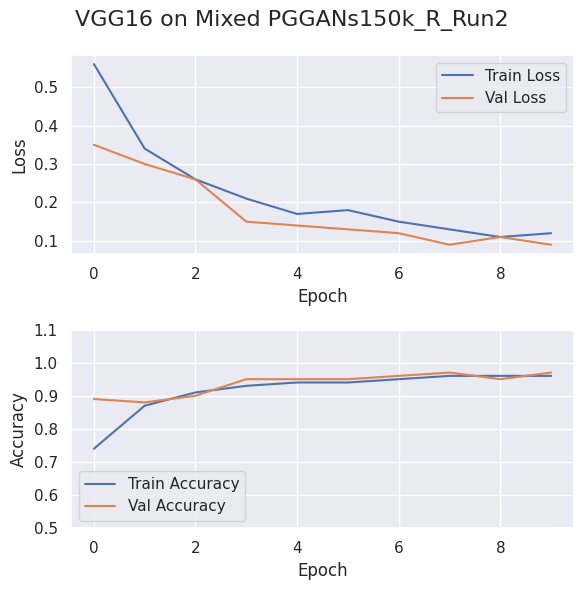

100/100 [==============================] - 23s 224ms/step
{'Test Loss': 0.3782, 'Test Accuracy': 0.852, 'F1 Score': 0.85, 'Sensitivity (Recall)': 0.85, 'Precision': 0.88}


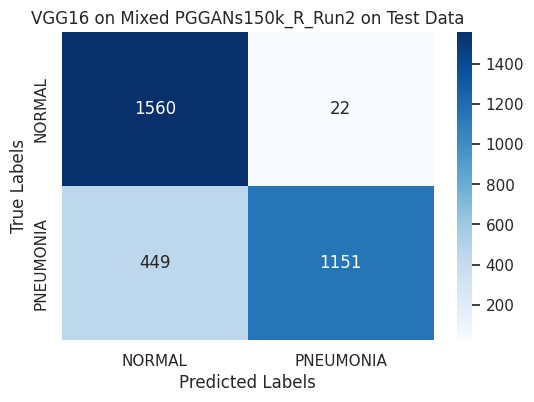

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
110/110 [==============================] - 33s 292ms/step - loss: 0.5299 - accuracy: 0.7705 - val_loss: 0.3329 - val_accuracy: 0.8659
Epoch 2/10
110/110 [==============================] - 32s 288ms/step - loss: 0.3494 - accuracy: 0.8582 - val_loss: 0.2451 - val_accuracy: 0.9148
Epoch 3/10
110/110 [==============================] - 31s 286ms/step - loss: 0.2751 - accuracy: 0.8966 - val_loss: 0.2290 - val_accuracy: 0.9182
Epoch 4/10
110/110 [==============================] - 31s 287ms/step - loss: 0.2364 - accuracy: 0.9062 - val_loss: 0.1686 - val_accuracy: 0.9466
Epoch 5/10
110/110 [==============================] - 32s 288ms/step - loss: 0.2038 - accuracy: 0.9224 - val_loss: 0.1821 - val_accuracy: 0.9261
Epoch 6/10
110/110 [==============================] - 32s 288ms/step - loss: 0.1932 - accuracy: 0.9347 - val_loss: 0.1291 - val_accuracy: 0.9523
Epoch 7/10
110/110 [==============================] - 32s 289ms/step - loss: 0.1822 - accur

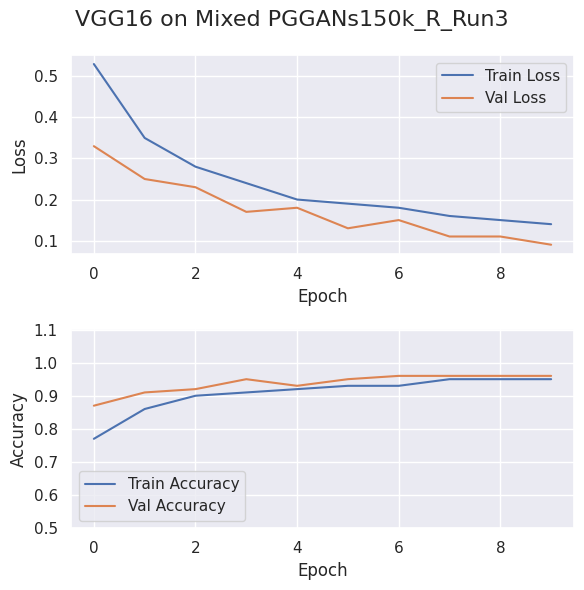

100/100 [==============================] - 22s 222ms/step
{'Test Loss': 0.3135, 'Test Accuracy': 0.8746, 'F1 Score': 0.87, 'Sensitivity (Recall)': 0.87, 'Precision': 0.89}


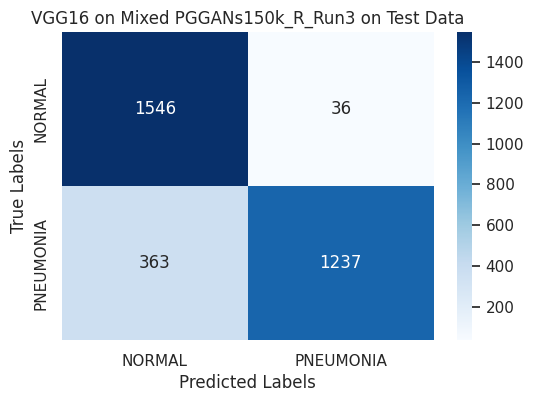

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
110/110 [==============================] - 33s 291ms/step - loss: 0.5499 - accuracy: 0.7548 - val_loss: 0.3547 - val_accuracy: 0.8693
Epoch 2/10
110/110 [==============================] - 32s 288ms/step - loss: 0.3596 - accuracy: 0.8588 - val_loss: 0.2617 - val_accuracy: 0.9125
Epoch 3/10
110/110 [==============================] - 32s 289ms/step - loss: 0.3120 - accuracy: 0.8773 - val_loss: 0.3503 - val_accuracy: 0.8409
Epoch 4/10
110/110 [==============================] - 32s 289ms/step - loss: 0.2763 - accuracy: 0.8955 - val_loss: 0.1949 - val_accuracy: 0.9398
Epoch 5/10
110/110 [==============================] - 32s 288ms/step - loss: 0.2307 - accuracy: 0.9153 - val_loss: 0.2322 - val_accuracy: 0.9114
Epoch 6/10
110/110 [==============================] - 32s 290ms/step - loss: 0.2293 - accuracy: 0.9125 - val_loss: 0.1876 - val_accuracy: 0.9239
Epoch 7/10
110/110 [==============================] - 32s 289ms/step - loss: 0.2218 - accur

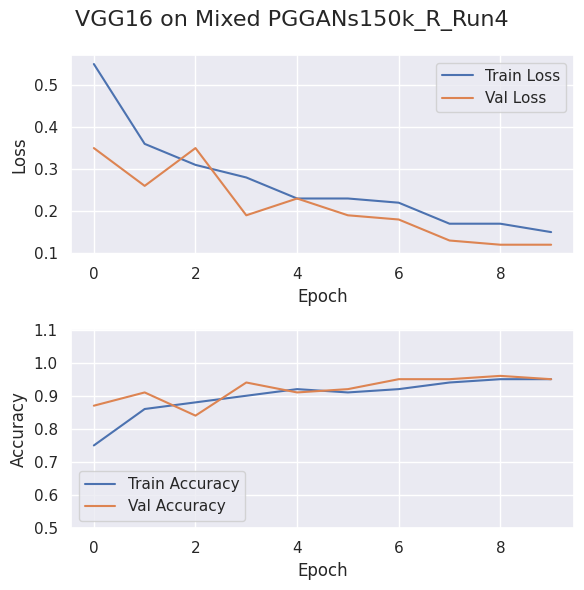

100/100 [==============================] - 22s 221ms/step
{'Test Loss': 0.386, 'Test Accuracy': 0.8595, 'F1 Score': 0.86, 'Sensitivity (Recall)': 0.86, 'Precision': 0.88}


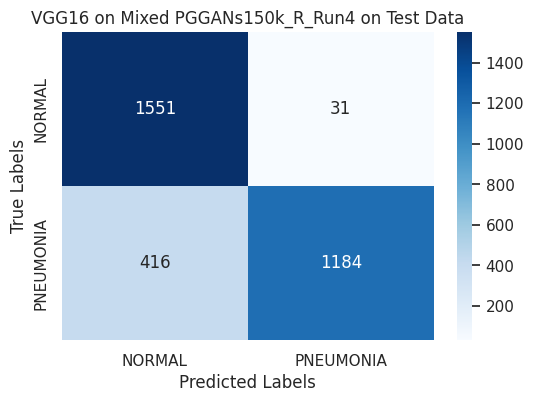

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
110/110 [==============================] - 33s 289ms/step - loss: 0.6107 - accuracy: 0.7273 - val_loss: 0.3869 - val_accuracy: 0.8966
Epoch 2/10
110/110 [==============================] - 32s 287ms/step - loss: 0.3650 - accuracy: 0.8670 - val_loss: 0.2994 - val_accuracy: 0.8795
Epoch 3/10
110/110 [==============================] - 32s 290ms/step - loss: 0.2964 - accuracy: 0.8929 - val_loss: 0.2369 - val_accuracy: 0.9114
Epoch 4/10
110/110 [==============================] - 32s 289ms/step - loss: 0.2486 - accuracy: 0.9128 - val_loss: 0.2218 - val_accuracy: 0.9102
Epoch 5/10
110/110 [==============================] - 32s 288ms/step - loss: 0.2157 - accuracy: 0.9244 - val_loss: 0.2308 - val_accuracy: 0.9068
Epoch 6/10
110/110 [==============================] - 32s 290ms/step - loss: 0.2074 - accuracy: 0.9267 - val_loss: 0.1742 - val_accuracy: 0.9341
Epoch 7/10
110/110 [==============================] - 32s 291ms/step - loss: 0.2054 - accur

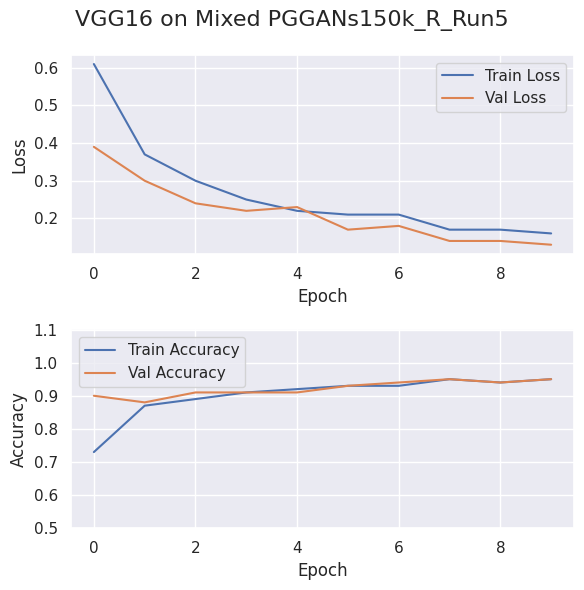

100/100 [==============================] - 22s 221ms/step
{'Test Loss': 0.2898, 'Test Accuracy': 0.8944, 'F1 Score': 0.89, 'Sensitivity (Recall)': 0.89, 'Precision': 0.9}


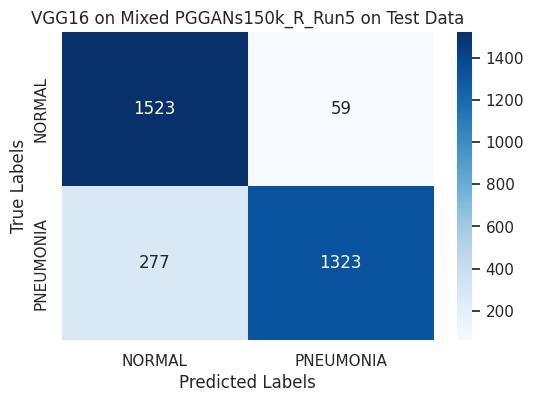

In [13]:
title = "VGG16 on Mixed PGGANs150k_R"
file_name = "Trained_Models/training_history_plot_Mixed_PGGANs150k_R.png"

for i in range(0, n):
    trained_model, test_metrics, confusion_matrix = cv_train_and_evaluate_model(
        dataset_dir_pggans150_rand, 
        test_dataset_dir_rand, 
        class_labels,  
        vgg_model, 
        weights=None,
        input_shape=input_shape, 
        title=f"{title}_Run{i+1}", 
        file_name=file_name,  # Now treated as a keyword argument
        cv=cv, 
        epochs=epochs, 
        batch_size=batch_size
    )

#### Train on Mixed PGGANs160k Dataset

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
110/110 [==============================] - 33s 289ms/step - loss: 0.7851 - accuracy: 0.6065 - val_loss: 0.5664 - val_accuracy: 0.8205
Epoch 2/10
110/110 [==============================] - 32s 288ms/step - loss: 0.5486 - accuracy: 0.7312 - val_loss: 0.4868 - val_accuracy: 0.8045
Epoch 3/10
110/110 [==============================] - 32s 288ms/step - loss: 0.4613 - accuracy: 0.8006 - val_loss: 0.4079 - val_accuracy: 0.8591
Epoch 4/10
110/110 [==============================] - 32s 289ms/step - loss: 0.4057 - accuracy: 0.8332 - val_loss: 0.3358 - val_accuracy: 0.8830
Epoch 5/10
110/110 [==============================] - 32s 289ms/step - loss: 0.3493 - accuracy: 0.8619 - val_loss: 0.2947 - val_accuracy: 0.8750
Epoch 6/10
110/110 [==============================] - 32s 289ms/step - loss: 0.3322 - accuracy: 0.8645 - val_loss: 0.2903 - val_accuracy: 0.9034
Epoch 7/10
110/110 [==============================] - 32s 289ms/step - loss: 0.3032 - accur

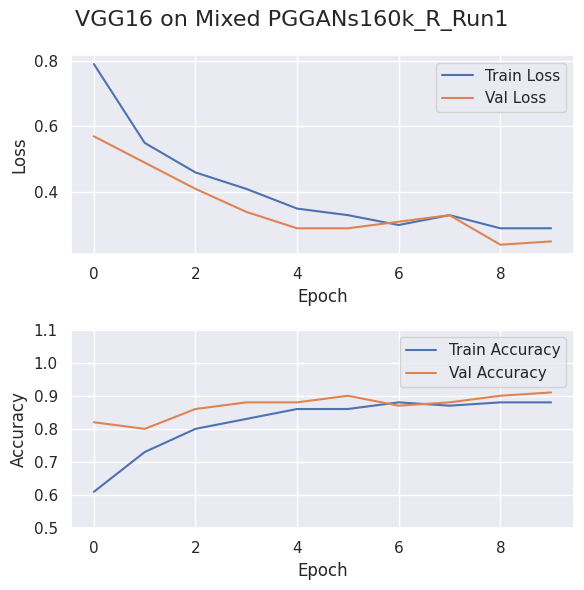

100/100 [==============================] - 22s 222ms/step
{'Test Loss': 0.2886, 'Test Accuracy': 0.8935, 'F1 Score': 0.89, 'Sensitivity (Recall)': 0.89, 'Precision': 0.91}


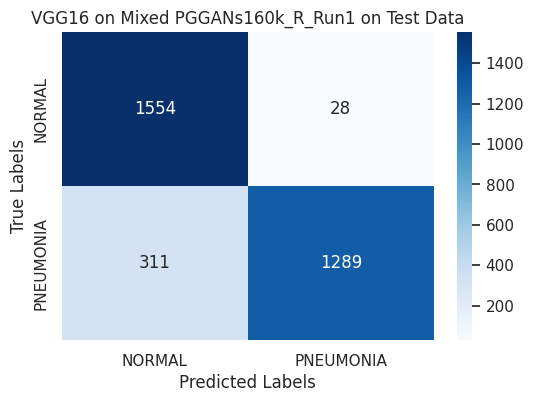

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
110/110 [==============================] - 32s 288ms/step - loss: 0.6950 - accuracy: 0.6523 - val_loss: 0.5147 - val_accuracy: 0.8057
Epoch 2/10
110/110 [==============================] - 32s 287ms/step - loss: 0.5015 - accuracy: 0.7795 - val_loss: 0.4029 - val_accuracy: 0.8636
Epoch 3/10
110/110 [==============================] - 32s 288ms/step - loss: 0.4429 - accuracy: 0.8170 - val_loss: 0.3659 - val_accuracy: 0.8852
Epoch 4/10
110/110 [==============================] - 32s 289ms/step - loss: 0.3944 - accuracy: 0.8386 - val_loss: 0.3405 - val_accuracy: 0.8955
Epoch 5/10
110/110 [==============================] - 32s 288ms/step - loss: 0.3780 - accuracy: 0.8537 - val_loss: 0.3485 - val_accuracy: 0.8580
Epoch 6/10
110/110 [==============================] - 32s 288ms/step - loss: 0.3459 - accuracy: 0.8608 - val_loss: 0.2819 - val_accuracy: 0.9000
Epoch 7/10
110/110 [==============================] - 32s 288ms/step - loss: 0.3384 - accur

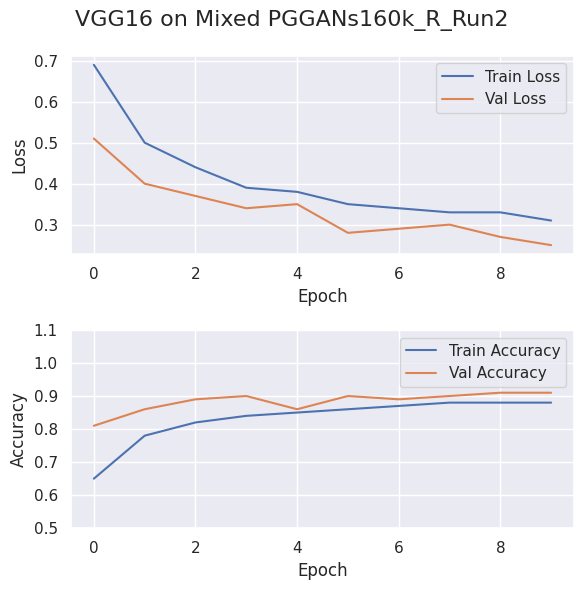

100/100 [==============================] - 22s 222ms/step
{'Test Loss': 0.3006, 'Test Accuracy': 0.8928, 'F1 Score': 0.89, 'Sensitivity (Recall)': 0.89, 'Precision': 0.9}


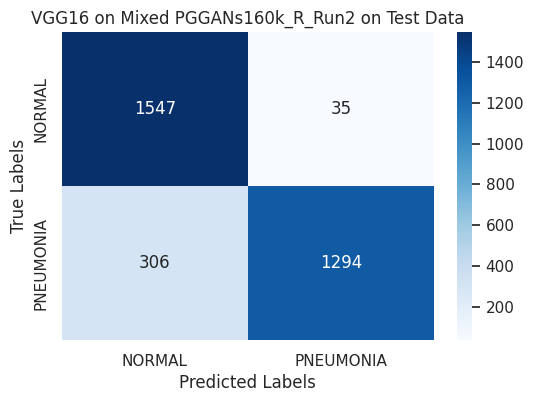

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
110/110 [==============================] - 32s 288ms/step - loss: 0.7285 - accuracy: 0.6134 - val_loss: 0.5409 - val_accuracy: 0.8091
Epoch 2/10
110/110 [==============================] - 32s 288ms/step - loss: 0.5176 - accuracy: 0.7639 - val_loss: 0.4344 - val_accuracy: 0.8568
Epoch 3/10
110/110 [==============================] - 32s 288ms/step - loss: 0.4088 - accuracy: 0.8273 - val_loss: 0.3862 - val_accuracy: 0.8625
Epoch 4/10
110/110 [==============================] - 32s 290ms/step - loss: 0.3718 - accuracy: 0.8514 - val_loss: 0.2978 - val_accuracy: 0.8943
Epoch 5/10
110/110 [==============================] - 32s 288ms/step - loss: 0.3258 - accuracy: 0.8770 - val_loss: 0.2767 - val_accuracy: 0.8920
Epoch 6/10
110/110 [==============================] - 32s 288ms/step - loss: 0.3470 - accuracy: 0.8616 - val_loss: 0.2762 - val_accuracy: 0.8932
Epoch 7/10
110/110 [==============================] - 32s 288ms/step - loss: 0.2988 - accur

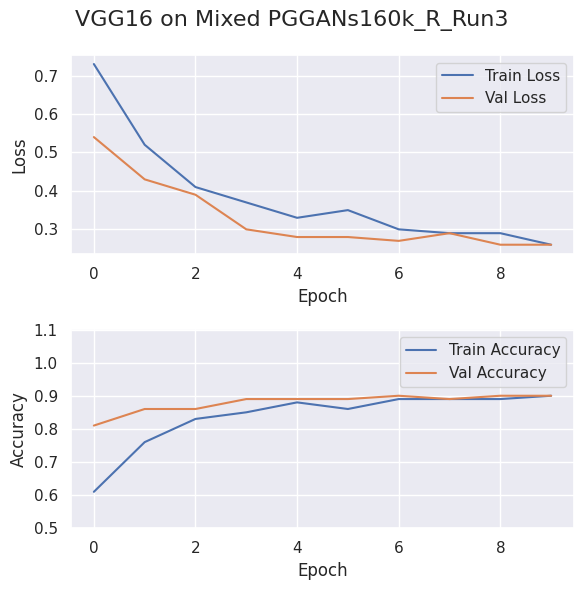

100/100 [==============================] - 23s 223ms/step
{'Test Loss': 0.2927, 'Test Accuracy': 0.8887, 'F1 Score': 0.89, 'Sensitivity (Recall)': 0.89, 'Precision': 0.9}


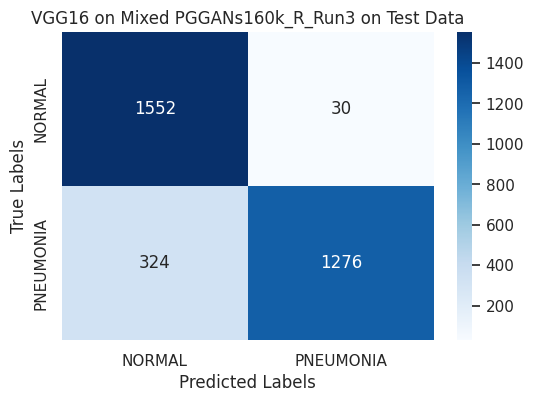

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
110/110 [==============================] - 33s 290ms/step - loss: 0.8093 - accuracy: 0.6179 - val_loss: 0.5418 - val_accuracy: 0.8102
Epoch 2/10
110/110 [==============================] - 32s 289ms/step - loss: 0.5318 - accuracy: 0.7472 - val_loss: 0.4387 - val_accuracy: 0.8489
Epoch 3/10
110/110 [==============================] - 32s 289ms/step - loss: 0.4366 - accuracy: 0.8139 - val_loss: 0.3888 - val_accuracy: 0.8534
Epoch 4/10
110/110 [==============================] - 32s 289ms/step - loss: 0.4029 - accuracy: 0.8233 - val_loss: 0.3275 - val_accuracy: 0.8739
Epoch 5/10
110/110 [==============================] - 32s 288ms/step - loss: 0.3501 - accuracy: 0.8662 - val_loss: 0.3292 - val_accuracy: 0.8545
Epoch 6/10
110/110 [==============================] - 32s 288ms/step - loss: 0.3351 - accuracy: 0.8611 - val_loss: 0.2789 - val_accuracy: 0.8841
Epoch 7/10
110/110 [==============================] - 32s 288ms/step - loss: 0.3172 - accur

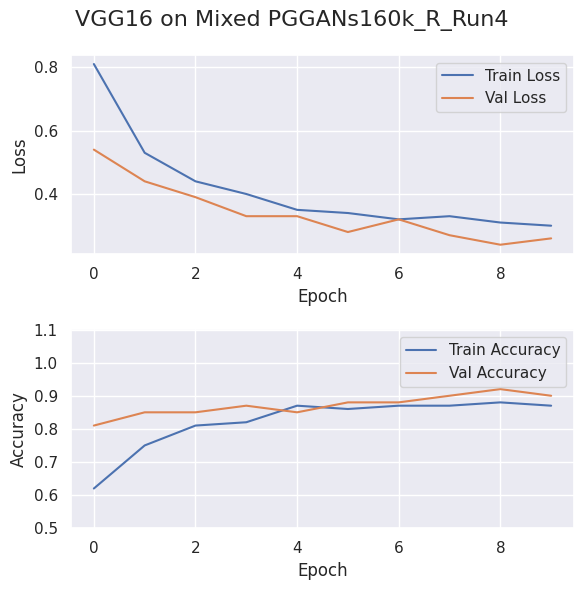

100/100 [==============================] - 22s 222ms/step
{'Test Loss': 0.3406, 'Test Accuracy': 0.8542, 'F1 Score': 0.85, 'Sensitivity (Recall)': 0.85, 'Precision': 0.88}


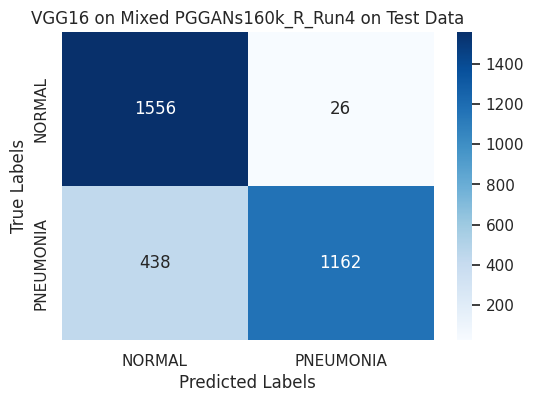

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
110/110 [==============================] - 32s 288ms/step - loss: 0.6678 - accuracy: 0.6730 - val_loss: 0.4445 - val_accuracy: 0.8420
Epoch 2/10
110/110 [==============================] - 32s 288ms/step - loss: 0.4324 - accuracy: 0.8116 - val_loss: 0.3355 - val_accuracy: 0.8841
Epoch 3/10
110/110 [==============================] - 32s 288ms/step - loss: 0.3526 - accuracy: 0.8557 - val_loss: 0.2984 - val_accuracy: 0.8977
Epoch 4/10
110/110 [==============================] - 32s 290ms/step - loss: 0.3153 - accuracy: 0.8790 - val_loss: 0.2708 - val_accuracy: 0.8977
Epoch 5/10
110/110 [==============================] - 32s 289ms/step - loss: 0.2864 - accuracy: 0.8895 - val_loss: 0.2560 - val_accuracy: 0.9034
Epoch 6/10
110/110 [==============================] - 32s 289ms/step - loss: 0.3052 - accuracy: 0.8832 - val_loss: 0.2633 - val_accuracy: 0.8955
Epoch 7/10
110/110 [==============================] - 32s 290ms/step - loss: 0.2701 - accur

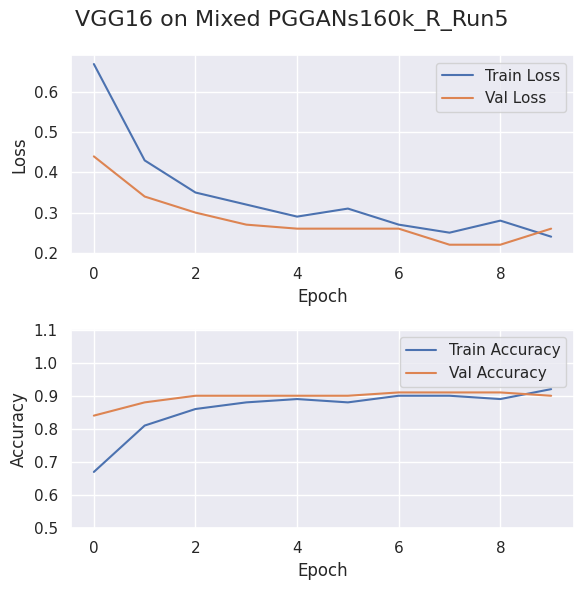

100/100 [==============================] - 22s 222ms/step
{'Test Loss': 0.315, 'Test Accuracy': 0.8787, 'F1 Score': 0.88, 'Sensitivity (Recall)': 0.88, 'Precision': 0.9}


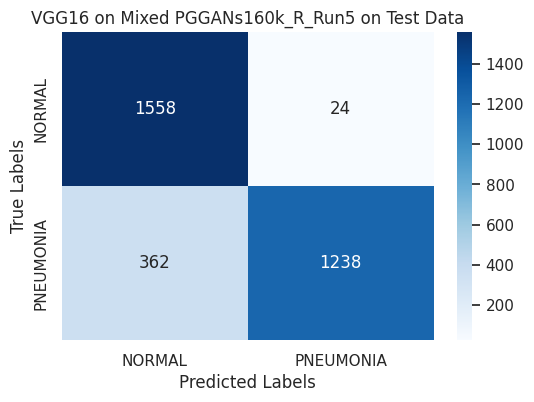

In [14]:
title = "VGG16 on Mixed PGGANs160k_R" 
file_name = "Trained_Models/training_history_plot_Mixed_PGGANs160k_R.png"

for i in range(0, n):
    trained_model, test_metrics, confusion_matrix = cv_train_and_evaluate_model(
        dataset_dir_pggans160_rand, 
        test_dataset_dir_rand, 
        class_labels,  
        vgg_model, 
        weights=None,
        input_shape=input_shape,
        title=f"{title}_Run{i+1}", 
        file_name=file_name,  # Now treated as a keyword argument
        cv=cv, 
        epochs=epochs, 
        batch_size=batch_size
    )

## ResNet50

#### Train on Original Dataset


Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
10/10 [==============================] - 6s 311ms/step - loss: 118.2826 - accuracy: 0.5000 - val_loss: 4.6261 - val_accuracy: 0.6500
Epoch 2/10
10/10 [==============================] - 2s 209ms/step - loss: 28.7749 - accuracy: 0.6062 - val_loss: 2.3954 - val_accuracy: 0.8125
Epoch 3/10
10/10 [==============================] - 2s 215ms/step - loss: 11.7404 - accuracy: 0.6938 - val_loss: 1.4474 - val_accuracy: 0.8750
Epoch 4/10
10/10 [==============================] - 2s 210ms/step - loss: 4.7676 - accuracy: 0.7406 - val_loss: 0.7232 - val_accuracy: 0.9000
Epoch 5/10
10/10 [==============================] - 2s 213ms/step - loss: 1.4602 - accuracy: 0.7750 - val_loss: 0.4074 - val_accuracy: 0.9000
Epoch 6/10
10/10 [==============================] - 2s 210ms/step - loss: 0.7135 - accuracy: 0.8188 - val_loss: 0.4039 - val_accuracy: 0.8125
Epoch 7/10
10/10 [==============================] - 2s 205ms/step - loss: 0.8436 - accuracy: 0.8219 - val

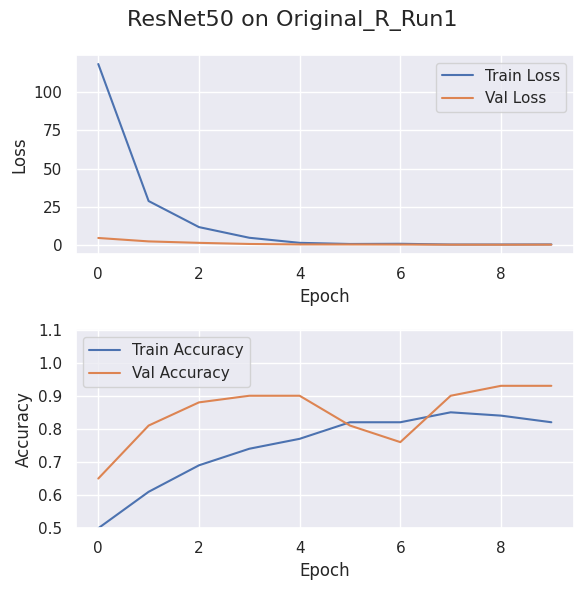

100/100 [==============================] - 13s 126ms/step
{'Test Loss': 0.3572, 'Test Accuracy': 0.8429, 'F1 Score': 0.84, 'Sensitivity (Recall)': 0.84, 'Precision': 0.86}


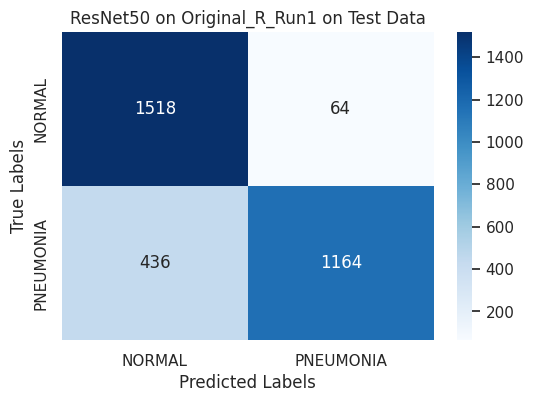

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
10/10 [==============================] - 6s 316ms/step - loss: 118.2227 - accuracy: 0.4656 - val_loss: 61.2001 - val_accuracy: 0.5000
Epoch 2/10
10/10 [==============================] - 2s 207ms/step - loss: 31.7174 - accuracy: 0.5344 - val_loss: 7.4615 - val_accuracy: 0.5625
Epoch 3/10
10/10 [==============================] - 2s 203ms/step - loss: 10.1118 - accuracy: 0.6250 - val_loss: 0.9627 - val_accuracy: 0.8250
Epoch 4/10
10/10 [==============================] - 2s 211ms/step - loss: 1.4618 - accuracy: 0.7969 - val_loss: 0.5666 - val_accuracy: 0.8000
Epoch 5/10
10/10 [==============================] - 2s 208ms/step - loss: 0.4304 - accuracy: 0.8562 - val_loss: 0.2706 - val_accuracy: 0.8875
Epoch 6/10
10/10 [==============================] - 2s 205ms/step - loss: 0.3147 - accuracy: 0.8625 - val_loss: 0.2413 - val_accuracy: 0.9000
Epoch 7/10
10/10 [==============================] - 2s 205ms/step - loss: 0.2857 - accuracy: 0.8969 - va

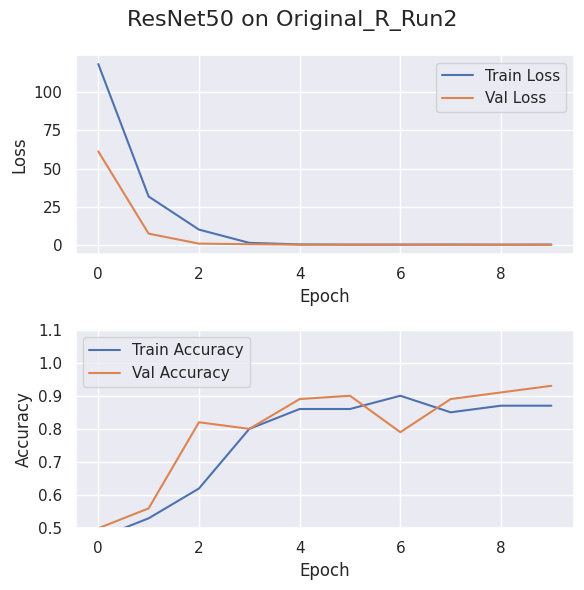

100/100 [==============================] - 14s 129ms/step
{'Test Loss': 0.3473, 'Test Accuracy': 0.8479, 'F1 Score': 0.85, 'Sensitivity (Recall)': 0.85, 'Precision': 0.87}


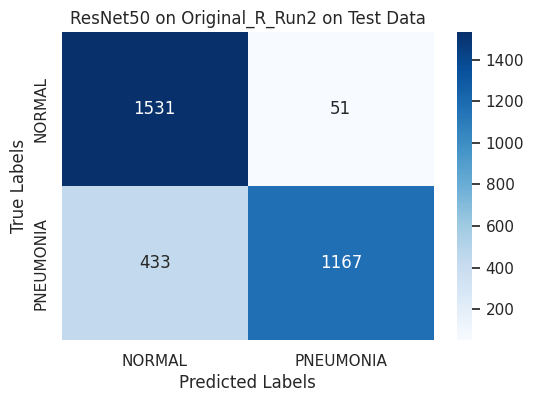

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
10/10 [==============================] - 6s 313ms/step - loss: 93.3338 - accuracy: 0.4969 - val_loss: 68.2969 - val_accuracy: 0.5000
Epoch 2/10
10/10 [==============================] - 2s 210ms/step - loss: 39.2437 - accuracy: 0.5844 - val_loss: 9.9494 - val_accuracy: 0.5000
Epoch 3/10
10/10 [==============================] - 2s 209ms/step - loss: 17.1960 - accuracy: 0.6375 - val_loss: 1.2527 - val_accuracy: 0.8625
Epoch 4/10
10/10 [==============================] - 2s 209ms/step - loss: 3.9819 - accuracy: 0.7125 - val_loss: 1.0847 - val_accuracy: 0.7625
Epoch 5/10
10/10 [==============================] - 2s 211ms/step - loss: 1.1568 - accuracy: 0.8062 - val_loss: 0.2998 - val_accuracy: 0.8875
Epoch 6/10
10/10 [==============================] - 2s 209ms/step - loss: 0.3899 - accuracy: 0.9000 - val_loss: 0.1919 - val_accuracy: 0.9250
Epoch 7/10
10/10 [==============================] - 2s 208ms/step - loss: 0.3069 - accuracy: 0.8875 - val

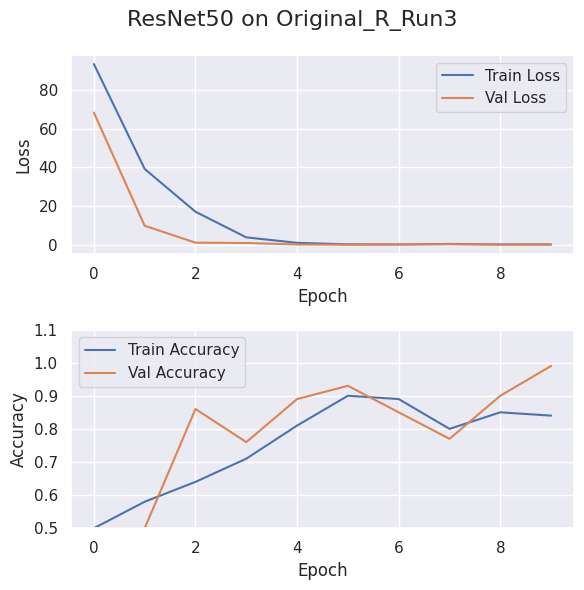

100/100 [==============================] - 14s 130ms/step
{'Test Loss': 0.3091, 'Test Accuracy': 0.9029, 'F1 Score': 0.9, 'Sensitivity (Recall)': 0.9, 'Precision': 0.9}


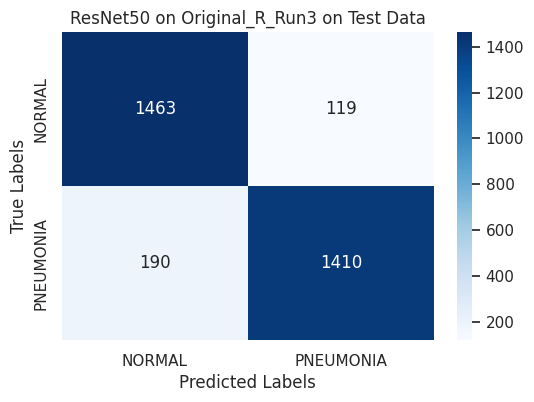

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
10/10 [==============================] - 6s 318ms/step - loss: 100.5989 - accuracy: 0.4344 - val_loss: 42.5126 - val_accuracy: 0.5000
Epoch 2/10
10/10 [==============================] - 2s 204ms/step - loss: 26.8542 - accuracy: 0.5844 - val_loss: 8.3215 - val_accuracy: 0.5000
Epoch 3/10
10/10 [==============================] - 2s 205ms/step - loss: 10.3182 - accuracy: 0.5844 - val_loss: 1.7396 - val_accuracy: 0.5875
Epoch 4/10
10/10 [==============================] - 2s 203ms/step - loss: 1.9925 - accuracy: 0.6500 - val_loss: 0.9503 - val_accuracy: 0.5625
Epoch 5/10
10/10 [==============================] - 2s 206ms/step - loss: 0.7297 - accuracy: 0.5875 - val_loss: 0.6157 - val_accuracy: 0.6750
Epoch 6/10
10/10 [==============================] - 2s 206ms/step - loss: 0.5078 - accuracy: 0.7406 - val_loss: 0.4011 - val_accuracy: 0.9000
Epoch 7/10
10/10 [==============================] - 2s 208ms/step - loss: 0.5150 - accuracy: 0.7188 - va

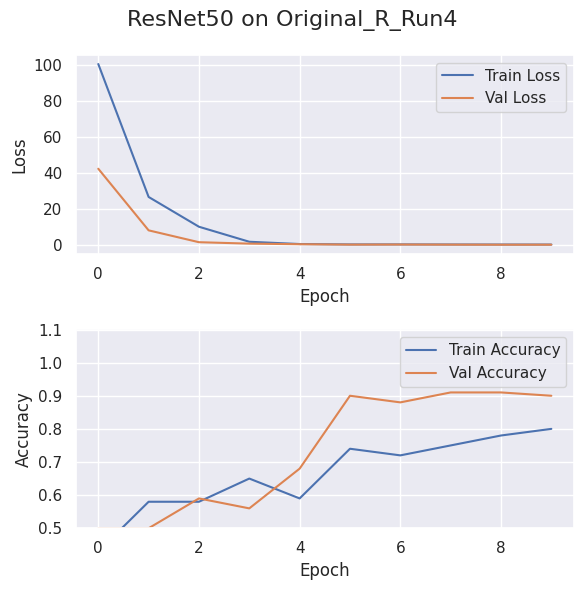

100/100 [==============================] - 14s 127ms/step
{'Test Loss': 0.3842, 'Test Accuracy': 0.8812, 'F1 Score': 0.88, 'Sensitivity (Recall)': 0.88, 'Precision': 0.89}


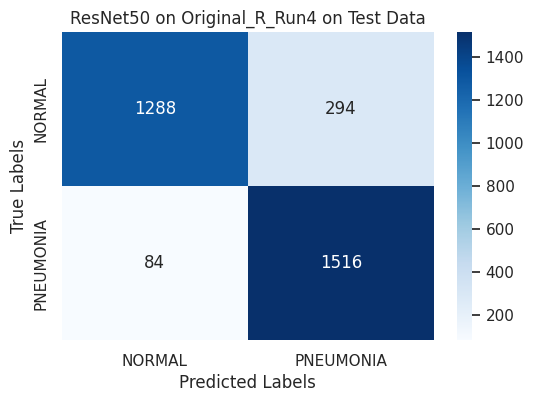

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
10/10 [==============================] - 6s 309ms/step - loss: 63.3192 - accuracy: 0.5406 - val_loss: 22.5748 - val_accuracy: 0.5000
Epoch 2/10
10/10 [==============================] - 2s 207ms/step - loss: 31.2322 - accuracy: 0.6156 - val_loss: 6.9718 - val_accuracy: 0.7500
Epoch 3/10
10/10 [==============================] - 2s 203ms/step - loss: 14.7682 - accuracy: 0.7094 - val_loss: 2.0809 - val_accuracy: 0.8500
Epoch 4/10
10/10 [==============================] - 2s 201ms/step - loss: 5.4512 - accuracy: 0.7844 - val_loss: 0.7264 - val_accuracy: 0.9125
Epoch 5/10
10/10 [==============================] - 2s 207ms/step - loss: 1.9606 - accuracy: 0.8469 - val_loss: 0.8456 - val_accuracy: 0.8875
Epoch 6/10
10/10 [==============================] - 2s 203ms/step - loss: 1.4490 - accuracy: 0.8875 - val_loss: 1.3522 - val_accuracy: 0.7875
Epoch 7/10
10/10 [==============================] - 2s 204ms/step - loss: 1.3631 - accuracy: 0.8469 - val

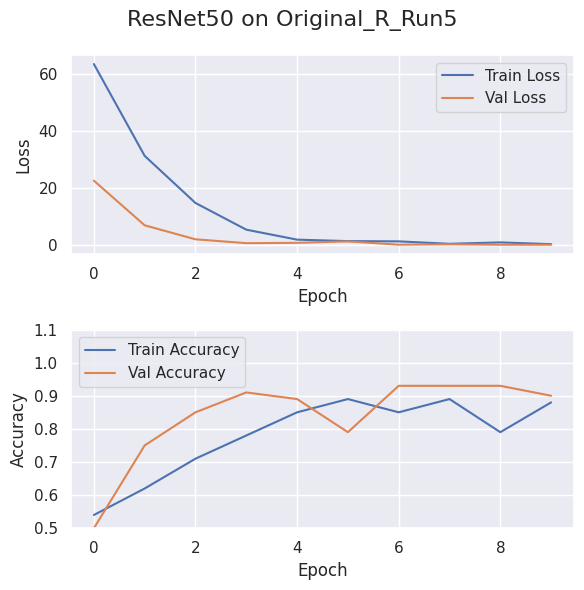

100/100 [==============================] - 14s 127ms/step
{'Test Loss': 0.3211, 'Test Accuracy': 0.8708, 'F1 Score': 0.87, 'Sensitivity (Recall)': 0.87, 'Precision': 0.88}


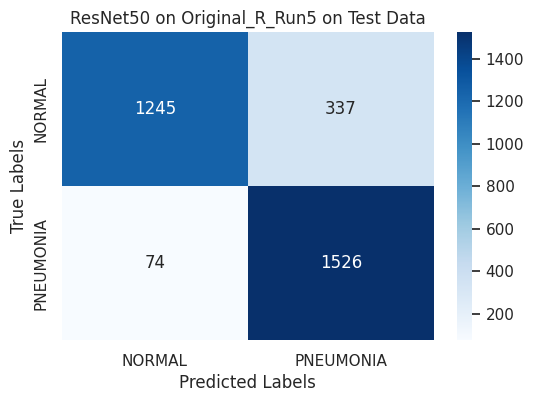

In [15]:

title = "ResNet50 on Original_R"
file_name = "Trained_Models/ResNet50_training_history_plot_original_R.png"

for i in range(0, n):
    trained_model, test_metrics, confusion_matrix = cv_train_and_evaluate_model(
        dataset_dir_org_rand, 
        test_dataset_dir_rand, 
        class_labels,  
        resnet_model,
        weights=None,
        input_shape=input_shape,
        title=f"{title}_Run{i+1}", 
        file_name=file_name,  # Now treated as a keyword argument
        cv=cv, 
        epochs=epochs, 
        batch_size=batch_size
    )

#### Train on Mixed DDPM Dataset


Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
108/108 [==============================] - 26s 217ms/step - loss: 11.8874 - accuracy: 0.6424 - val_loss: 0.4628 - val_accuracy: 0.8733
Epoch 2/10
108/108 [==============================] - 23s 210ms/step - loss: 0.5413 - accuracy: 0.6843 - val_loss: 0.3926 - val_accuracy: 0.8558
Epoch 3/10
108/108 [==============================] - 23s 210ms/step - loss: 0.7014 - accuracy: 0.5640 - val_loss: 0.6931 - val_accuracy: 0.5128
Epoch 4/10
108/108 [==============================] - 23s 213ms/step - loss: 0.7148 - accuracy: 0.5116 - val_loss: 0.6930 - val_accuracy: 0.5128
Epoch 5/10
108/108 [==============================] - 23s 215ms/step - loss: 0.6930 - accuracy: 0.5116 - val_loss: 0.6929 - val_accuracy: 0.5128
Epoch 6/10
108/108 [==============================] - 23s 215ms/step - loss: 0.6930 - accuracy: 0.5116 - val_loss: 0.6929 - val_accuracy: 0.5128
Epoch 7/10
108/108 [==============================] - 23s 215ms/step - loss: 0.6930 - accu

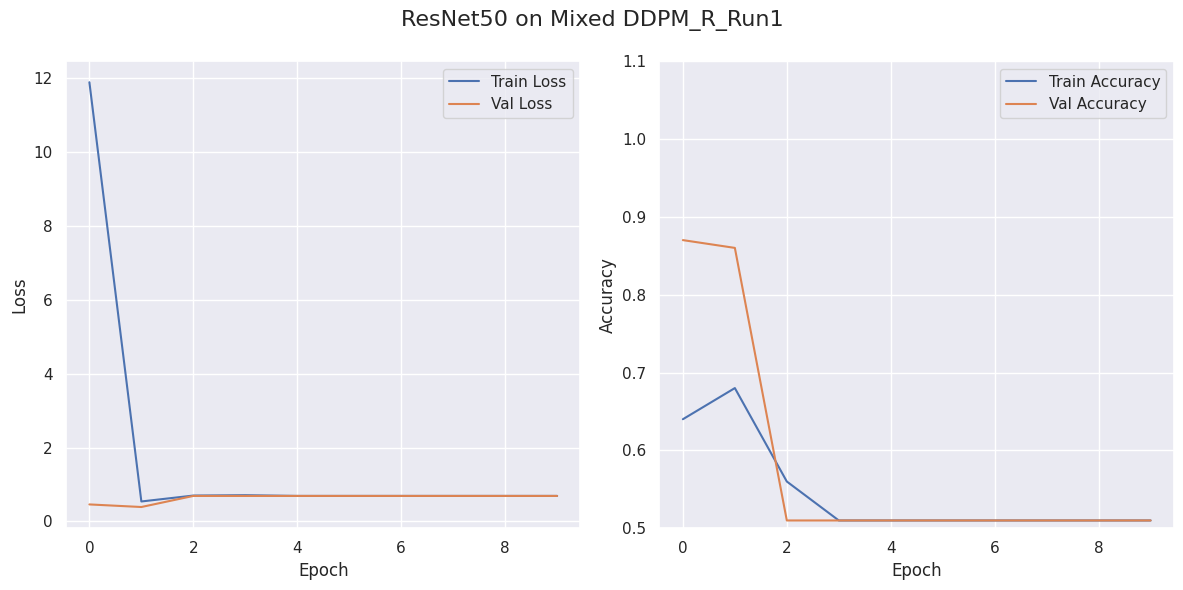

100/100 [==============================] - 14s 135ms/step
{'Test Loss': 0.6932, 'Test Accuracy': 0.5028, 'F1 Score': 0.34, 'Sensitivity (Recall)': 0.5, 'Precision': 0.25}


/users/PCS0229/imankhazrak/miniconda3/envs/ddpm_pytorch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/users/PCS0229/imankhazrak/miniconda3/envs/ddpm_pytorch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/users/PCS0229/imankhazrak/miniconda3/envs/ddpm_pytorch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

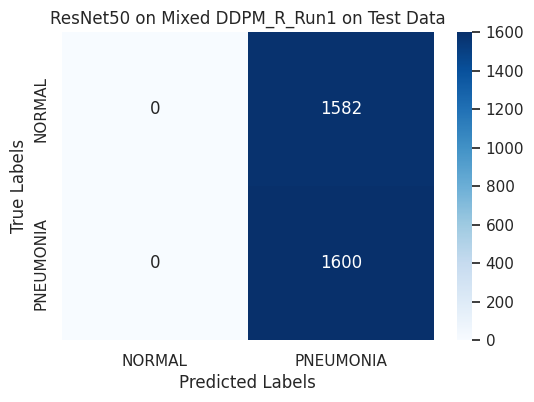

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
108/108 [==============================] - 26s 215ms/step - loss: 15.0069 - accuracy: 0.7134 - val_loss: 0.4261 - val_accuracy: 0.9128
Epoch 2/10
108/108 [==============================] - 22s 200ms/step - loss: 0.4729 - accuracy: 0.7555 - val_loss: 0.2637 - val_accuracy: 0.9267
Epoch 3/10
108/108 [==============================] - 22s 200ms/step - loss: 0.5324 - accuracy: 0.7596 - val_loss: 0.4089 - val_accuracy: 0.9314
Epoch 4/10
108/108 [==============================] - 22s 207ms/step - loss: 0.4979 - accuracy: 0.7157 - val_loss: 0.2851 - val_accuracy: 0.8907
Epoch 5/10
108/108 [==============================] - 23s 212ms/step - loss: 0.5327 - accuracy: 0.6221 - val_loss: 0.4183 - val_accuracy: 0.8093
Epoch 6/10
108/108 [==============================] - 23s 214ms/step - loss: 0.5832 - accuracy: 0.6625 - val_loss: 0.4542 - val_accuracy: 0.9151
Epoch 7/10
108/108 [==============================] - 23s 216ms/step - loss: 0.5482 - accu

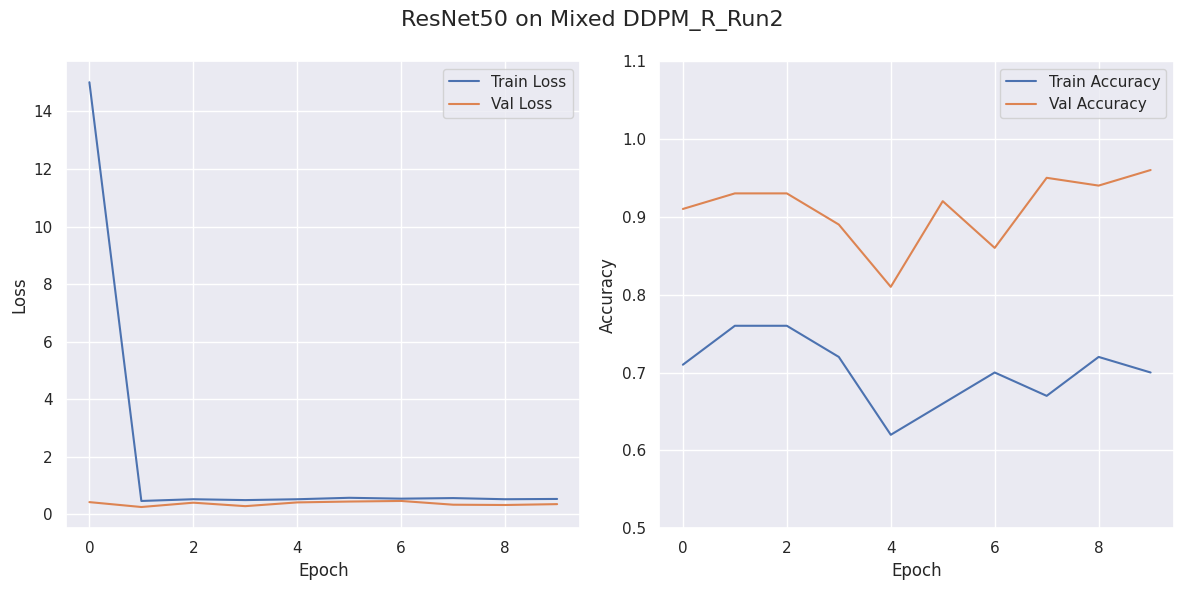

100/100 [==============================] - 14s 136ms/step
{'Test Loss': 0.4048, 'Test Accuracy': 0.8944, 'F1 Score': 0.89, 'Sensitivity (Recall)': 0.89, 'Precision': 0.9}


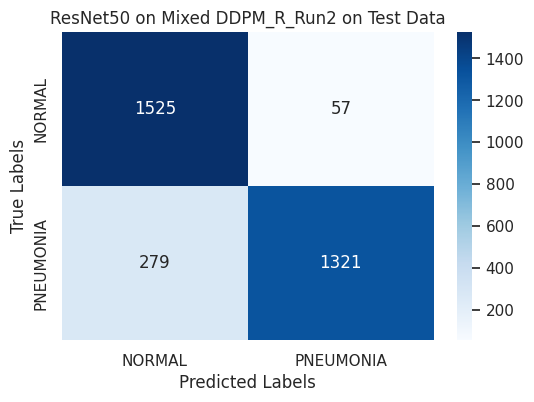

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
108/108 [==============================] - 26s 213ms/step - loss: 16.2534 - accuracy: 0.7224 - val_loss: 0.2039 - val_accuracy: 0.9407
Epoch 2/10
108/108 [==============================] - 22s 205ms/step - loss: 0.3950 - accuracy: 0.8512 - val_loss: 0.2302 - val_accuracy: 0.9233
Epoch 3/10
108/108 [==============================] - 23s 209ms/step - loss: 0.3581 - accuracy: 0.8442 - val_loss: 0.2650 - val_accuracy: 0.9267
Epoch 4/10
 77/108 [====================>.........] - ETA: 5s - loss: 0.3116 - accuracy: 0.8612

In [ ]:
title = "ResNet50 on Mixed DDPM_R"
file_name = "Trained_Models/ResNet50_training_history_plot_Mixed_DDPM_R.png"

for i in range(0, n):
    trained_model, test_metrics, confusion_matrix = cv_train_and_evaluate_model(
        dataset_dir_ddpm_rand, 
        test_dataset_dir_rand, 
        class_labels,  
        resnet_model,
        weights=None,
        input_shape=input_shape,
        title=f"{title}_Run{i+1}", 
        file_name=file_name,  # Now treated as a keyword argument
        cv=cv, 
        epochs=epochs, 
        batch_size=batch_size
    )

#### Train on Mixed PGGANs150k Dataset

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
110/110 [==============================] - 27s 216ms/step - loss: 9.6833 - accuracy: 0.7253 - val_loss: 0.2857 - val_accuracy: 0.9057
Epoch 2/10
110/110 [==============================] - 23s 212ms/step - loss: 0.3370 - accuracy: 0.8673 - val_loss: 0.2415 - val_accuracy: 0.9068
Epoch 3/10
110/110 [==============================] - 24s 214ms/step - loss: 0.3508 - accuracy: 0.8403 - val_loss: 0.3969 - val_accuracy: 0.8830
Epoch 4/10
110/110 [==============================] - 24s 214ms/step - loss: 0.4227 - accuracy: 0.7935 - val_loss: 0.2902 - val_accuracy: 0.9182
Epoch 5/10
110/110 [==============================] - 24s 217ms/step - loss: 0.5646 - accuracy: 0.7861 - val_loss: 0.2728 - val_accuracy: 0.8932
Epoch 6/10
110/110 [==============================] - 24s 217ms/step - loss: 0.4316 - accuracy: 0.7233 - val_loss: 0.1972 - val_accuracy: 0.9295
Epoch 7/10
110/110 [==============================] - 24s 218ms/step - loss: 0.4448 - accur

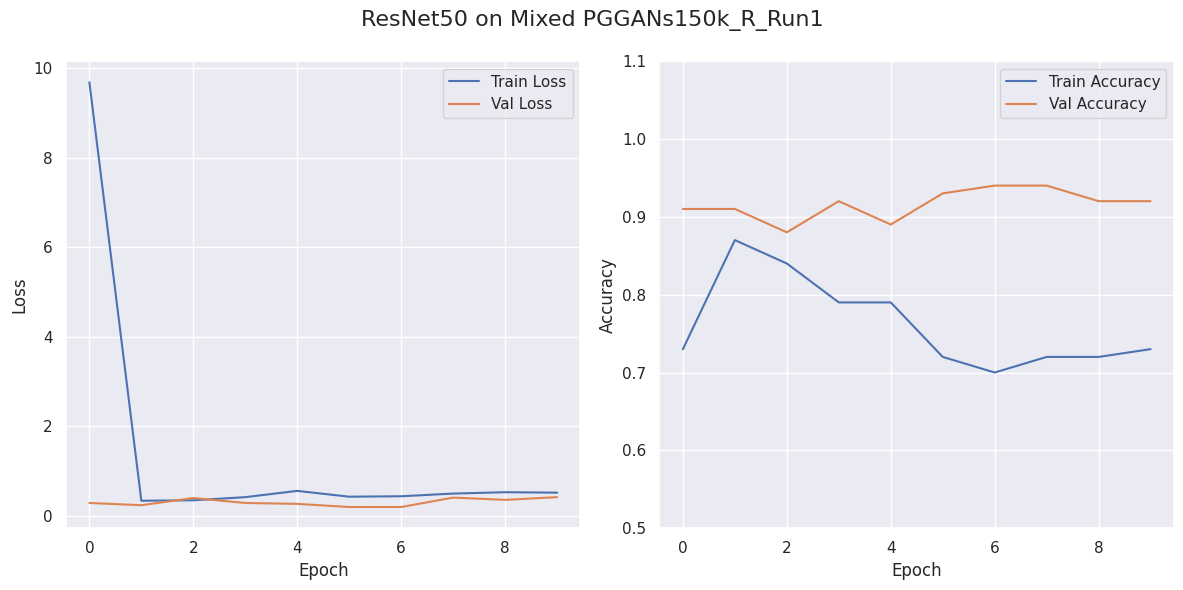

100/100 [==============================] - 15s 138ms/step
{'Test Loss': 0.5891, 'Test Accuracy': 0.6873, 'F1 Score': 0.66, 'Sensitivity (Recall)': 0.69, 'Precision': 0.8}


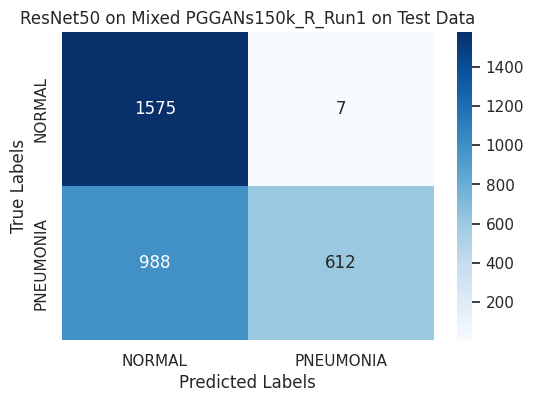

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
110/110 [==============================] - 27s 217ms/step - loss: 10.7155 - accuracy: 0.7043 - val_loss: 0.3463 - val_accuracy: 0.8443
Epoch 2/10
110/110 [==============================] - 23s 214ms/step - loss: 0.4171 - accuracy: 0.8310 - val_loss: 0.2981 - val_accuracy: 0.8864
Epoch 3/10
110/110 [==============================] - 24s 216ms/step - loss: 0.4176 - accuracy: 0.7923 - val_loss: 0.3113 - val_accuracy: 0.8966
Epoch 4/10
110/110 [==============================] - 24s 216ms/step - loss: 0.6088 - accuracy: 0.5932 - val_loss: 0.6932 - val_accuracy: 0.5011
Epoch 5/10
110/110 [==============================] - 23s 214ms/step - loss: 0.7362 - accuracy: 0.5040 - val_loss: 0.6931 - val_accuracy: 0.5011
Epoch 6/10
110/110 [==============================] - 24s 214ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6930 - val_accuracy: 0.5011
Epoch 7/10
110/110 [==============================] - 23s 212ms/step - loss: 0.6457 - accu

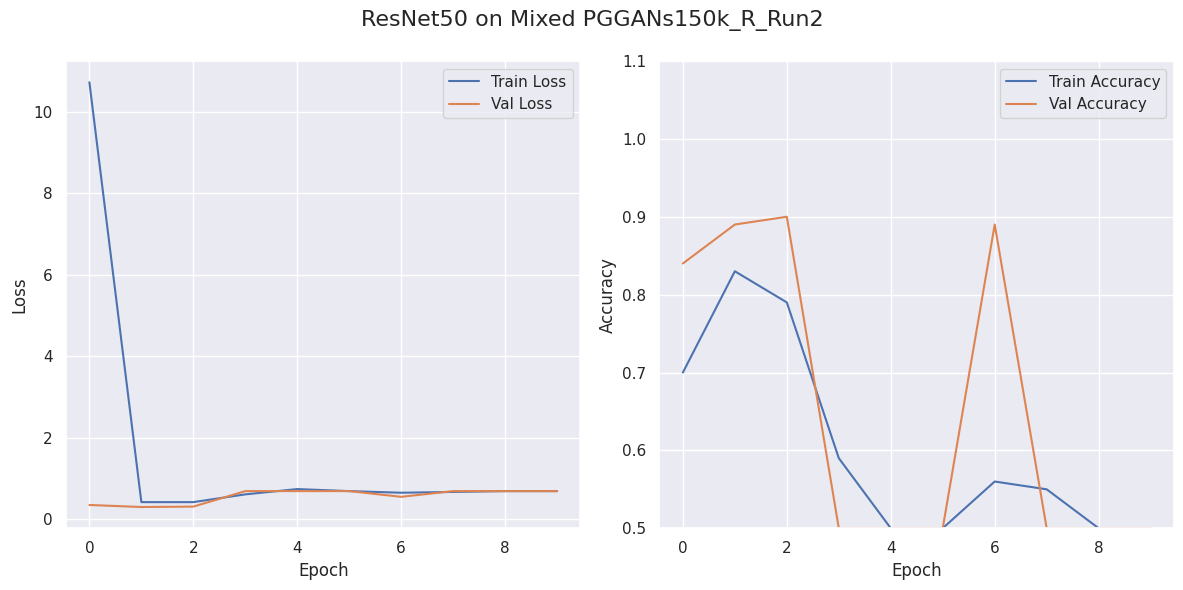

100/100 [==============================] - 14s 134ms/step
{'Test Loss': 0.6937, 'Test Accuracy': 0.4975, 'F1 Score': 0.33, 'Sensitivity (Recall)': 0.5, 'Precision': 0.58}


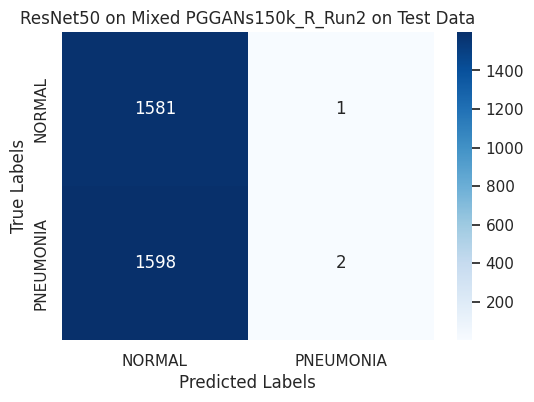

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
110/110 [==============================] - 26s 212ms/step - loss: 8.2811 - accuracy: 0.6946 - val_loss: 0.4518 - val_accuracy: 0.7966
Epoch 2/10
110/110 [==============================] - 23s 207ms/step - loss: 0.5522 - accuracy: 0.7230 - val_loss: 0.3829 - val_accuracy: 0.8784
Epoch 3/10
110/110 [==============================] - 23s 213ms/step - loss: 0.6553 - accuracy: 0.6102 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/10
110/110 [==============================] - 23s 212ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/10
110/110 [==============================] - 24s 214ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/10
110/110 [==============================] - 24s 216ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5011
Epoch 7/10
110/110 [==============================] - 24s 215ms/step - loss: 0.6932 - accur

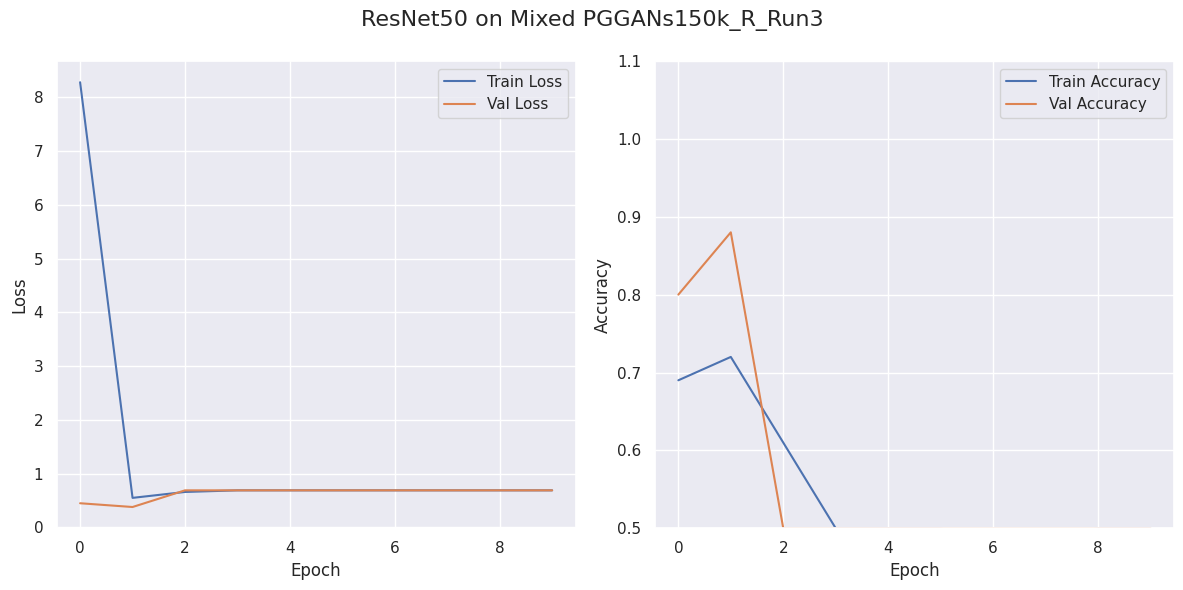

100/100 [==============================] - 14s 134ms/step
{'Test Loss': 0.6931, 'Test Accuracy': 0.5013, 'F1 Score': 0.34, 'Sensitivity (Recall)': 0.5, 'Precision': 0.25}


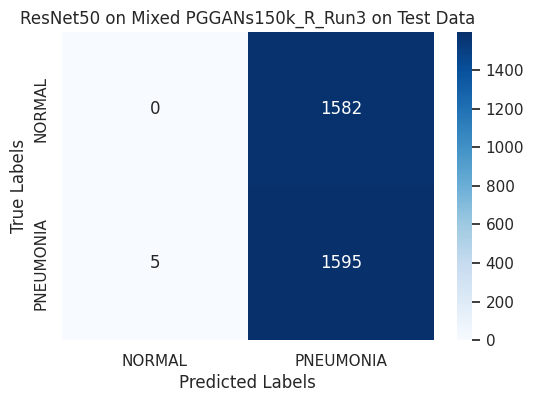

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
110/110 [==============================] - 26s 215ms/step - loss: 8.0967 - accuracy: 0.7028 - val_loss: 0.4105 - val_accuracy: 0.7886
Epoch 2/10
110/110 [==============================] - 23s 210ms/step - loss: 0.5401 - accuracy: 0.7429 - val_loss: 0.2897 - val_accuracy: 0.8818
Epoch 3/10
110/110 [==============================] - 24s 215ms/step - loss: 0.5879 - accuracy: 0.6256 - val_loss: 0.5212 - val_accuracy: 0.8852
Epoch 4/10
110/110 [==============================] - 24s 216ms/step - loss: 0.5774 - accuracy: 0.6832 - val_loss: 0.4483 - val_accuracy: 0.9102
Epoch 5/10
110/110 [==============================] - 24s 219ms/step - loss: 0.5595 - accuracy: 0.6963 - val_loss: 0.6294 - val_accuracy: 0.6784
Epoch 6/10
110/110 [==============================] - 24s 217ms/step - loss: 0.5676 - accuracy: 0.6855 - val_loss: 0.4212 - val_accuracy: 0.9159
Epoch 7/10
110/110 [==============================] - 24s 219ms/step - loss: 0.5299 - accur

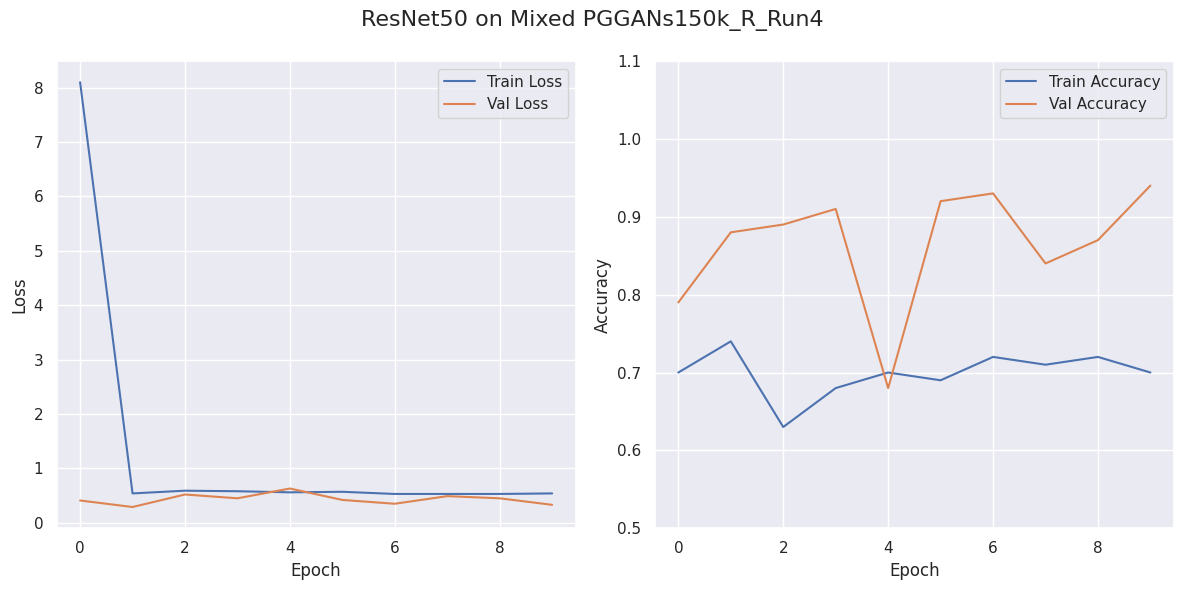

100/100 [==============================] - 14s 133ms/step
{'Test Loss': 0.5905, 'Test Accuracy': 0.6766, 'F1 Score': 0.64, 'Sensitivity (Recall)': 0.68, 'Precision': 0.79}


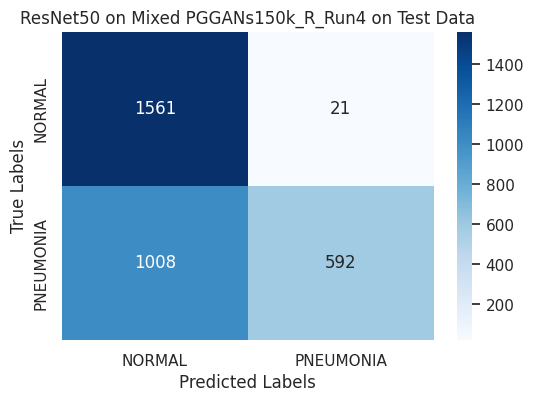

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
110/110 [==============================] - 27s 218ms/step - loss: 9.0398 - accuracy: 0.6770 - val_loss: 0.4492 - val_accuracy: 0.8193
Epoch 2/10
110/110 [==============================] - 23s 214ms/step - loss: 0.4810 - accuracy: 0.7631 - val_loss: 0.3099 - val_accuracy: 0.9136
Epoch 3/10
110/110 [==============================] - 24s 214ms/step - loss: 0.5839 - accuracy: 0.5989 - val_loss: 0.5007 - val_accuracy: 0.5000
Epoch 4/10
110/110 [==============================] - 24s 214ms/step - loss: 0.5719 - accuracy: 0.6949 - val_loss: 0.4277 - val_accuracy: 0.8761
Epoch 5/10
110/110 [==============================] - 24s 217ms/step - loss: 0.5721 - accuracy: 0.6872 - val_loss: 0.4542 - val_accuracy: 0.9068
Epoch 6/10
110/110 [==============================] - 24s 216ms/step - loss: 0.5723 - accuracy: 0.6912 - val_loss: 0.4035 - val_accuracy: 0.9227
Epoch 7/10
110/110 [==============================] - 24s 217ms/step - loss: 0.5369 - accur

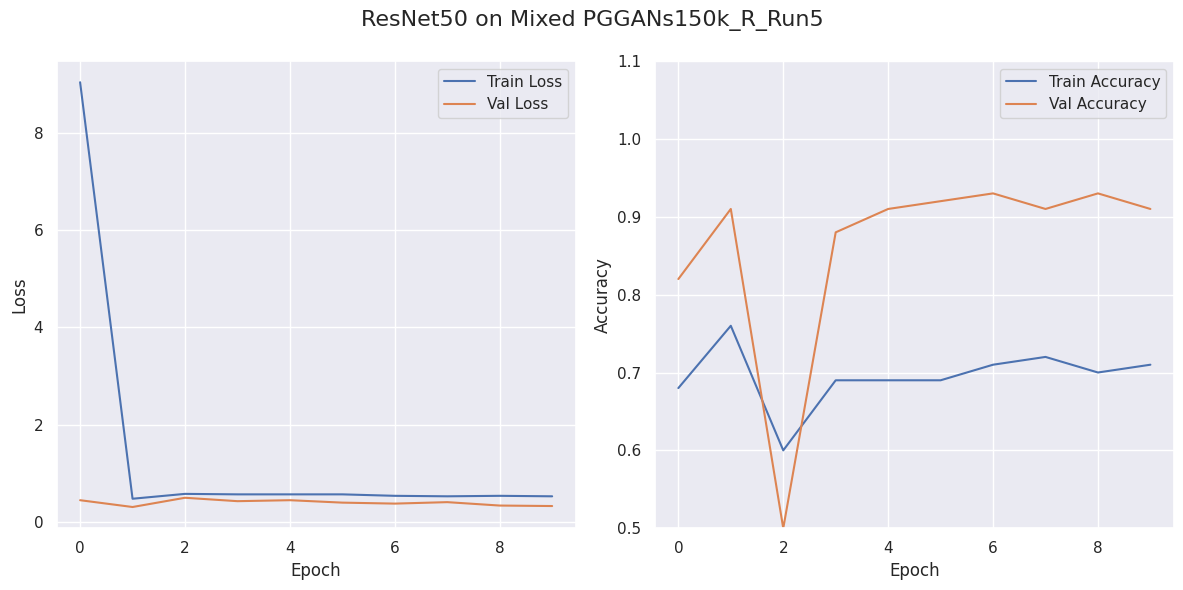

100/100 [==============================] - 14s 132ms/step
{'Test Loss': 0.5623, 'Test Accuracy': 0.7137, 'F1 Score': 0.7, 'Sensitivity (Recall)': 0.71, 'Precision': 0.75}


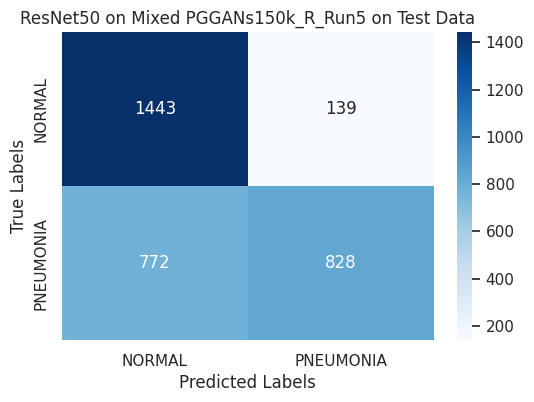

In [7]:
title = "ResNet50 on Mixed PGGANs150k_R"
file_name = "Trained_Models/ResNet50_training_history_plot_Mixed_PGGANs150k_R.png"

for i in range(0, n):
    trained_model, test_metrics, confusion_matrix = cv_train_and_evaluate_model(
        dataset_dir_pggans150_rand, 
        test_dataset_dir_rand, 
        class_labels,  
        resnet_model,
        weights=None,
        input_shape=input_shape,
        title=f"{title}_Run{i+1}", 
        file_name=file_name,  # Now treated as a keyword argument
        cv=cv, 
        epochs=epochs, 
        batch_size=batch_size
    )

#### Train on Mixed PGGANs160k Dataset

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
110/110 [==============================] - 27s 212ms/step - loss: 18.0071 - accuracy: 0.5378 - val_loss: 0.6539 - val_accuracy: 0.5625
Epoch 2/10
110/110 [==============================] - 23s 207ms/step - loss: 0.8451 - accuracy: 0.5293 - val_loss: 0.6930 - val_accuracy: 0.5011
Epoch 3/10
110/110 [==============================] - 23s 211ms/step - loss: 0.7352 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5011
Epoch 4/10
110/110 [==============================] - 23s 214ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5011
Epoch 5/10
110/110 [==============================] - 24s 216ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5011
Epoch 6/10
110/110 [==============================] - 24s 217ms/step - loss: 0.6933 - accuracy: 0.4989 - val_loss: 0.6931 - val_accuracy: 0.5023
Epoch 7/10
110/110 [==============================] - 24s 219ms/step - loss: 0.6932 - accu

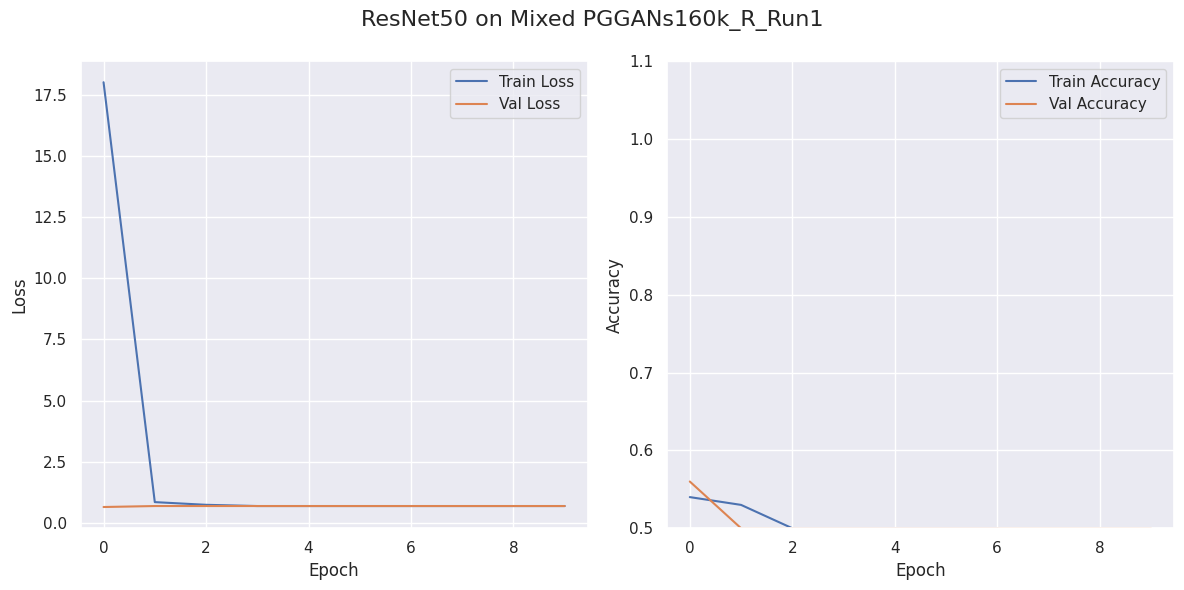

100/100 [==============================] - 15s 137ms/step
{'Test Loss': 0.6931, 'Test Accuracy': 0.5028, 'F1 Score': 0.34, 'Sensitivity (Recall)': 0.5, 'Precision': 0.25}


/users/PCS0229/imankhazrak/miniconda3/envs/ddpm_pytorch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/users/PCS0229/imankhazrak/miniconda3/envs/ddpm_pytorch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/users/PCS0229/imankhazrak/miniconda3/envs/ddpm_pytorch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

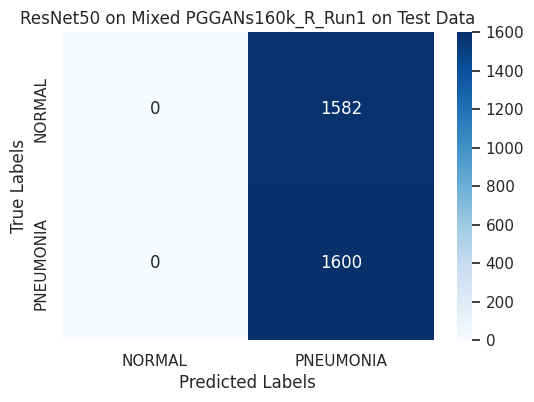

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
110/110 [==============================] - 26s 212ms/step - loss: 14.1199 - accuracy: 0.6293 - val_loss: 0.5156 - val_accuracy: 0.7682
Epoch 2/10
110/110 [==============================] - 23s 209ms/step - loss: 0.5727 - accuracy: 0.6631 - val_loss: 0.4098 - val_accuracy: 0.8534
Epoch 3/10
110/110 [==============================] - 22s 204ms/step - loss: 0.6357 - accuracy: 0.6145 - val_loss: 0.6235 - val_accuracy: 0.7784
Epoch 4/10
110/110 [==============================] - 23s 207ms/step - loss: 0.6378 - accuracy: 0.6020 - val_loss: 0.6660 - val_accuracy: 0.6193
Epoch 5/10
110/110 [==============================] - 23s 212ms/step - loss: 0.6262 - accuracy: 0.6287 - val_loss: 0.5191 - val_accuracy: 0.8330
Epoch 6/10
110/110 [==============================] - 23s 214ms/step - loss: 0.6926 - accuracy: 0.5048 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 7/10
110/110 [==============================] - 24s 215ms/step - loss: 0.6943 - accu

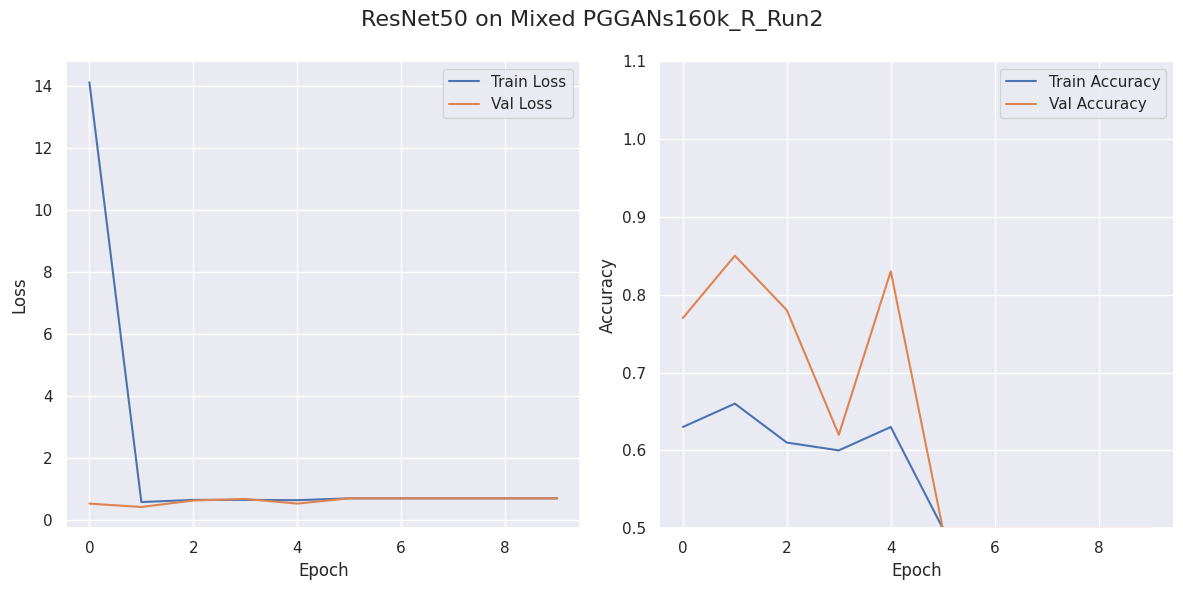

100/100 [==============================] - 14s 133ms/step
{'Test Loss': 0.6931, 'Test Accuracy': 0.5028, 'F1 Score': 0.34, 'Sensitivity (Recall)': 0.5, 'Precision': 0.5}


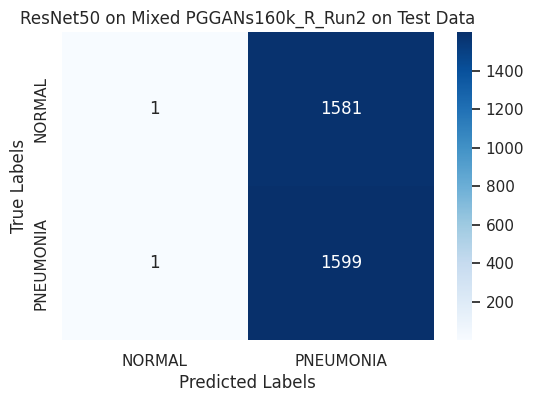

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
110/110 [==============================] - 26s 211ms/step - loss: 13.7190 - accuracy: 0.6040 - val_loss: 0.6350 - val_accuracy: 0.5955
Epoch 2/10
110/110 [==============================] - 22s 202ms/step - loss: 0.5875 - accuracy: 0.6412 - val_loss: 0.5083 - val_accuracy: 0.8159
Epoch 3/10
110/110 [==============================] - 23s 206ms/step - loss: 0.6202 - accuracy: 0.6071 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 4/10
110/110 [==============================] - 23s 210ms/step - loss: 0.6918 - accuracy: 0.5082 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 5/10
110/110 [==============================] - 23s 213ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/10
110/110 [==============================] - 24s 217ms/step - loss: 0.6933 - accuracy: 0.4903 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/10
110/110 [==============================] - 24s 218ms/step - loss: 0.6932 - accu

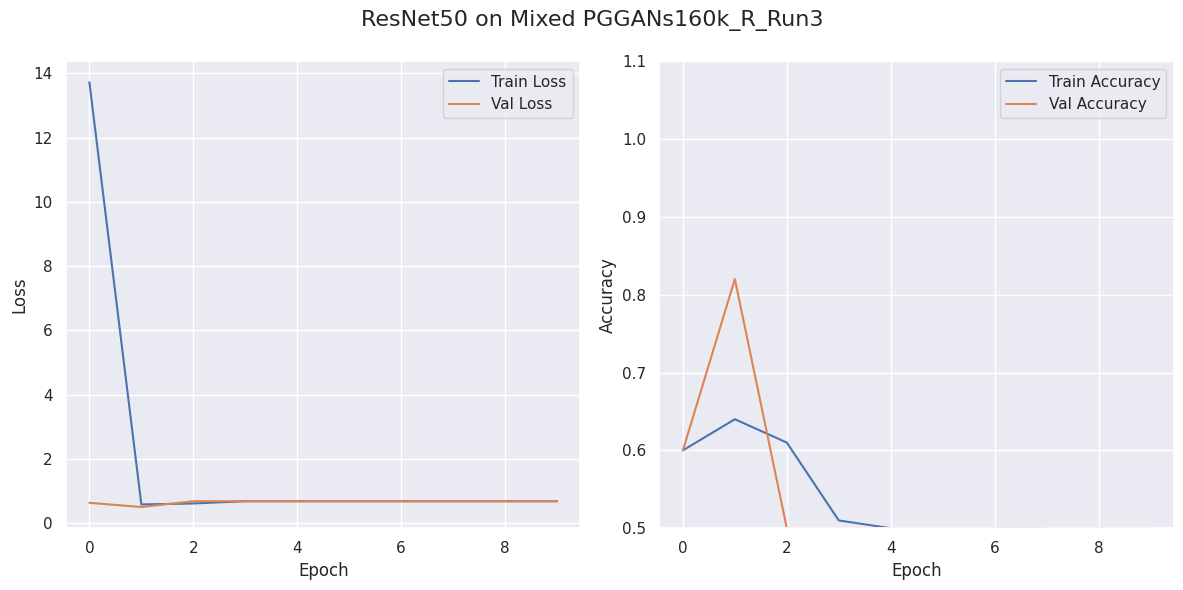

100/100 [==============================] - 14s 131ms/step
{'Test Loss': 0.6932, 'Test Accuracy': 0.4969, 'F1 Score': 0.33, 'Sensitivity (Recall)': 0.5, 'Precision': 0.25}


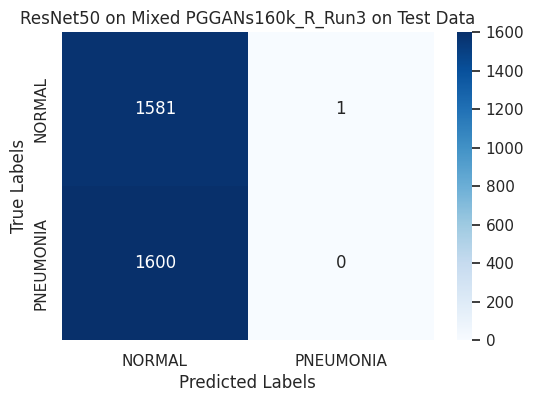

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
110/110 [==============================] - 28s 213ms/step - loss: 13.2791 - accuracy: 0.6784 - val_loss: 0.4226 - val_accuracy: 0.8398
Epoch 2/10
110/110 [==============================] - 22s 202ms/step - loss: 0.5454 - accuracy: 0.7554 - val_loss: 0.4419 - val_accuracy: 0.8511
Epoch 3/10
110/110 [==============================] - 23s 205ms/step - loss: 0.5827 - accuracy: 0.7276 - val_loss: 0.5614 - val_accuracy: 0.8398
Epoch 4/10
110/110 [==============================] - 23s 209ms/step - loss: 0.5880 - accuracy: 0.7051 - val_loss: 0.6488 - val_accuracy: 0.6784
Epoch 5/10
110/110 [==============================] - 23s 212ms/step - loss: 0.5819 - accuracy: 0.6858 - val_loss: 0.5464 - val_accuracy: 0.6761
Epoch 6/10
110/110 [==============================] - 23s 210ms/step - loss: 0.6011 - accuracy: 0.6554 - val_loss: 0.4611 - val_accuracy: 0.8989
Epoch 7/10
110/110 [==============================] - 24s 216ms/step - loss: 0.5668 - accu

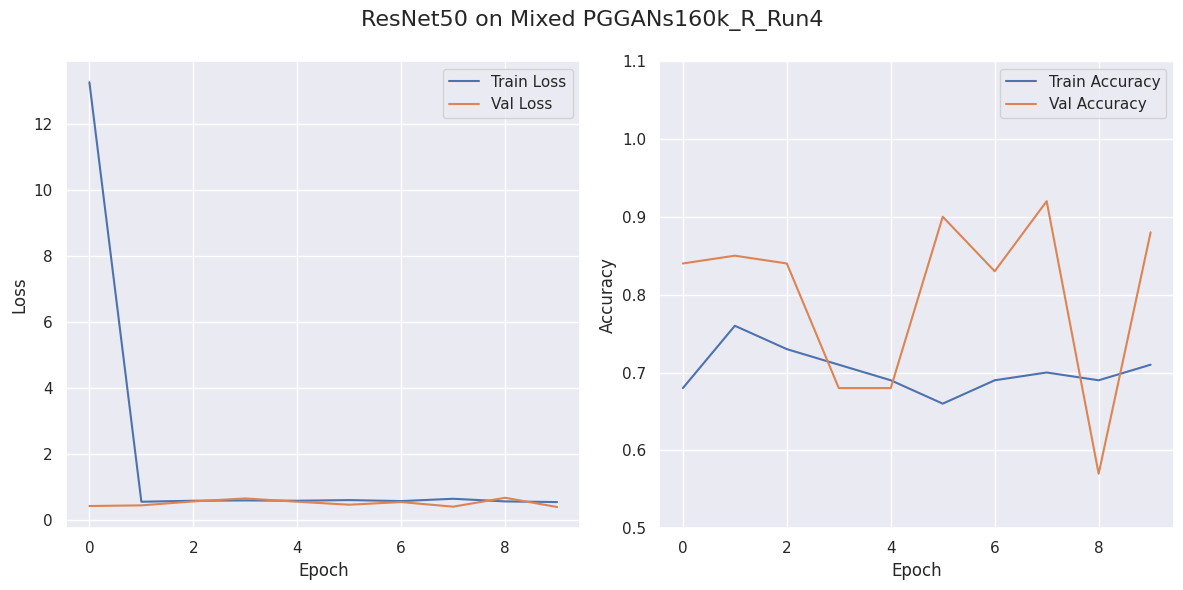

100/100 [==============================] - 14s 135ms/step
{'Test Loss': 0.4448, 'Test Accuracy': 0.829, 'F1 Score': 0.82, 'Sensitivity (Recall)': 0.83, 'Precision': 0.87}


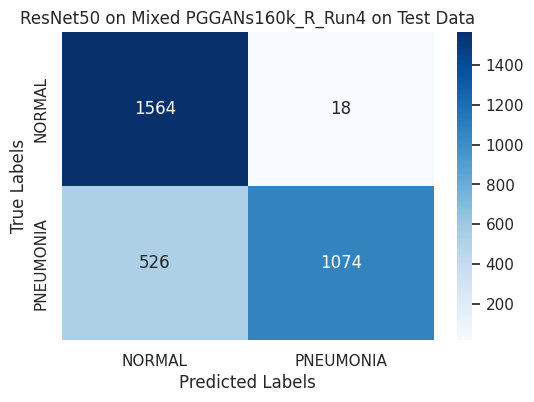

Class labels:  ['NORMAL', 'PNEUMONIA']
Epoch 1/10
110/110 [==============================] - 27s 219ms/step - loss: 11.7480 - accuracy: 0.5969 - val_loss: 0.5782 - val_accuracy: 0.7545
Epoch 2/10
110/110 [==============================] - 23s 211ms/step - loss: 0.6842 - accuracy: 0.6787 - val_loss: 0.5195 - val_accuracy: 0.8398
Epoch 3/10
110/110 [==============================] - 24s 215ms/step - loss: 0.6113 - accuracy: 0.6190 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/10
110/110 [==============================] - 24s 219ms/step - loss: 0.6885 - accuracy: 0.5256 - val_loss: 0.6695 - val_accuracy: 0.6080
Epoch 5/10
110/110 [==============================] - 24s 219ms/step - loss: 0.6869 - accuracy: 0.5142 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 6/10
110/110 [==============================] - 24s 221ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/10
110/110 [==============================] - 24s 222ms/step - loss: 0.6932 - accu

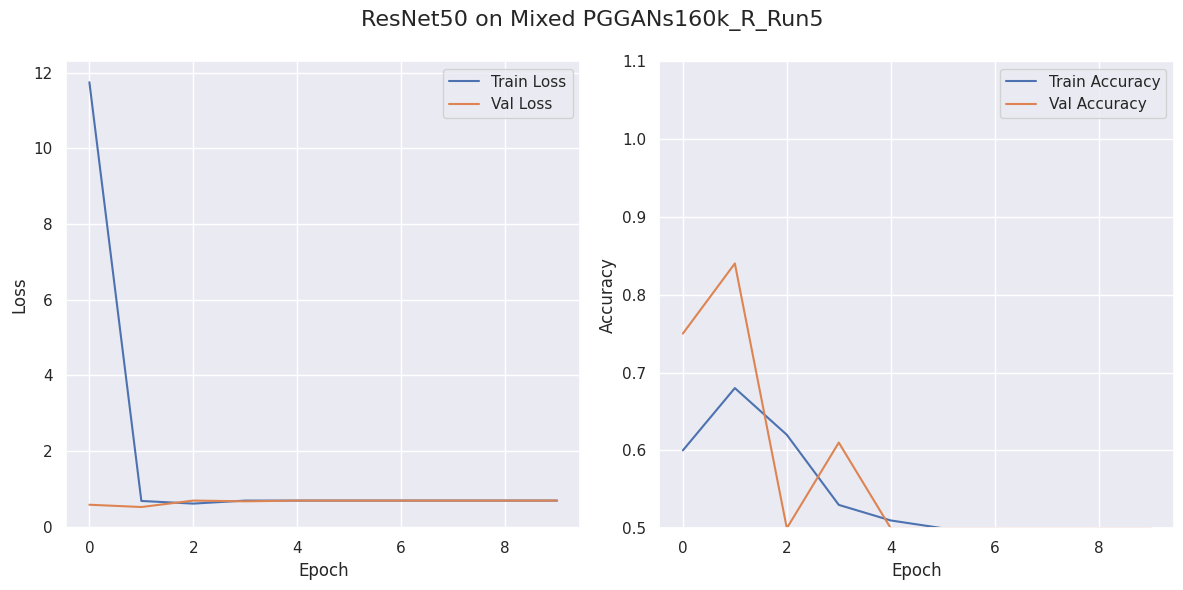

100/100 [==============================] - 15s 137ms/step
{'Test Loss': 0.6931, 'Test Accuracy': 0.5028, 'F1 Score': 0.34, 'Sensitivity (Recall)': 0.5, 'Precision': 0.25}


/users/PCS0229/imankhazrak/miniconda3/envs/ddpm_pytorch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/users/PCS0229/imankhazrak/miniconda3/envs/ddpm_pytorch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/users/PCS0229/imankhazrak/miniconda3/envs/ddpm_pytorch/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

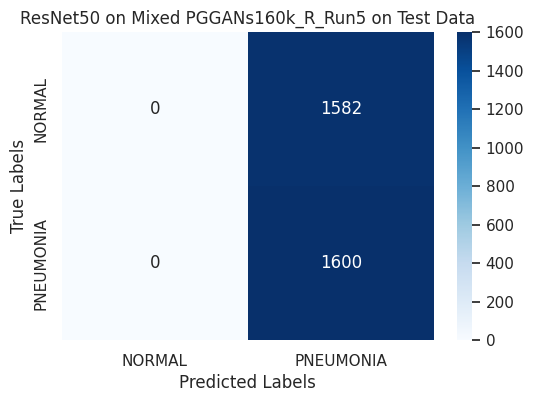

In [8]:
title = "ResNet50 on Mixed PGGANs160k_R" 
file_name = "Trained_Models/ResNet50_training_history_plot_Mixed_PGGANs160k_R.png"

for i in range(0, n):
    trained_model, test_metrics, confusion_matrix = cv_train_and_evaluate_model(
        dataset_dir_pggans160_rand, 
        test_dataset_dir_rand, 
        class_labels,  
        resnet_model,
        weights=None,
        input_shape=input_shape,
        title=f"{title}_Run{i+1}", 
        file_name=file_name,  # Now treated as a keyword argument
        cv=cv, 
        epochs=epochs, 
        batch_size=batch_size
    )
